 <font size="15">SKT012.04.01_scATACseqChiouT2D_NatGen_TSSenrichment10_cisTopic_rGREAT-GOAnnotation </font> 

In [1]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /vsc-hard-mounts/leuven-data/332/vsc33293/miniconda/envs/R_CisTopic/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_0.4.2       digest_0.6.27     utf8_1.2.1        crayon_1.5.2     
 [5] IRdisplay_1.0     repr_1.1.3        lifecycle_1.0.3   jsonlite_1.7.2   
 [9] evaluate_0.14     pillar_1.7.0      rlang_1.0.6       cli_3.4.1        
[13] uuid_0.1-4     

In [2]:
R.home("bin")
.libPaths()

[1] "/data/leuven/332/vsc33293/miniconda/envs/R_CisTopic/lib/R/bin"

[1] "/vsc-hard-mounts/leuven-data/332/vsc33293/miniconda/envs/R_CisTopic/lib/R/library"

# Libraries and Function

In [3]:
library(tidyverse)

library(Matrix)


suppressWarnings(library(cisTopic))

# t-sne & UMAP
library(Rtsne)
library(umap)
library(densityClust)


library(ggplot2)
library(plotly)
library(scatterplot3d)

library(fastcluster)
library(Cairo)
library(grid)
library(ComplexHeatmap)
library(magick)
library(GenomeInfoDb)

set.seed(1234)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
Warning message:
“Your system is mis-configured: ‘/etc/localtime’ is not a symlink”
Warning message:
“It is strongly recommended to set envionment variable TZ to ‘Europe/Amsterdam’ (or equivalent)”
── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.2      ✔ forcats 0.5.1 
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /vsc-hard-mounts/leuven-data/332/vsc33293/miniconda/envs/R_CisTopic/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] stats4    parallel  grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] GenomeInfoDb_1.26.4  IRanges_2.24.1       S4Vectors_0.28.1    
 [4] BiocGenerics_0.36.0  magick_2.7.2         ComplexHeatmap_2.6.2
 [7] Cairo_1.5-12.2       fastcluster_1.1.25   scatterplot3d_0.3-41
[10] plotly_4.9.3         den

## Function Figure Size

In [5]:
# function for adjusting width and height of plots

fig <- function(width, height){
     options(repr.plot.width = width, repr.plot.height = height)
}


# What is cisTopic?
cisTopic identifies simultaneously of cis-regulatory topics and cell states from single cell epigenomics data. <br/>
cisTopic relies on an algorithm called Latent Dirichlet Allocation (LDA),<br/>
a robust Bayesian method used in text mining to group documents addressing similar topics and related words into topics.<br/>
Interestingly, this model has a series of assumptions that are fulfilled in single-cell epigenomics data,<br/>
such as non-ordered features (‘bag of words’) and the allowance of overlapping topics <br/>
(i.e. a regulatory region can be co-accessible with different other regions depending on the context, namely, the cell type or state).

cisTopic now uses the WarpLDA implementation for topic modelling (Chen et al, 2016), where each region in each cell is assigned to a topic based on (1) to which topic the region is assigned in other cells and (2) to which topics the regions are assigned in that cell. In comparison to Collapsed Gibbs Sampling, both counts are fixed after all tokens are sampled, allowing to randomly access regions in cells for assignment; while with a CGS we need to update the counts after each assignment before making the next assignment. After a number of iterations through the data set, these assignments are used to estimate the probability of a region belonging to a cis-regulatory topic (region-topic distribution) and the contributions of a topic within each cell (topic-cell distribution). These distributions can in turn be used to cluster cells and identify cell types, and to analyse the regulatory sequences in each topic.

cisTopic consists of 4 main steps: (1) generation of a binary accessibility matrix as input for LDA; (2) LDA and model selection; (3) cell state identification using the topic-cell distributions from LDA and (4) exploration of the region-topic distributions.

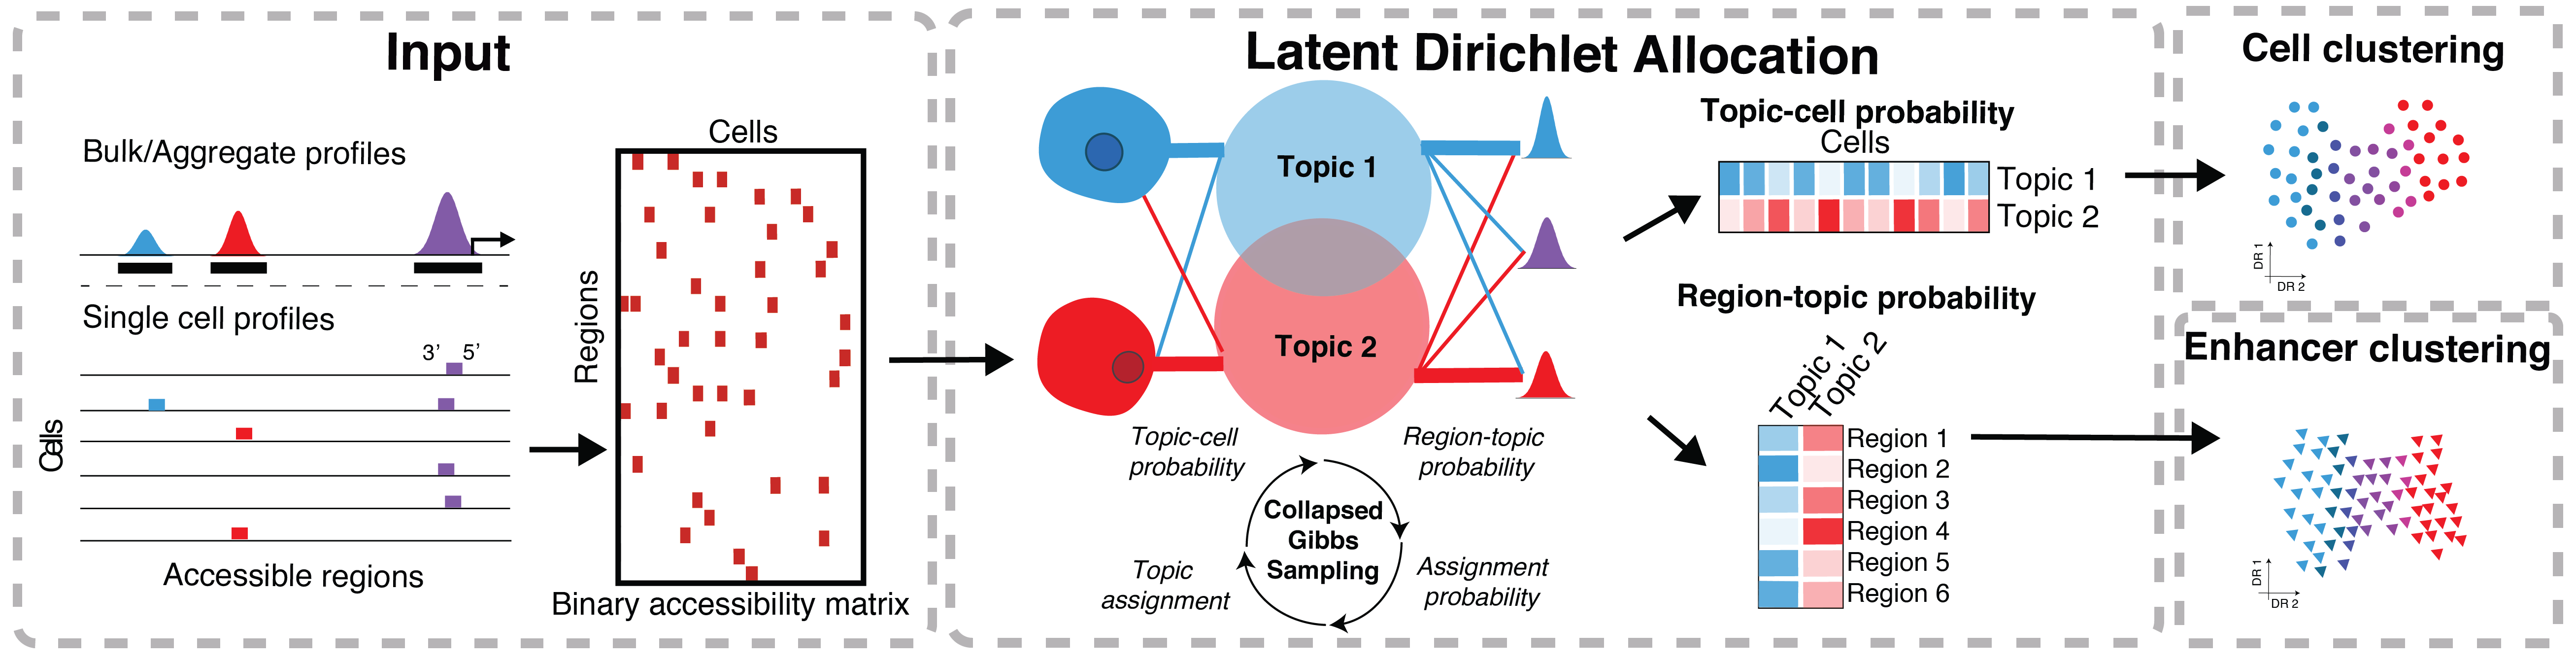


Figure 1. cisTopic workflow. The input for cisTopic is a binary accessibility matrix. This matrix can be formed from single-cell BAM files and a set of genome-wide regulatory regions (e.g., from peak calling on the bulk or aggregate data). Next, Latent Dirichlet Allocation (LDA) is applied on the binary accessibility matrix to obtain the topic-cell distributions (contributions of each topic per cell) and the region-topic distributions (contributions of each region to a topic). Note that a region can contribute to more than one topic (represented by the purple peaks). Finally, the topic-cell distributions are used for dimensionality reduction (e.g. PCA, tSNE, diffusion maps) and clustering to identify cell states, while the region-topic distributions can be used to predict the regulatory code underlying the topic.

<br/> 

---
<br>
<b><font color='darkorange'; size='6'>
Running cisTopic
    </font> </b>
    
# Input Data

In [7]:
# Directories
ProjectDir <- '/lustre1/project/stg_00041/SanKit/SKT012_Chiou_snATAC_Pancreas/'

ChiouNatGen_T2D <- paste0(ProjectDir, "Chiou.et.al.2021_NatureGenetics_T2D/")
ChiouNatGen_T2D_DATA_Dir <- paste0(ChiouNatGen_T2D, "OUTPUTDIR/")



RDS_Dir <- paste0(ProjectDir, "RDS/")
FIG_Dir <- paste0(ProjectDir, "Figure/")
DATA_Dir <- paste0(ProjectDir, "Data/cisTopic/")





In [8]:
library("stringi")

# Annotation to GO terms


Another way of gaining insight on the topics is to link the regions to genes, and to determine GO terms (or pathways or any other type of gene-set) that are enriched within them. cisTopic provides the function annotateRegions() to annotate regions to GO terms using the “TxDb” Bioconductor packages (replace ‘TxDb.Hsapiens.UCSC.hg19.knownGene’ by the appropiate organism package), and annotation databases (“OrgDb” packages).

## Load RDS

In [119]:
setwd(RDS_Dir)
getwd()
list.files()

#Load Data
cisTopicObject <- readRDS('/lustre1/project/stg_00041/SanKit/SKT012_Chiou_snATAC_Pancreas/RDS/SKT012.01.03_CisTopic_Hg38PancreasCombined_97Topics_Embeddings.rds')

[1] "/lustre1/project/stg_00041/SanKit/SKT012_Chiou_snATAC_Pancreas/RDS"

[1] "mm10Tomm9.over.chain"                                                           
 [2] "SKT012.01.01_CisTopic_Hg38PancreasCombined.rds"                                 
 [3] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA_20052022.rds"                
 [4] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA.rds"                         
 [5] "SKT012.01.03_CisTopic_Hg38PancreasCombined_97Topics_Embeddings.rds"             
 [6] "SKT012.01.03_CisTopic_Hg38PancreasCombined_Embeddings.rds"                      
 [7] "SKT012.01.04_CisTopic_Hg38PancreasCombined_97Topics_GOAnnotation.rds"           
 [8] "SKT012.01.05_CisTopic_Hg38PancreasCombined_97Topics_cisTargetCoordinatesCtx.rds"
 [9] "SKT012.01.06_CisTopic_Hg38PancreasCombined_97Topics_MotifEnrichment.rds"        
[10] "SKT012.01.07_CisTopic_Hg38PancreasCombined_97Topics_ArchR.rds"

In [ ]:
library(org.Hs.eg.db)
library(TxDb.Hsapiens.UCSC.hg38.knownGene)

In [20]:
cisTopicObject <- getRegionsScores(cisTopicObject, method='NormTop', scale=TRUE)

In [21]:
cisTopicObject <- annotateRegions(cisTopicObject,
                                  txdb=TxDb.Hsapiens.UCSC.hg38.knownGene,
                                  annoDb='org.Hs.eg.db')

>> preparing features information...		 2022-10-13 02:29:12 PM 
>> identifying nearest features...		 2022-10-13 02:29:12 PM 
>> calculating distance from peak to TSS...	 2022-10-13 02:29:16 PM 
>> assigning genomic annotation...		 2022-10-13 02:29:16 PM 
>> adding gene annotation...			 2022-10-13 02:29:20 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-10-13 02:29:21 PM 
>> done...					 2022-10-13 02:29:21 PM 


As we saw before, we can use the region type annotations as region sets/signatures to check whether a topic is more enriched in a certain type of region. <br/>
We see that regions that belong to topics that are not enriched for any of the cell type specific signatures are promoter topics. <br/>
Additionally, the set of regions that are accessible in a higher number of cells are also promoters.

## Plot Heatmap

In [59]:
fig(15,15)

par(mfrow=c(1,1))
ssignaturesHeatmap(cisTopicObject,
                  selected.signatures = 'annotation',
                  nCores = 10,
                  col.low = "#440154",
                  col.mid = "#21918c",
                  col.high = "#fde725",
                  scale = TRUE,
                  transposeHeatmap = FALSE,
                  column_split = 15,  
                  column_dend_height = unit(4, "cm"), 
                  row_dend_width = unit(4, "cm")

)

## Embedding

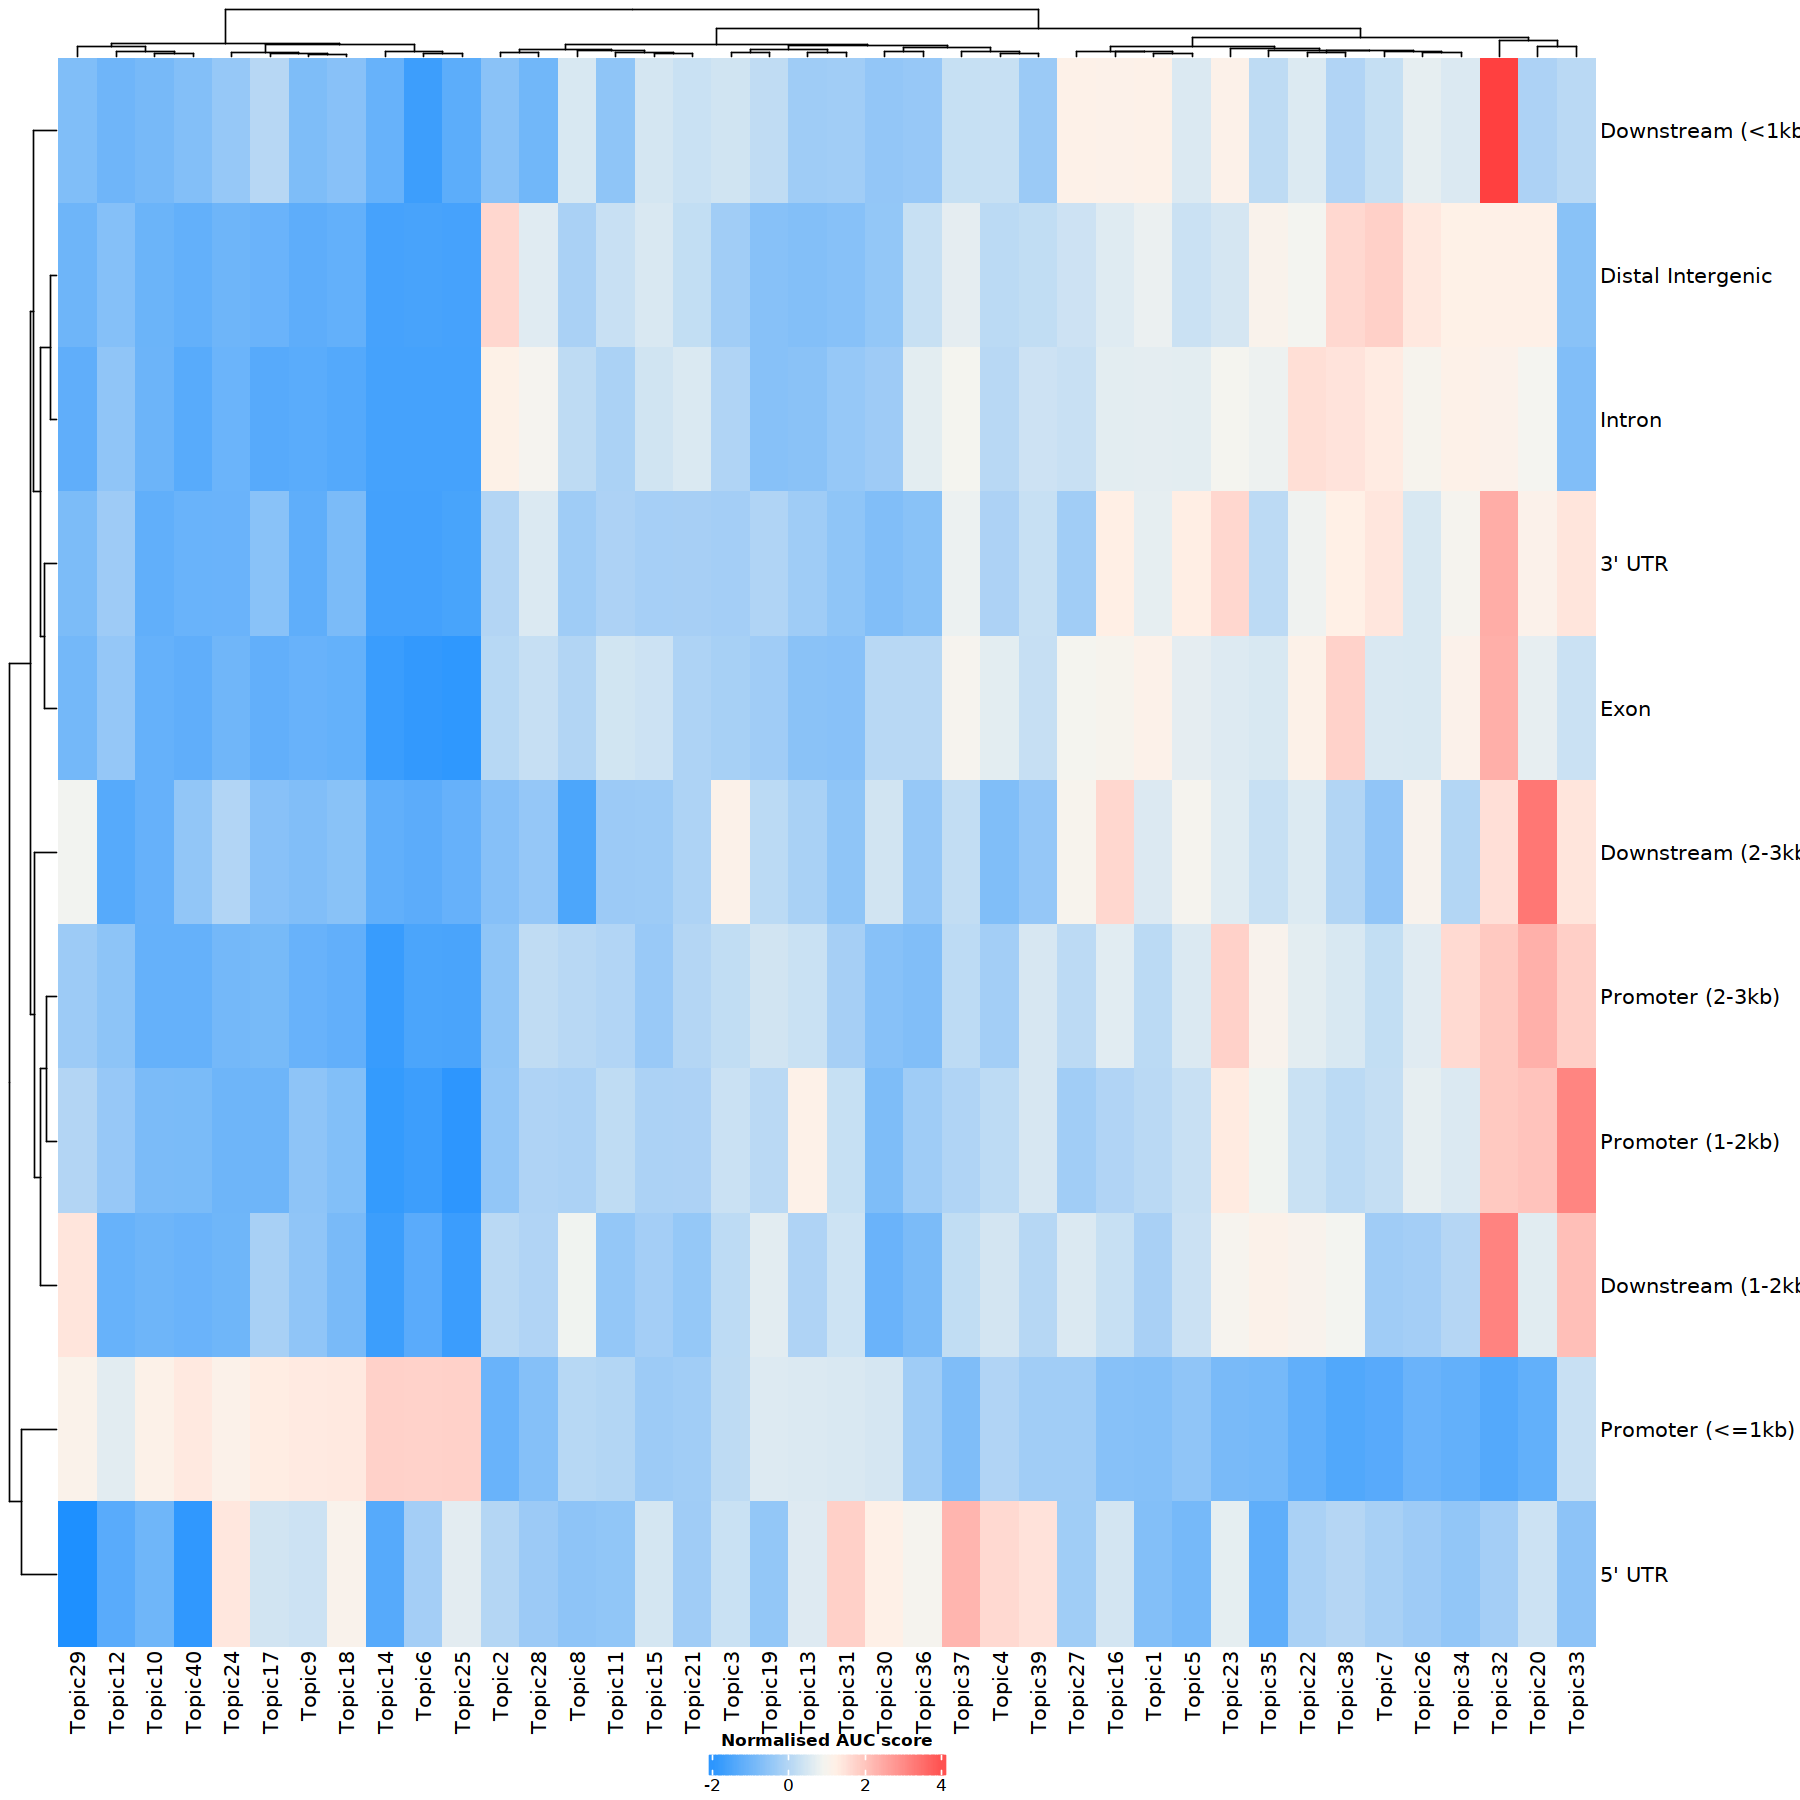

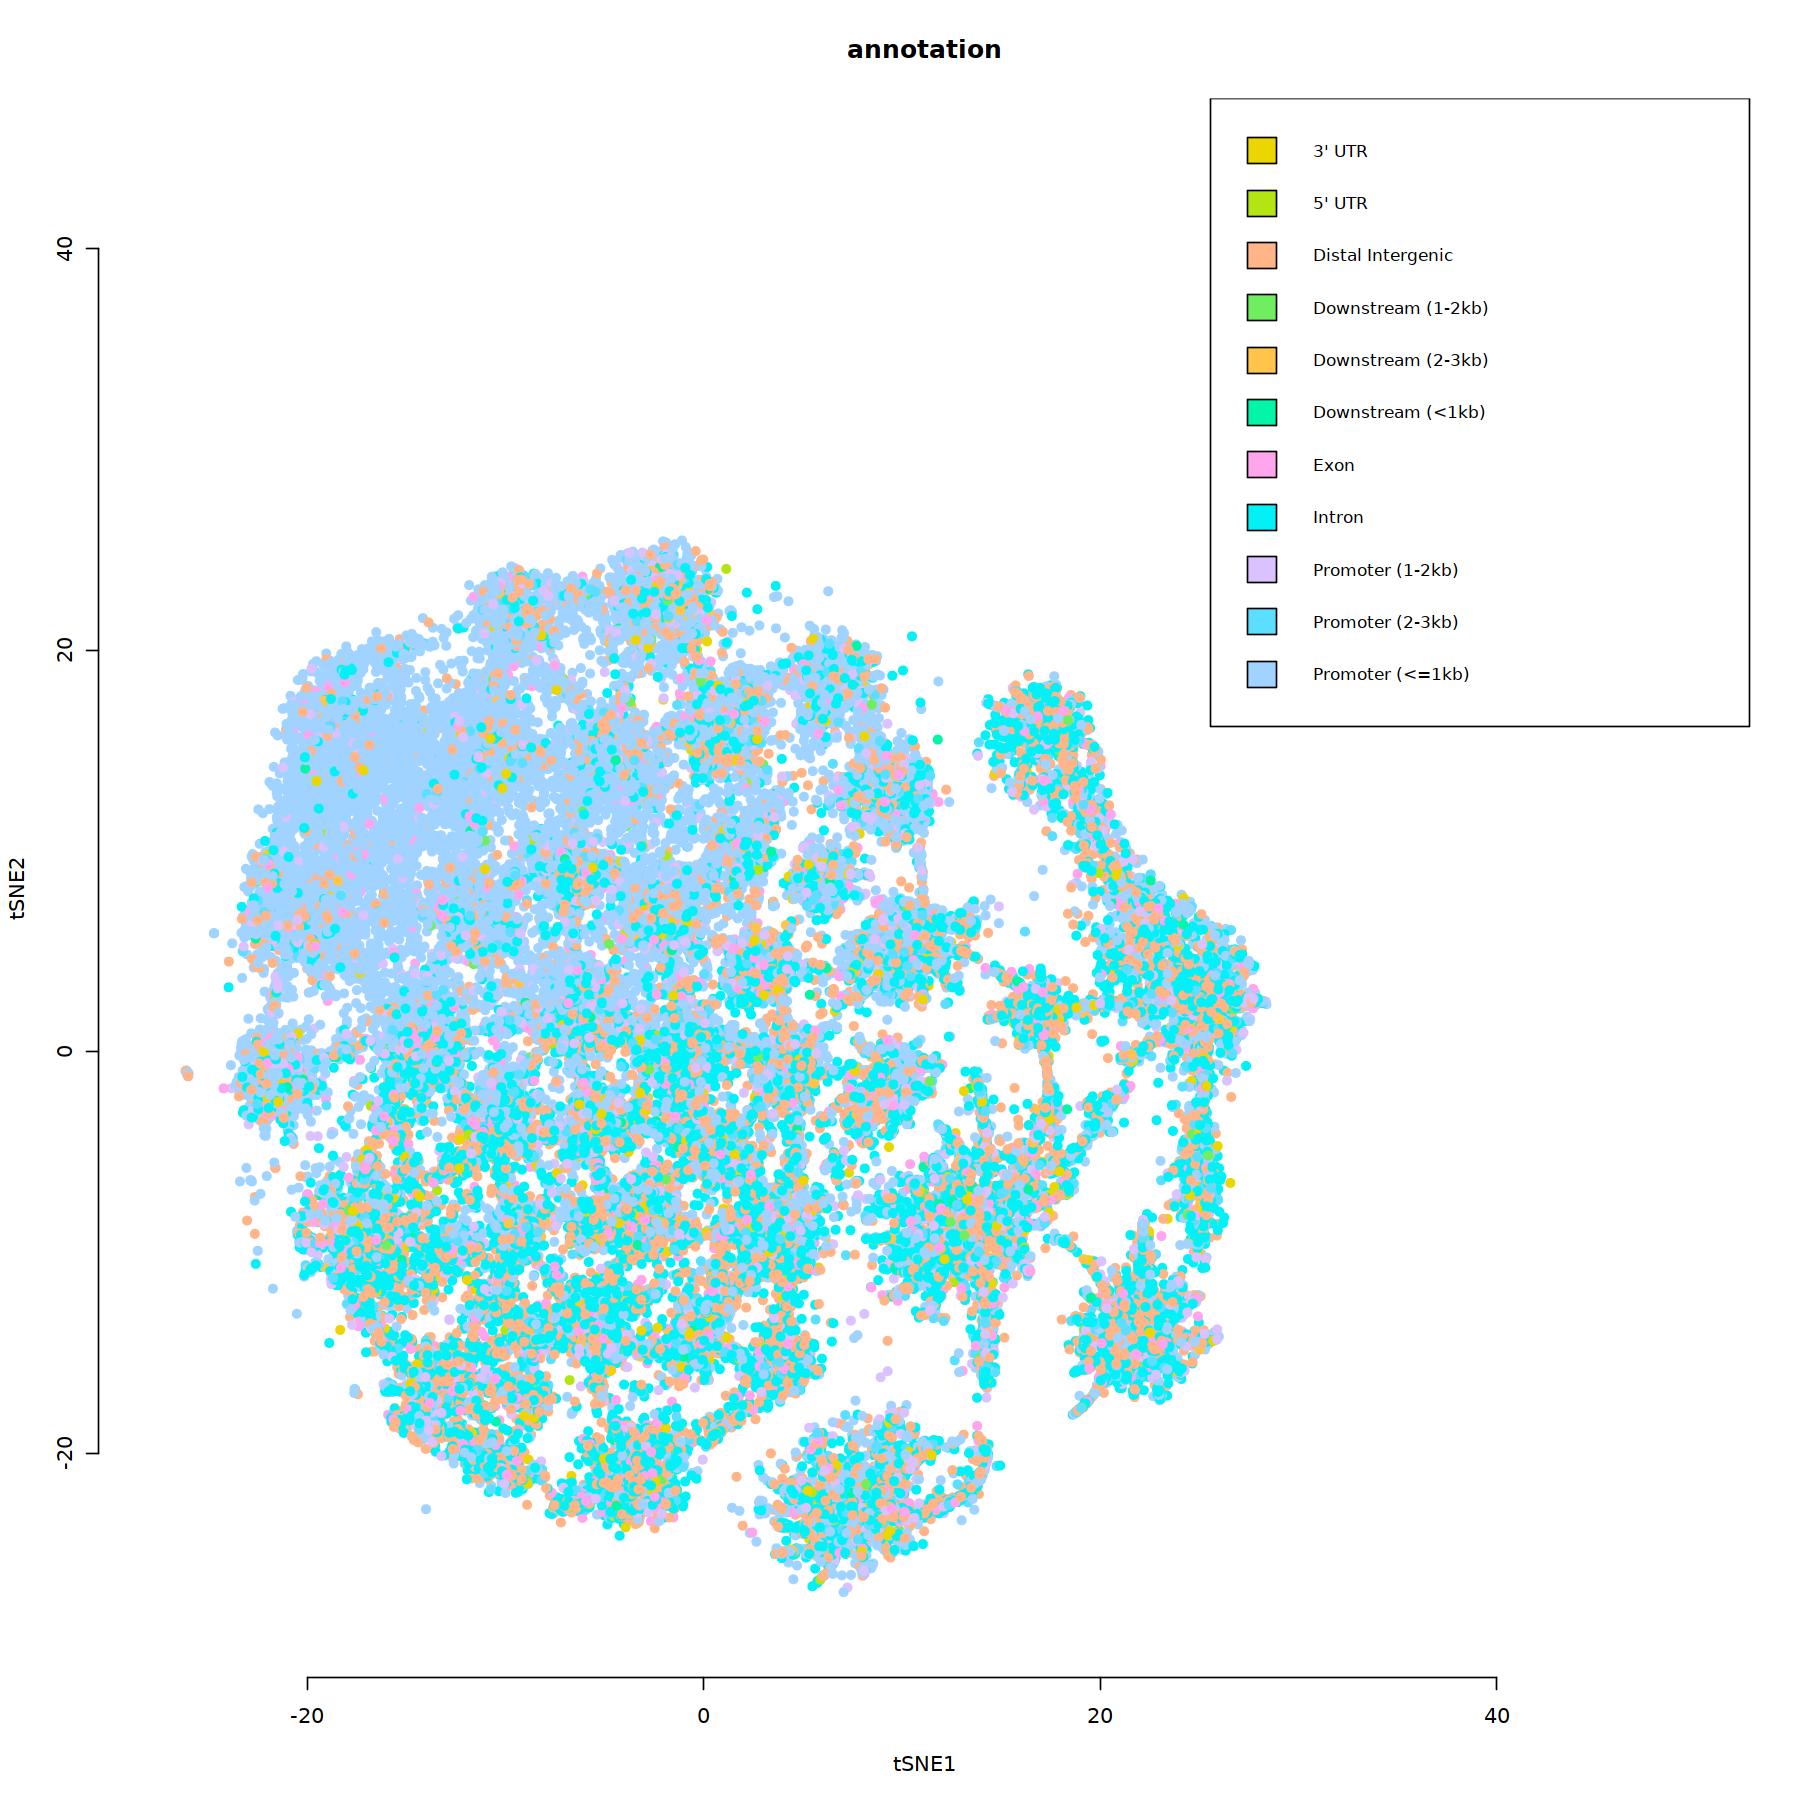

In [59]:
plotFeatures(cisTopicObject,
             method='tSNE',
             target='region',
             topic_contr=NULL,
             colorBy=c('annotation'),
             cex.legend = 0.8,
             factor.max=.75,
             dim=2,
             legend=TRUE,
             intervals=20)

## GO annotations (GREAT)

For identifying enriched GO terms per topic, cisTopic provides a wrapper over rGREAT (Gu Z, 2017) [Reference running time: 20 minutes]. The binarised topics (i.e. sets of top regions per topic) are used in this step. Results are stored in object@binarized.rGREAT.

Loading required package: fitdistrplus

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:AnnotationDbi’:

    select


The following object is masked from ‘package:plotly’:

    select


The following object is masked from ‘package:dplyr’:

    select


Loading required package: survival



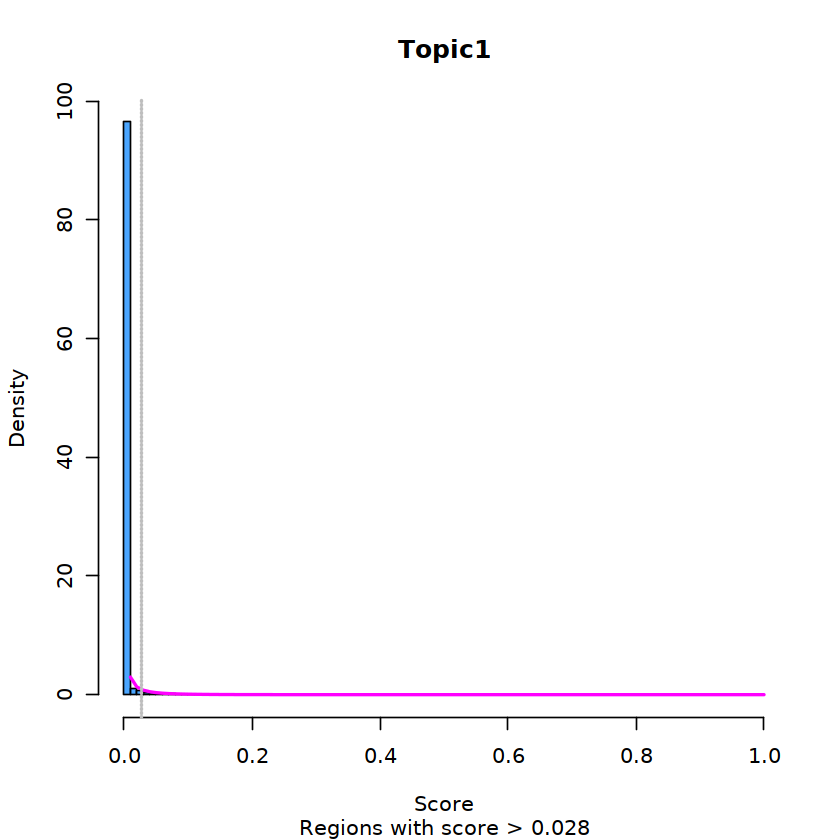

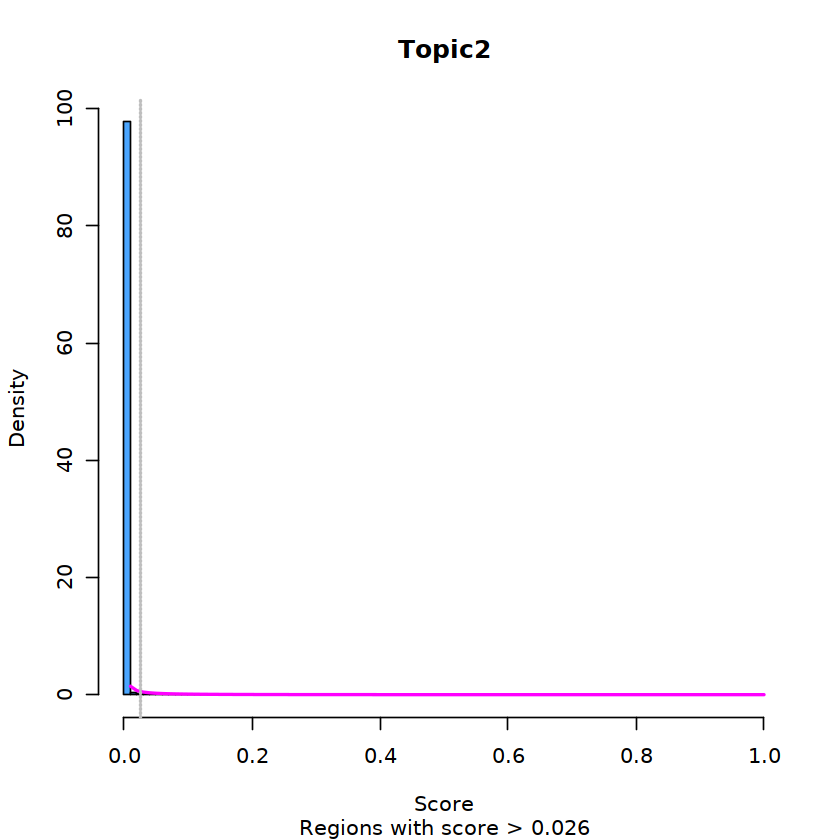

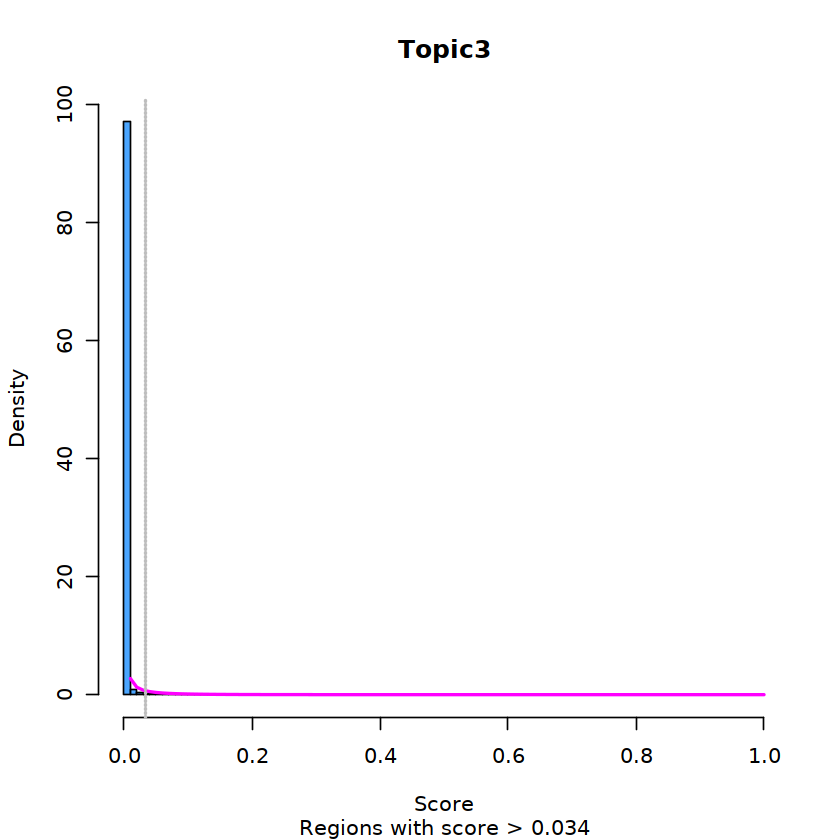

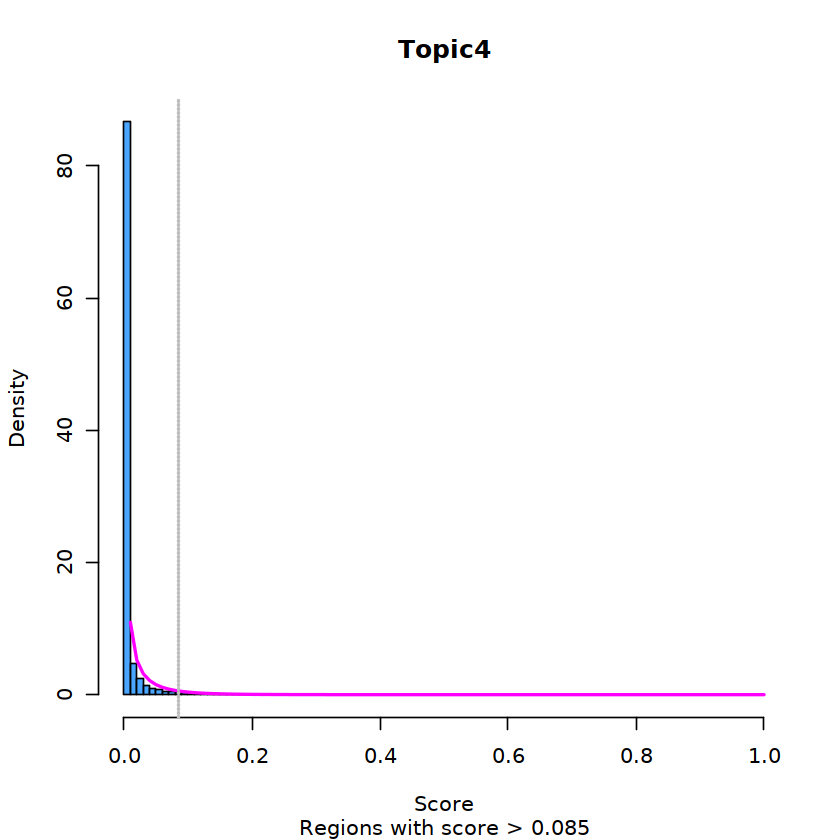

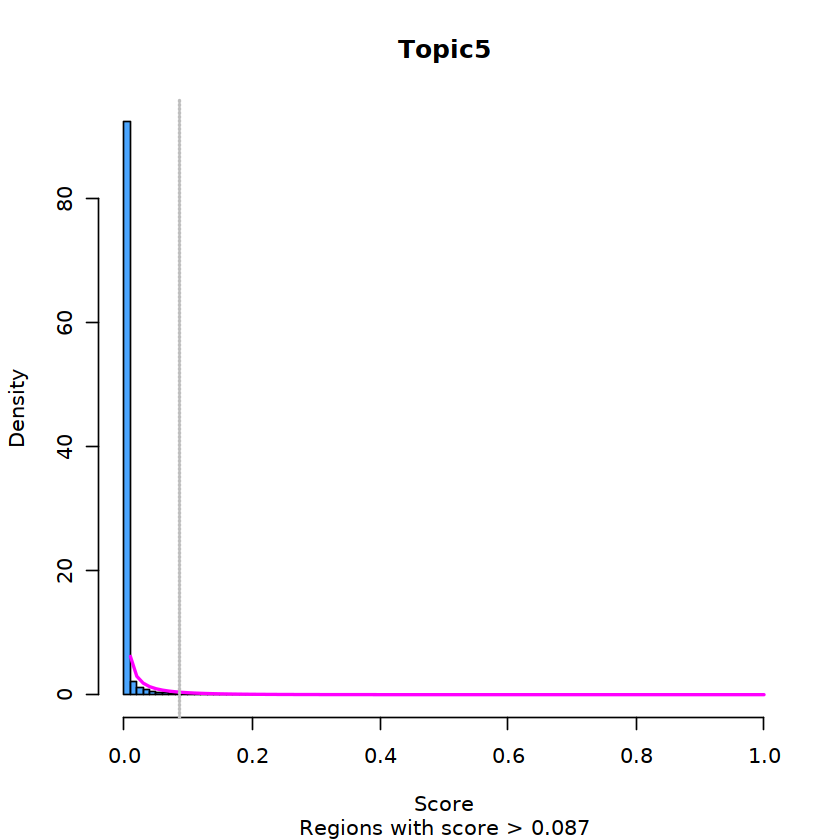

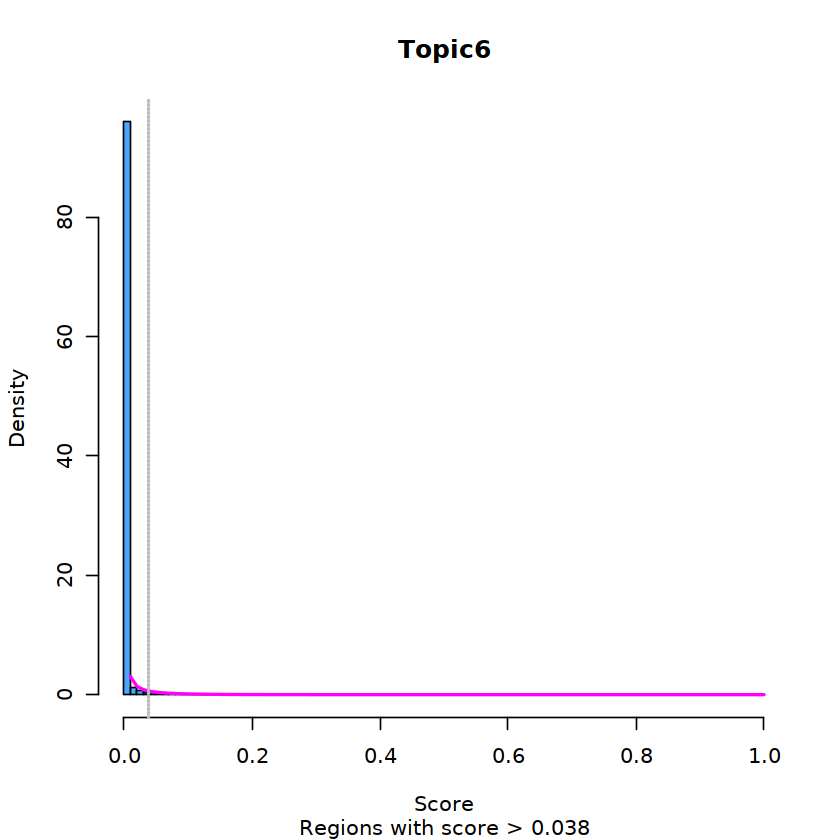

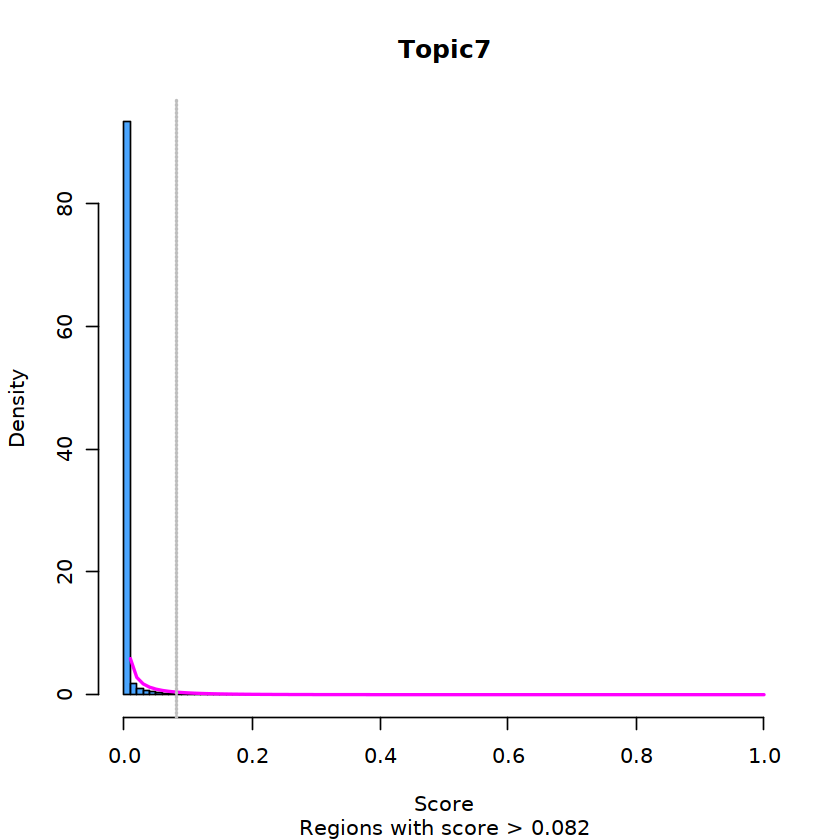

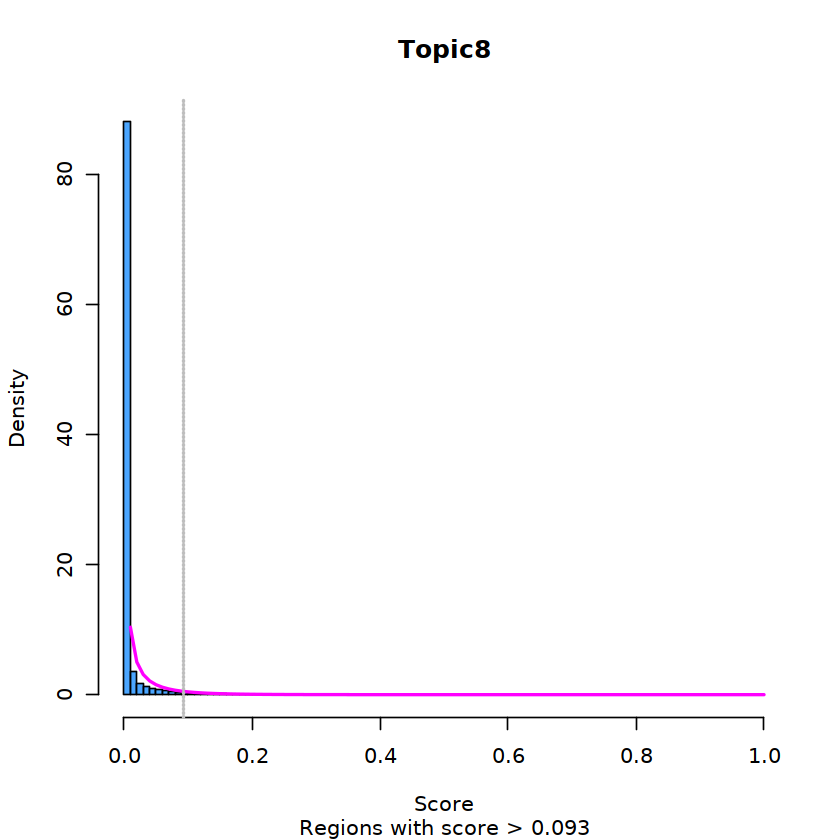

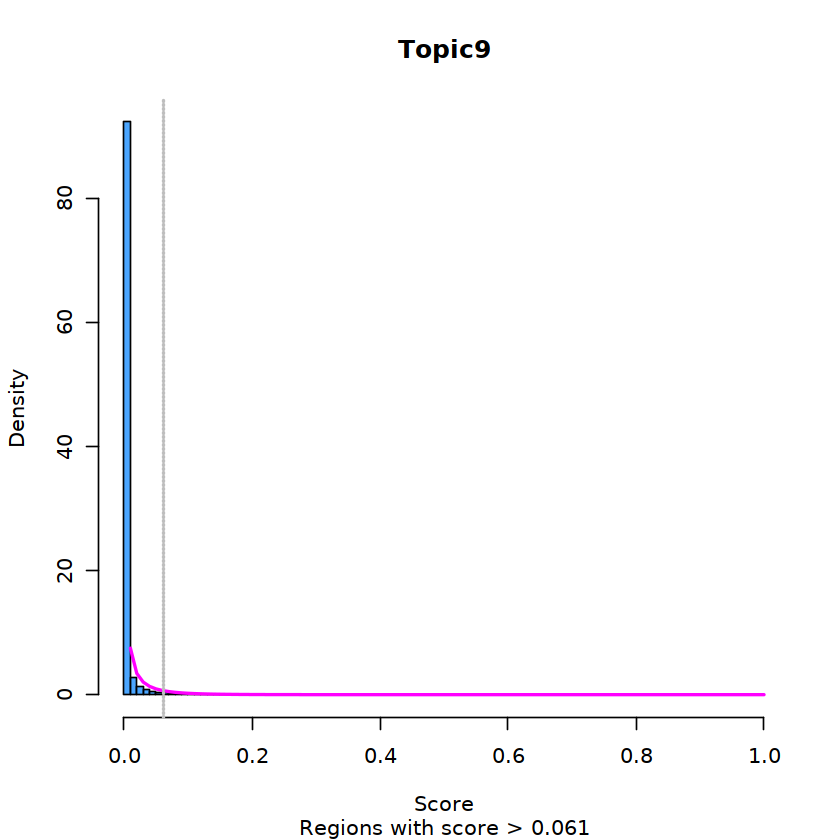

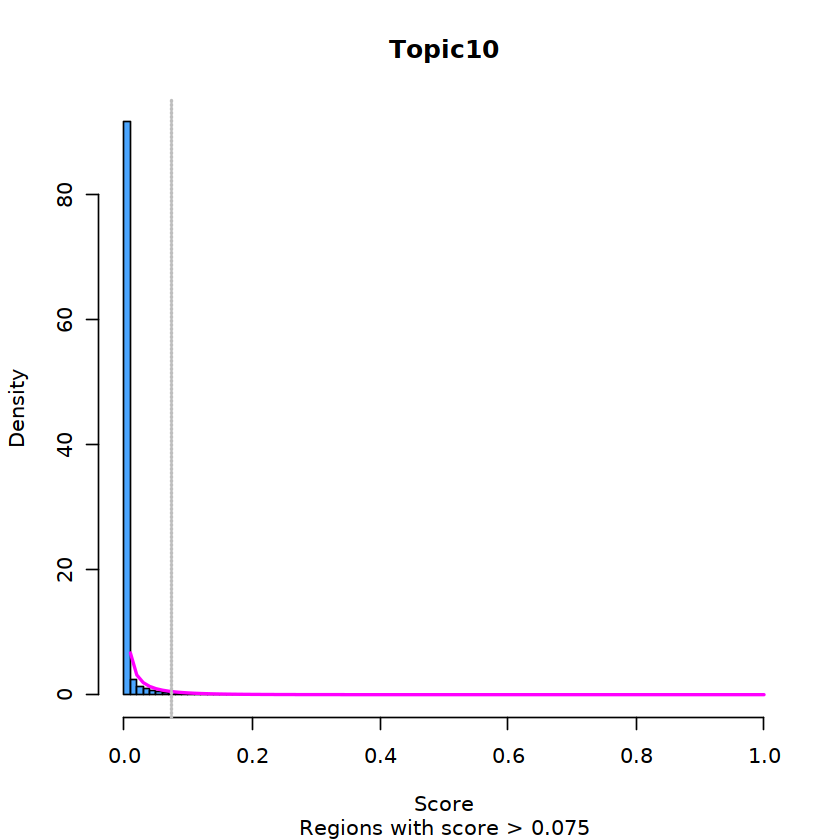

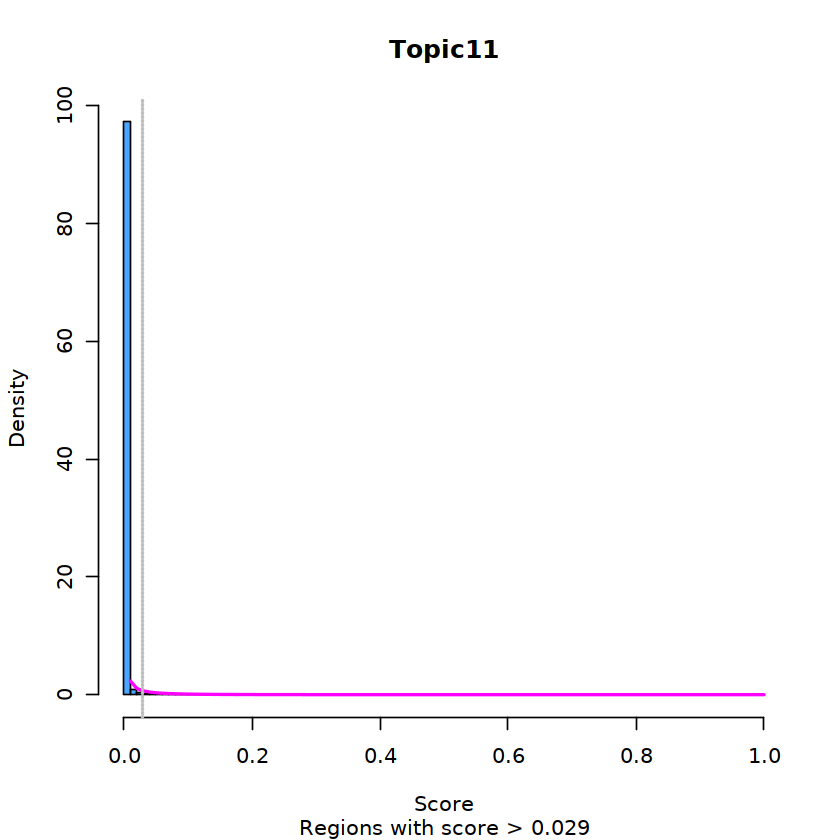

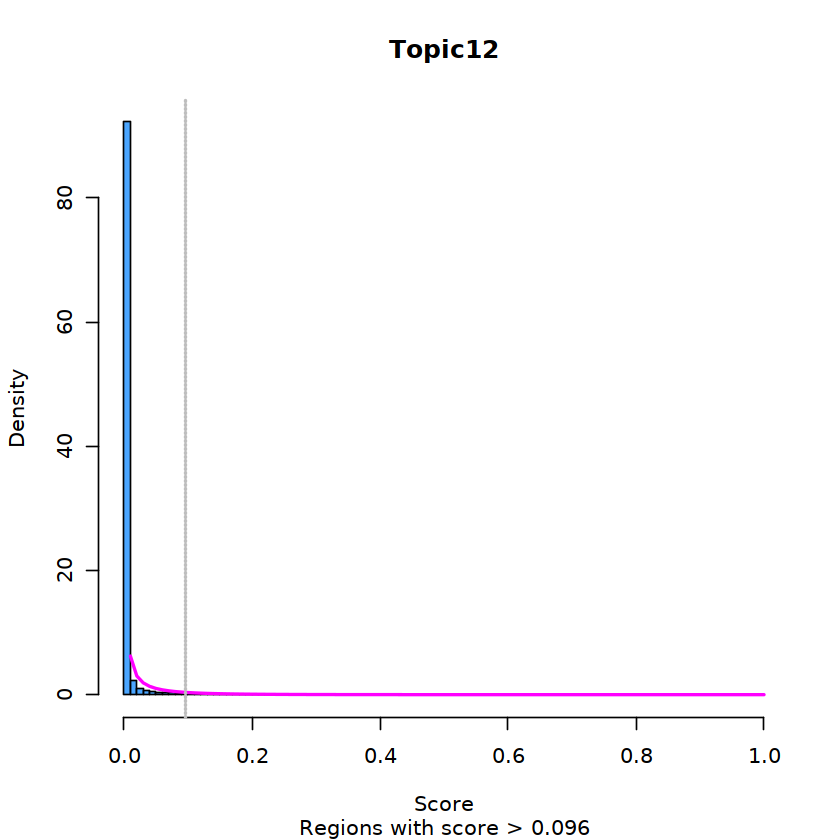

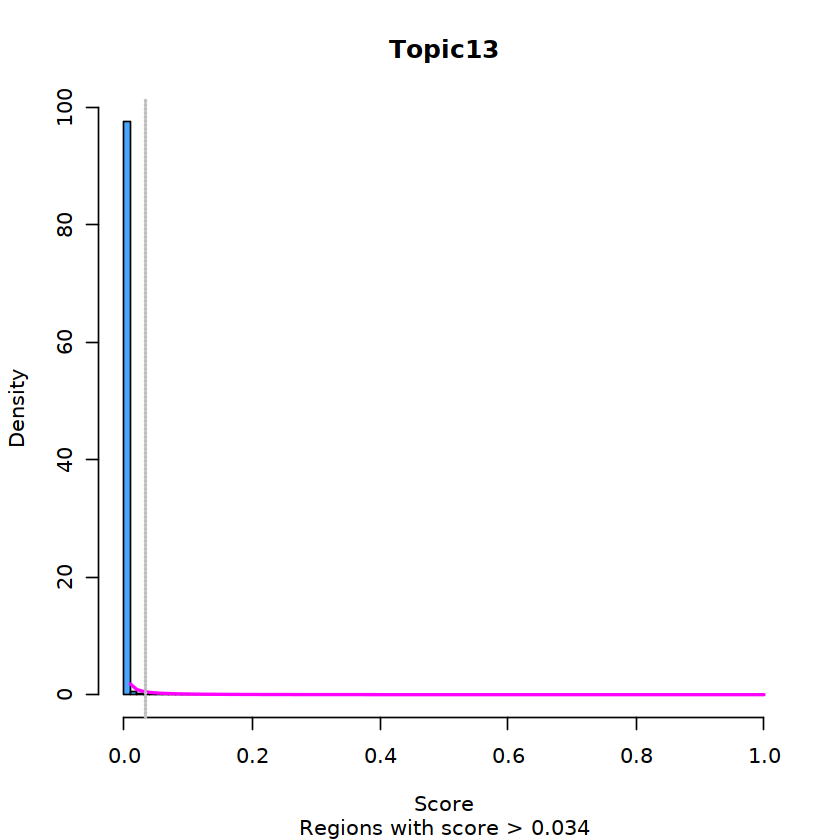

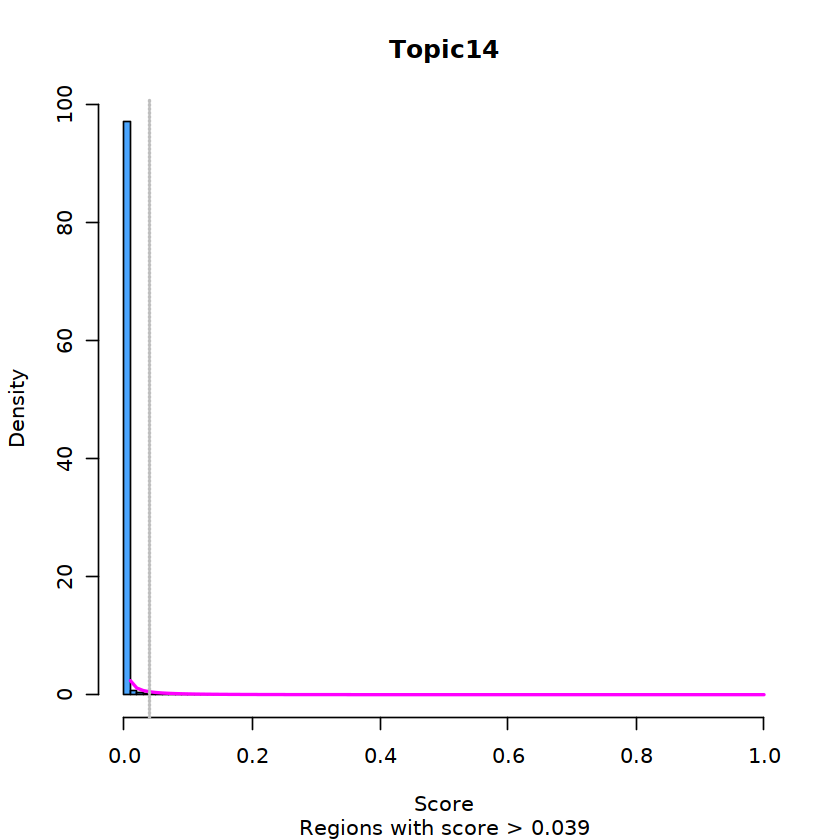

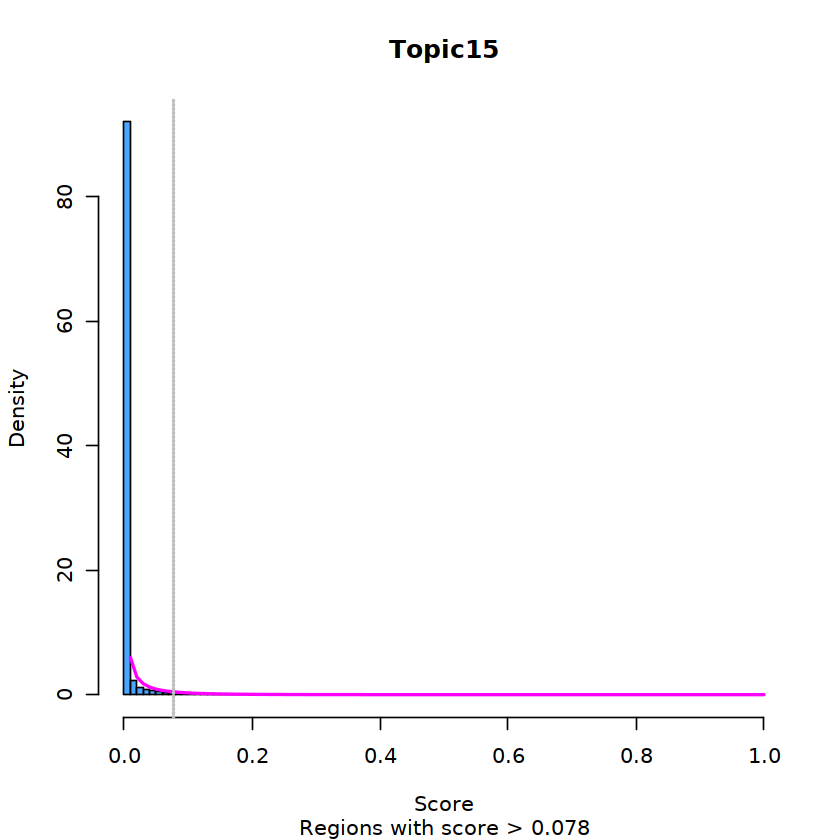

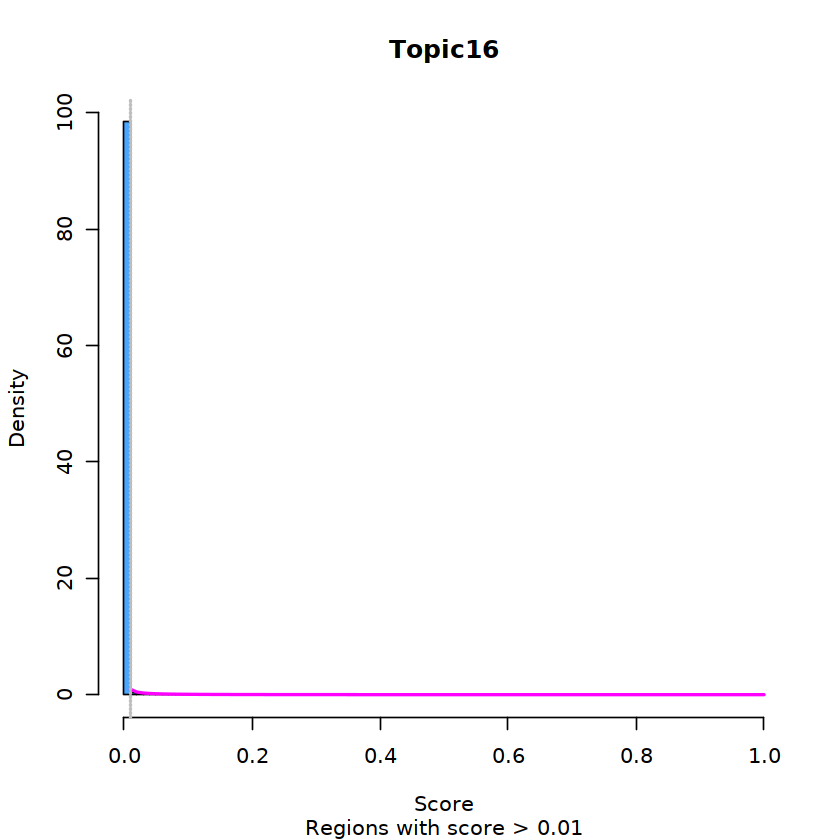

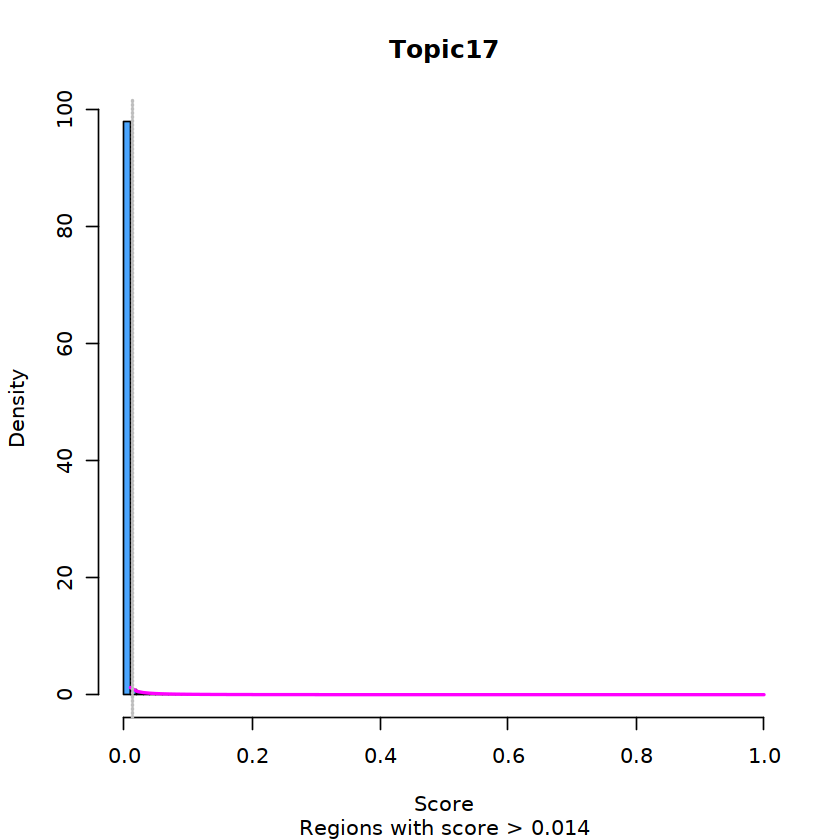

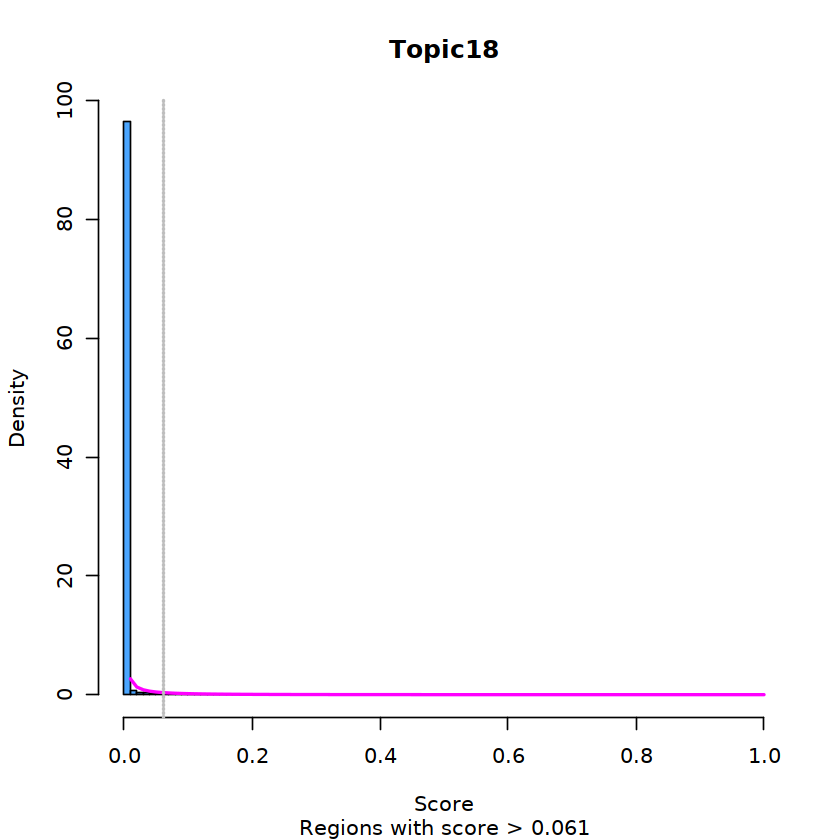

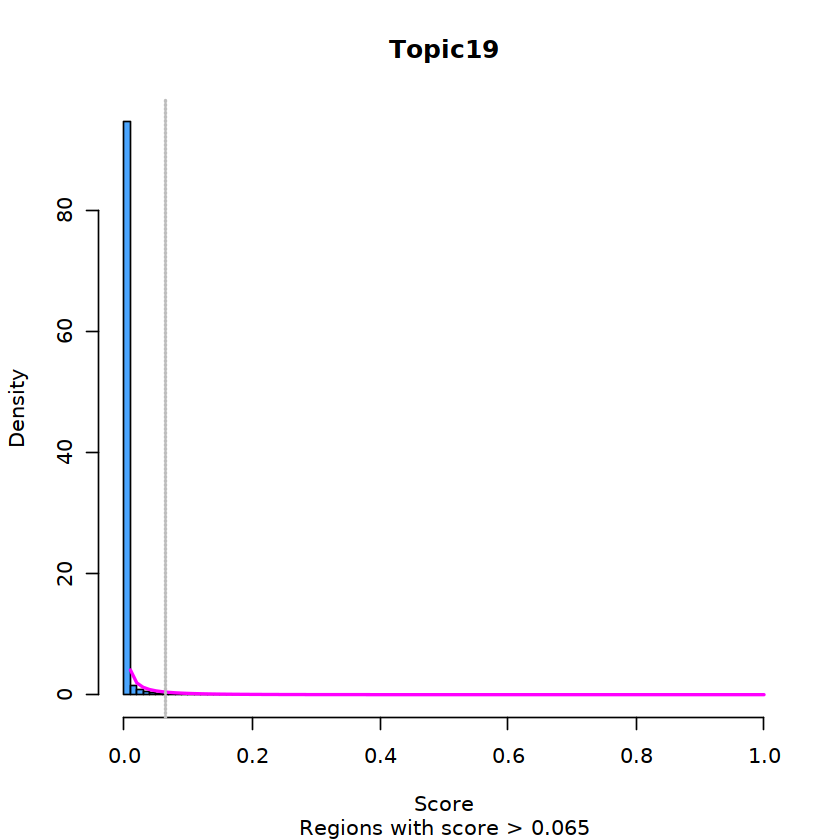

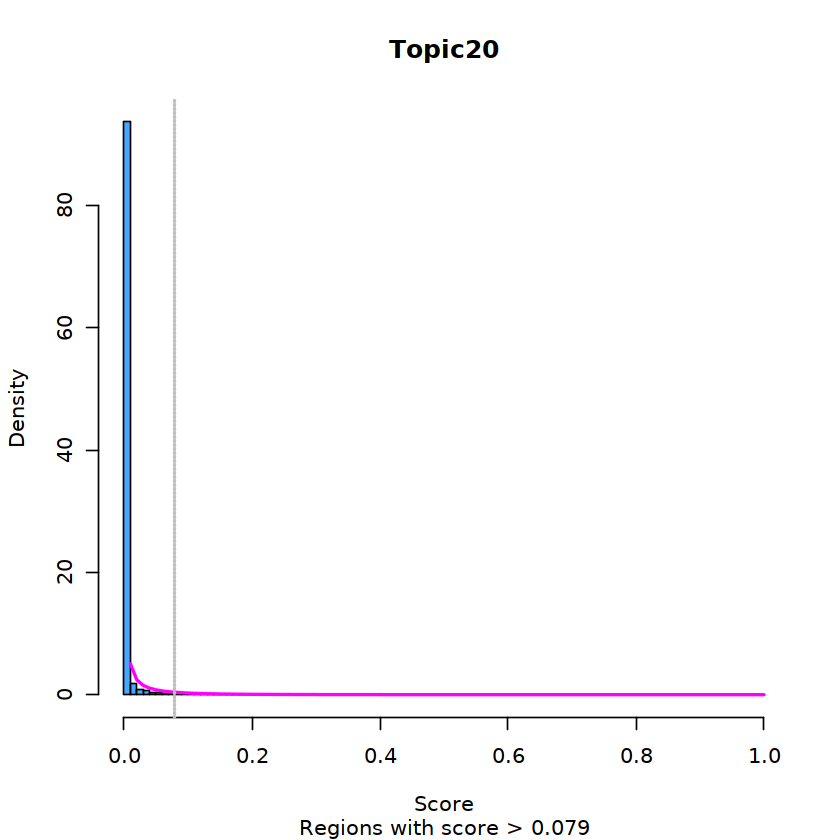

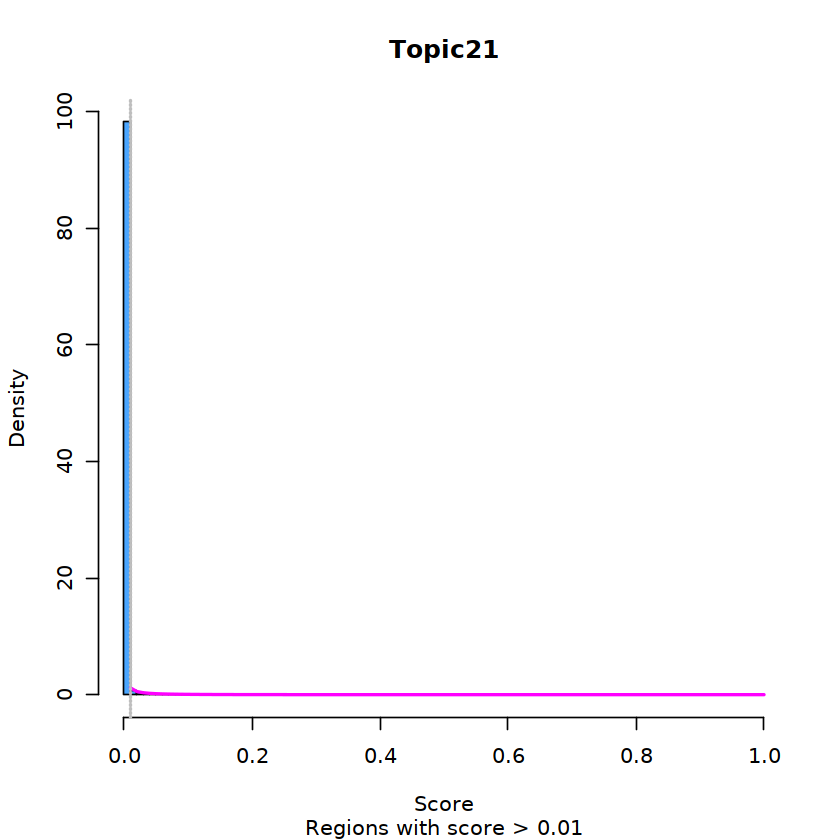

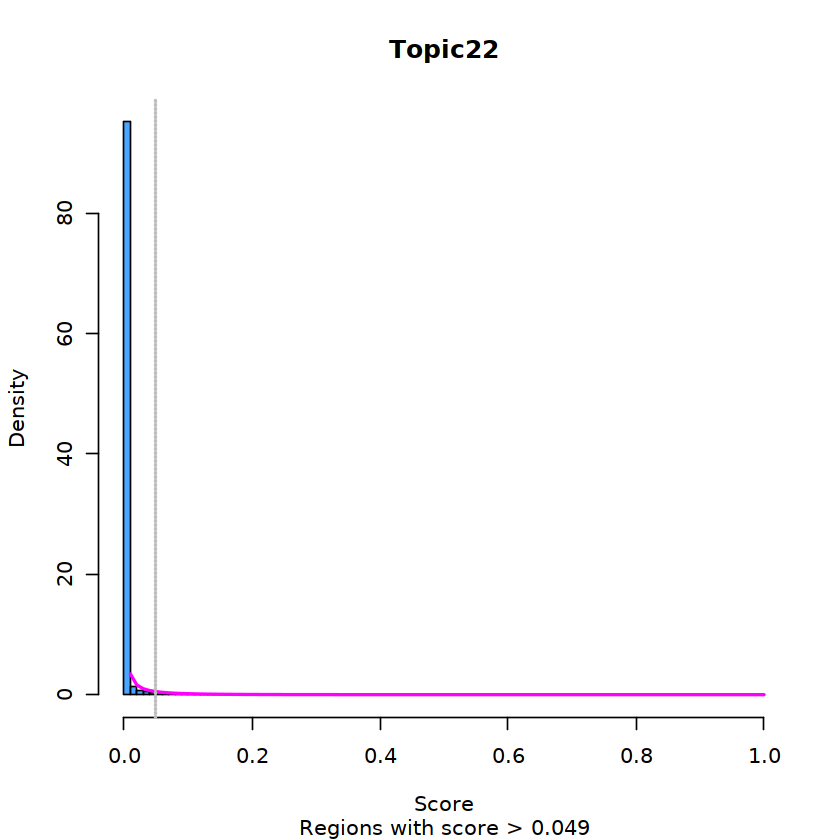

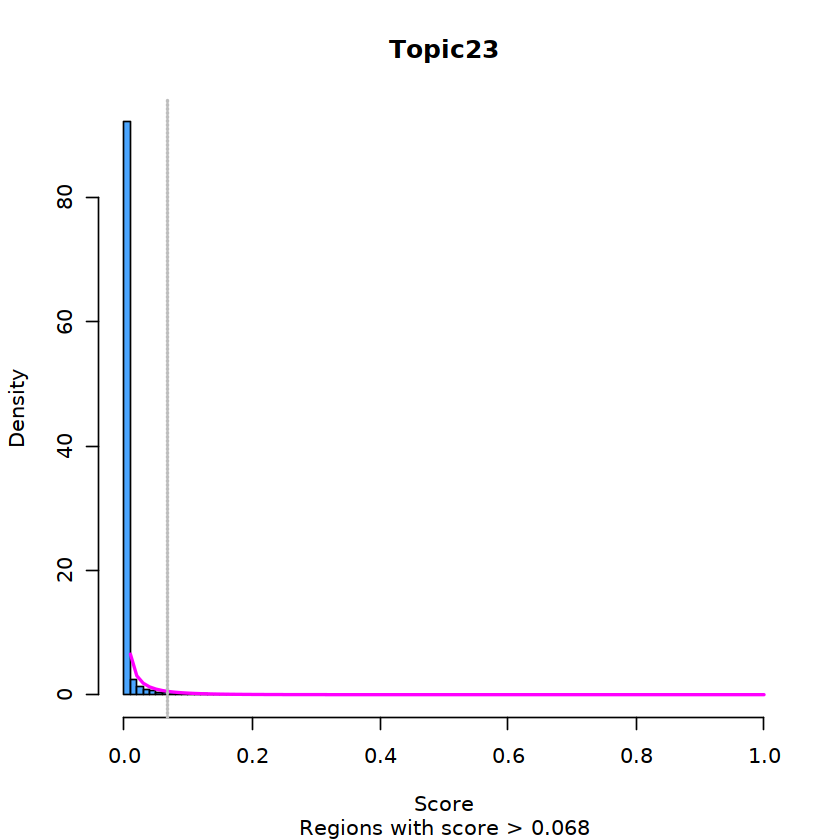

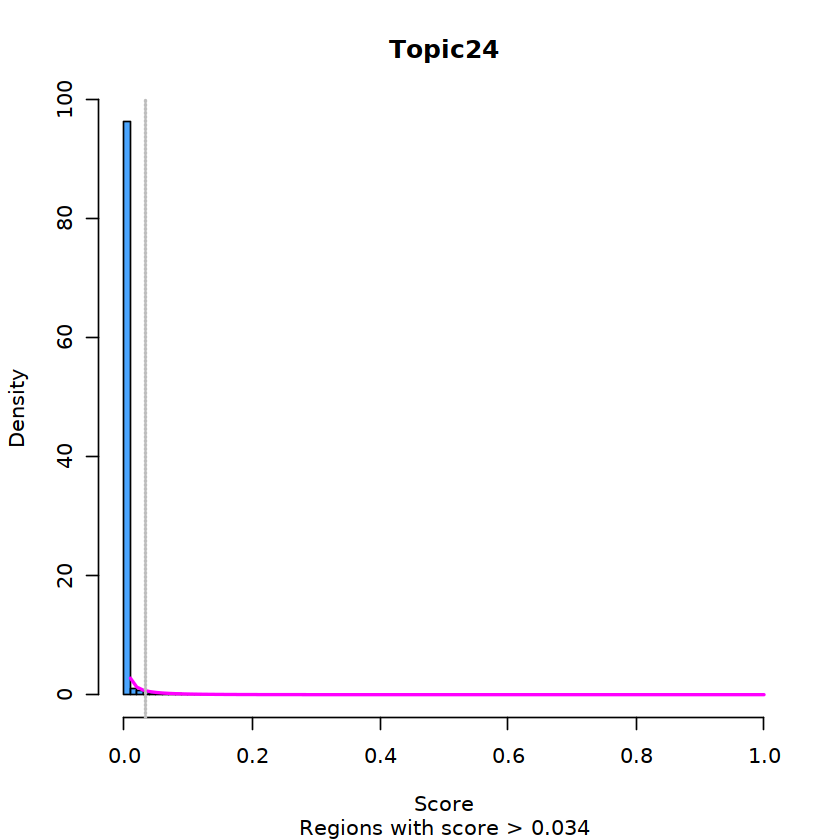

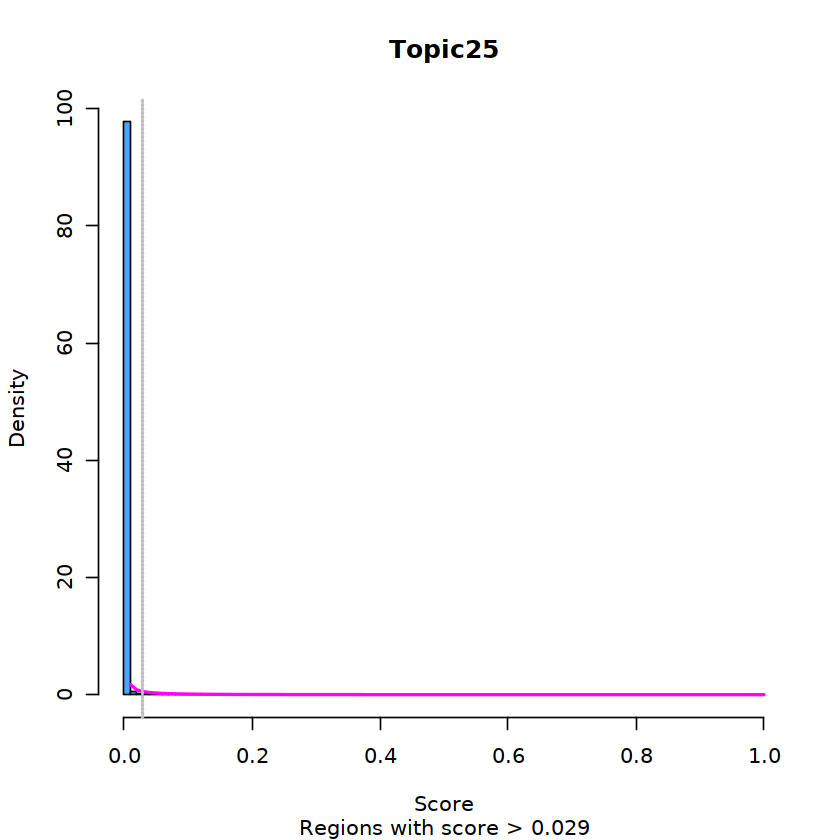

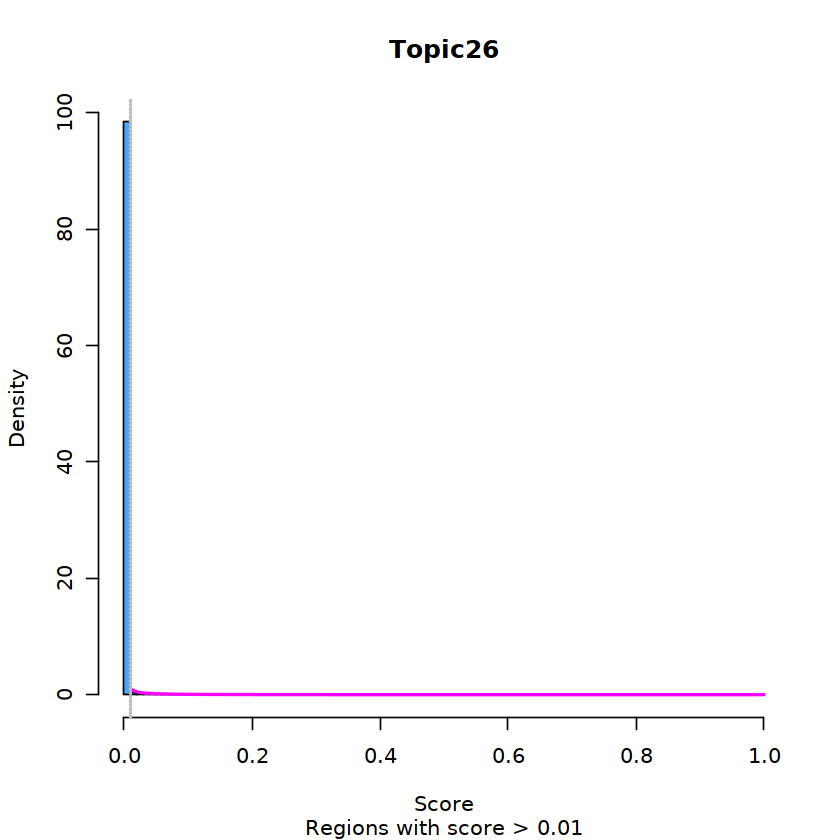

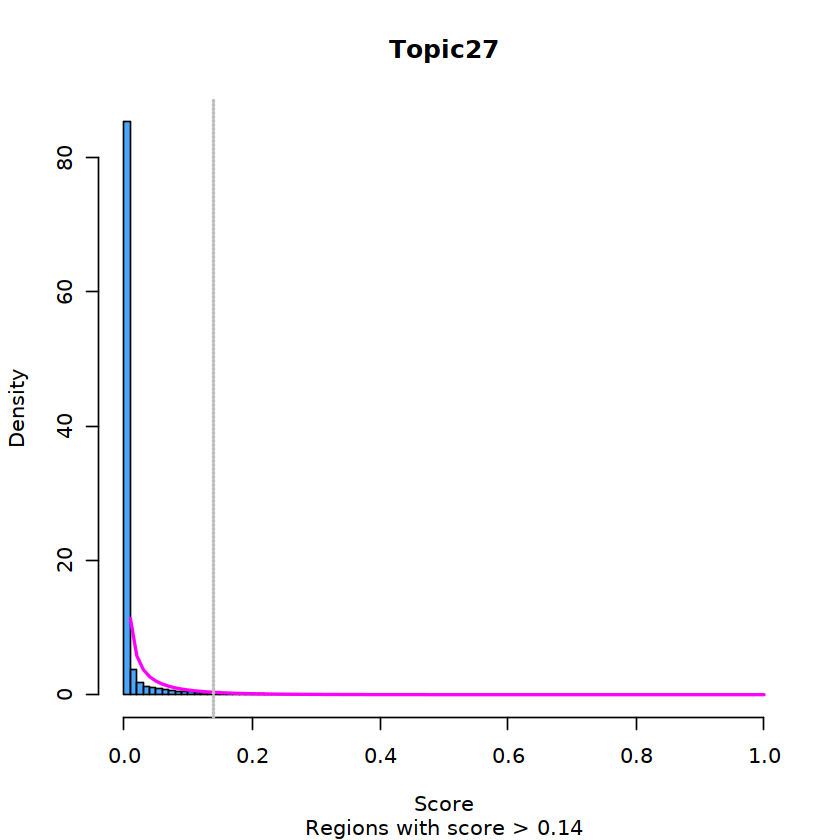

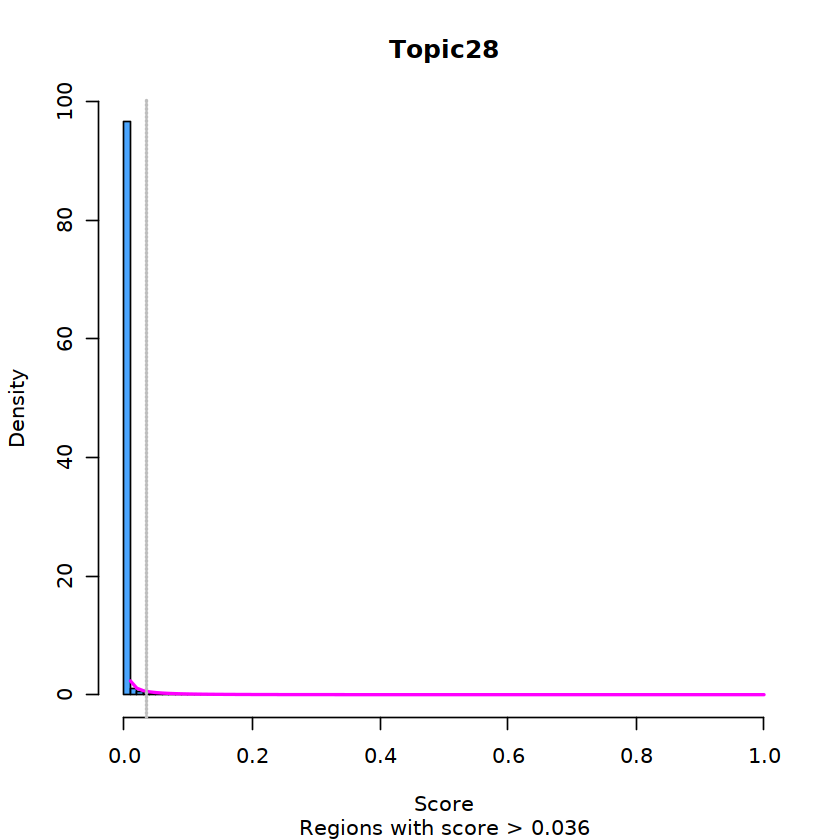

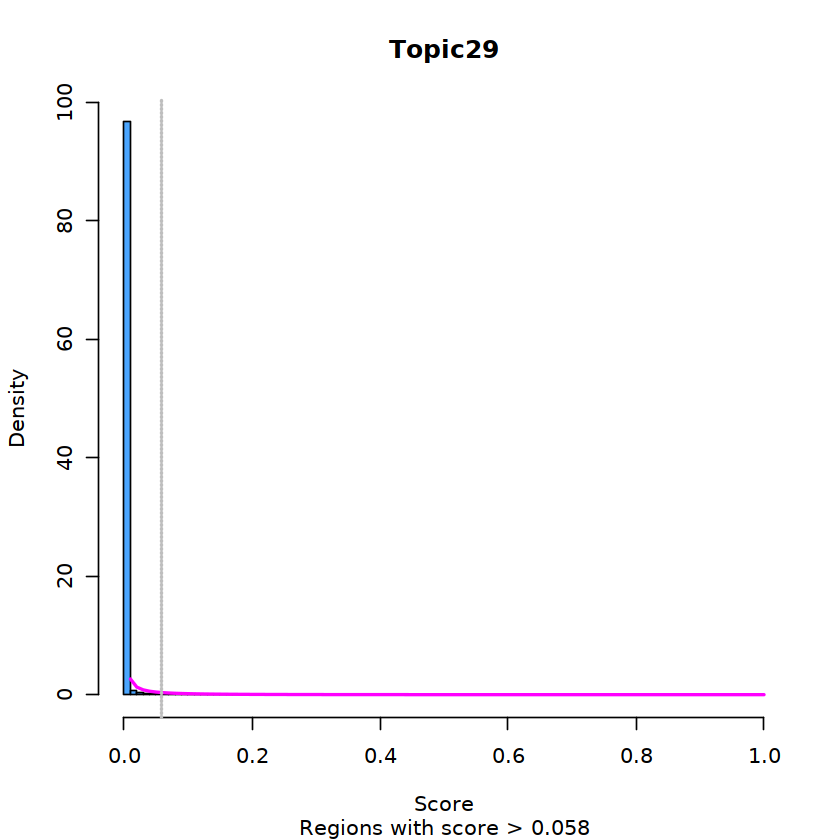

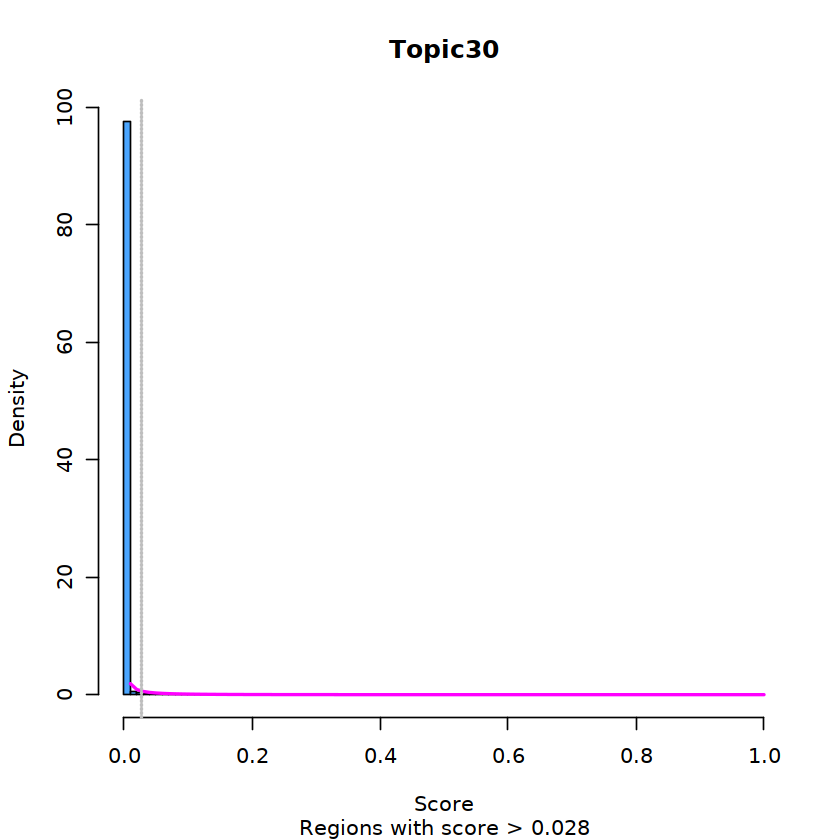

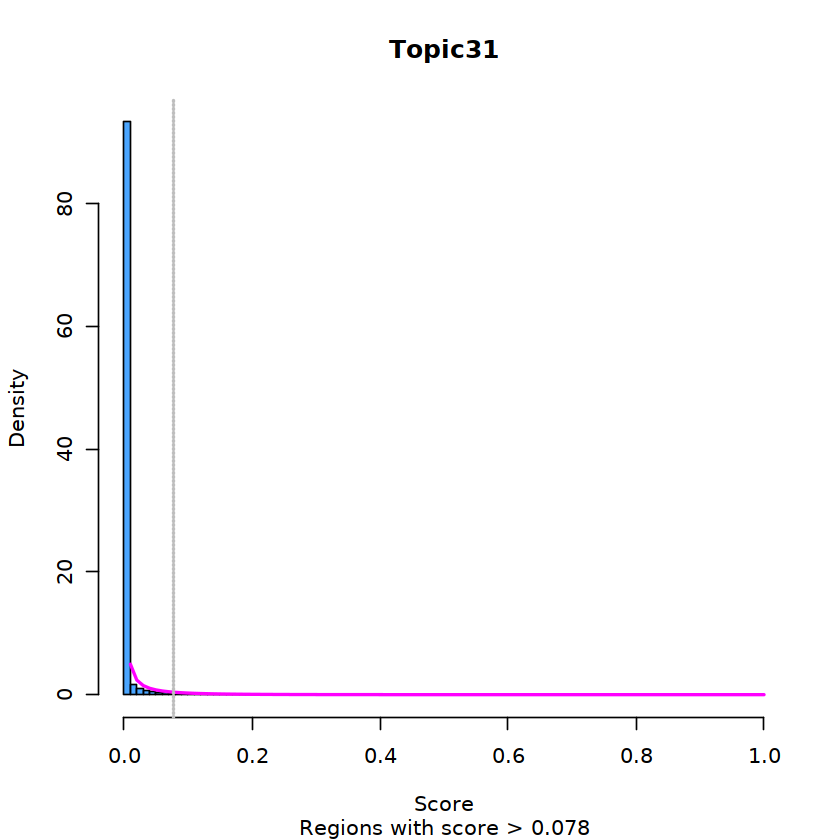

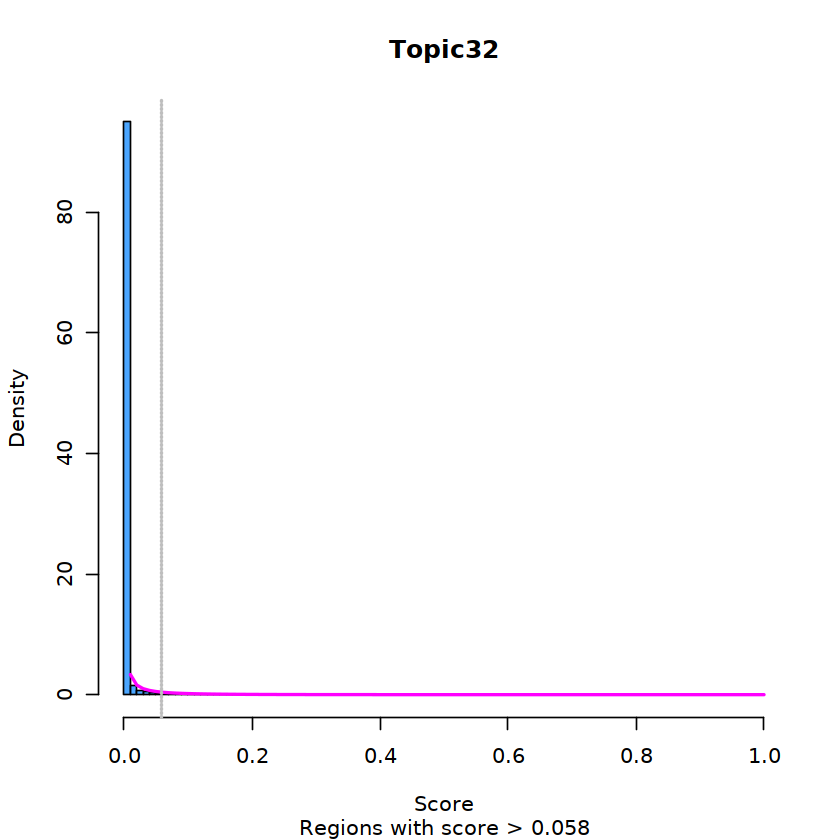

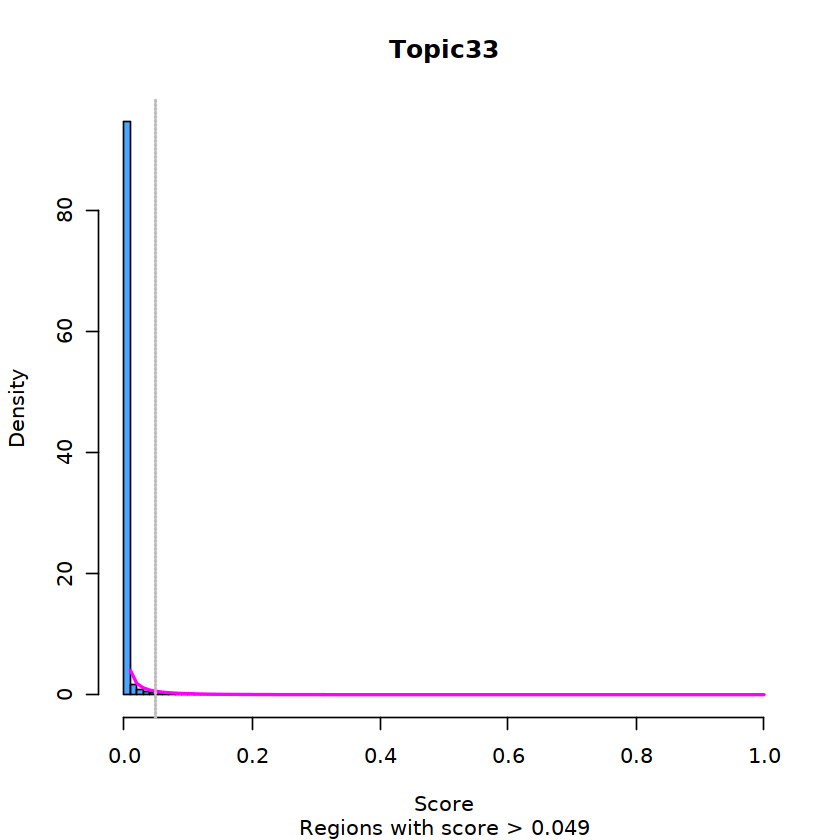

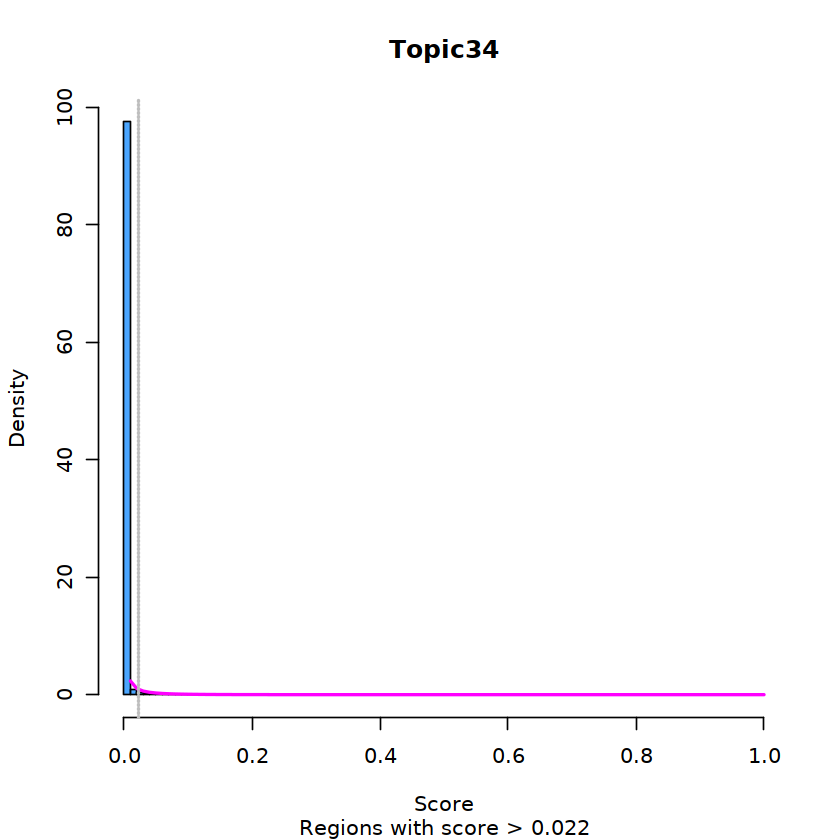

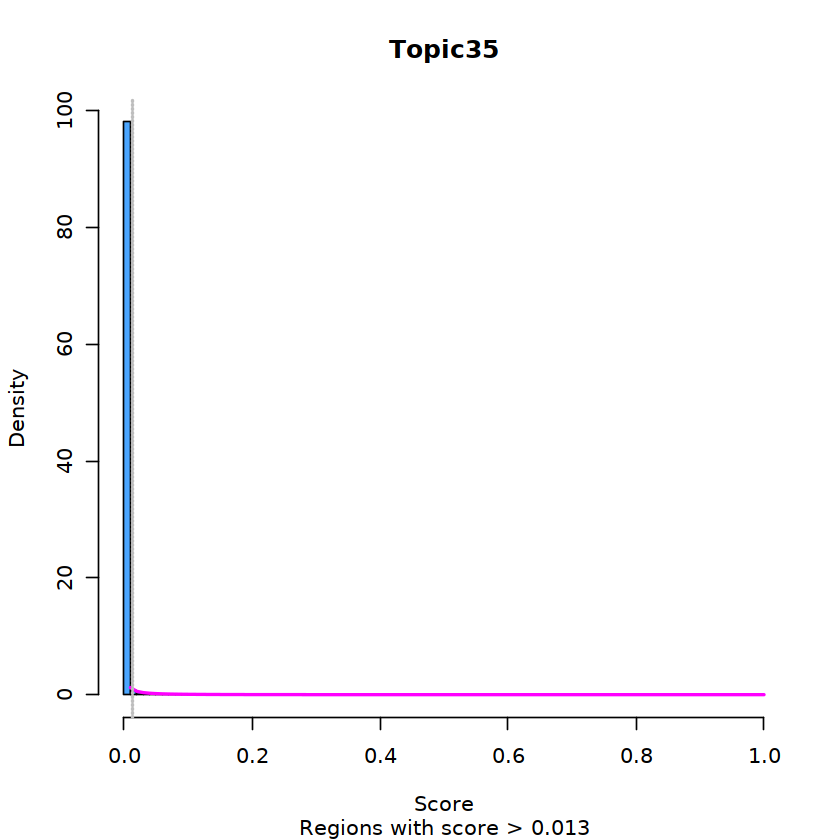

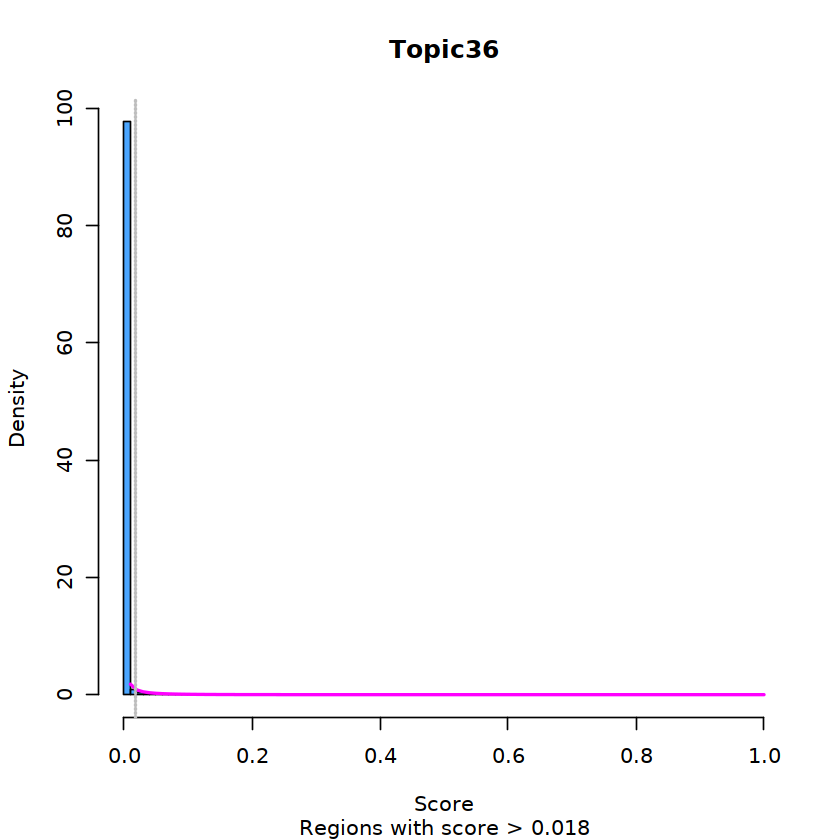

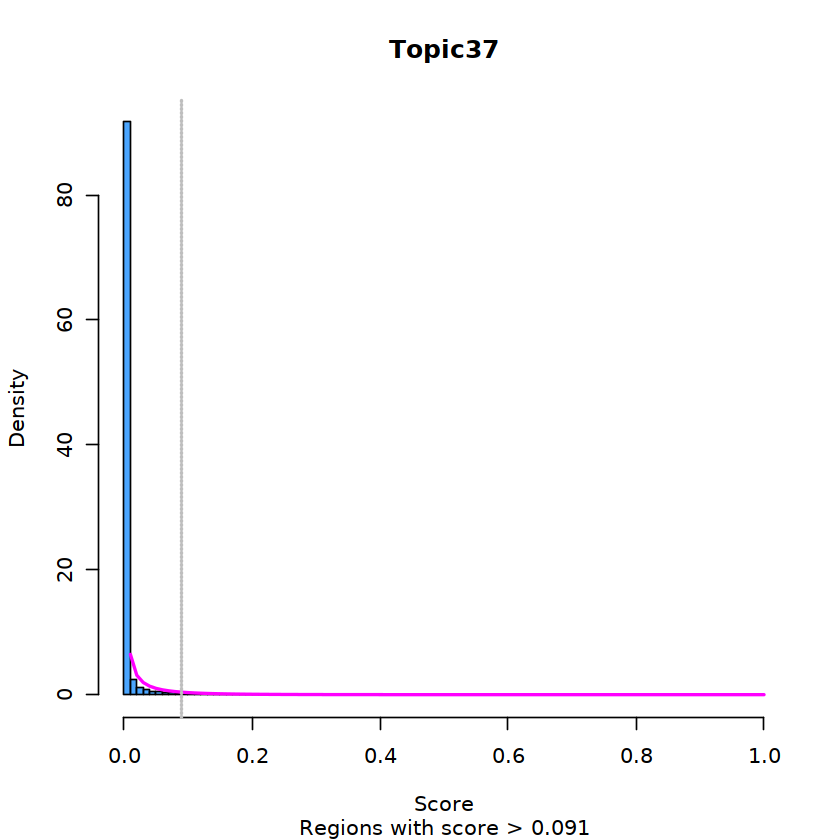

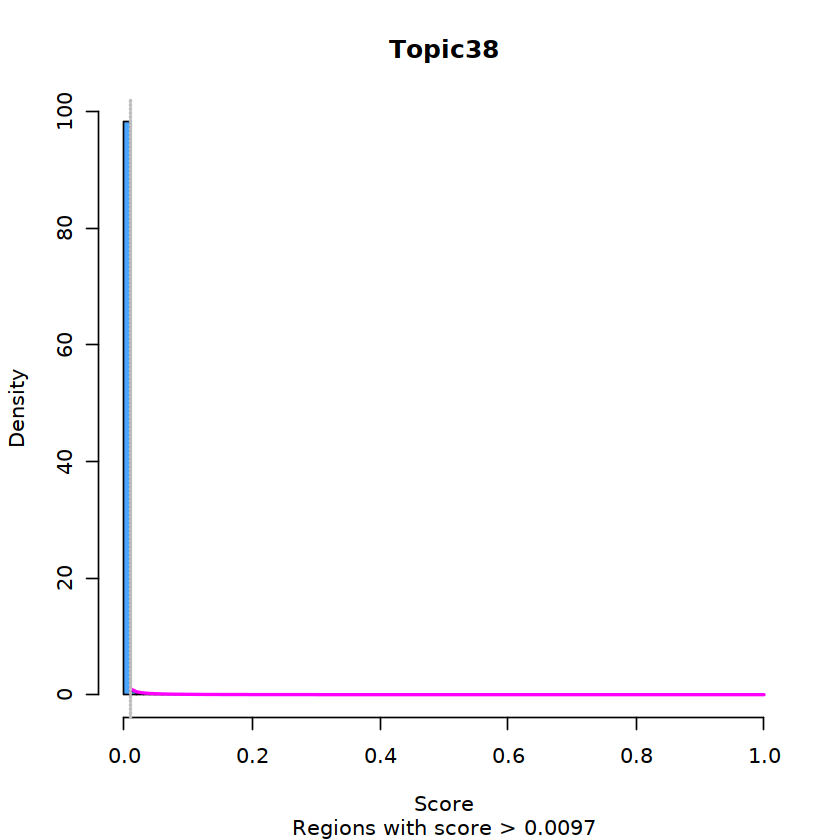

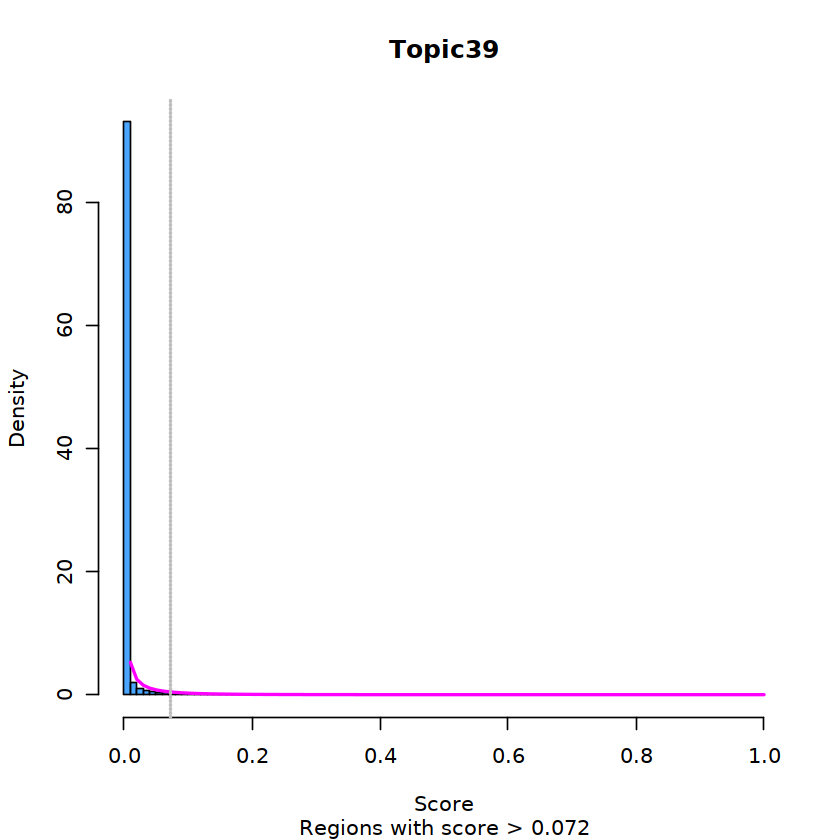

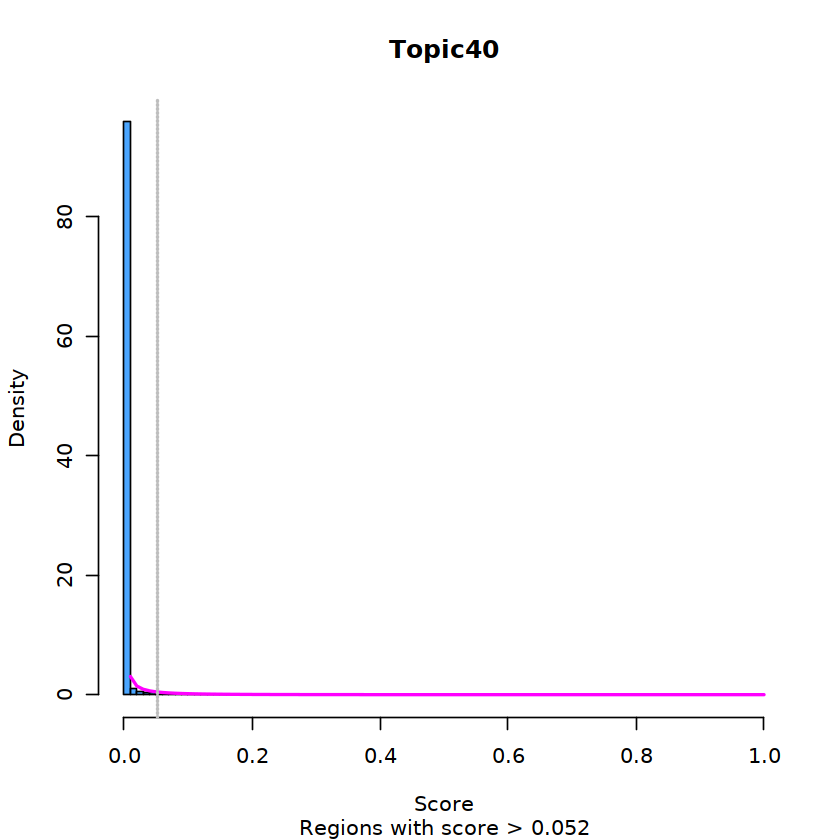

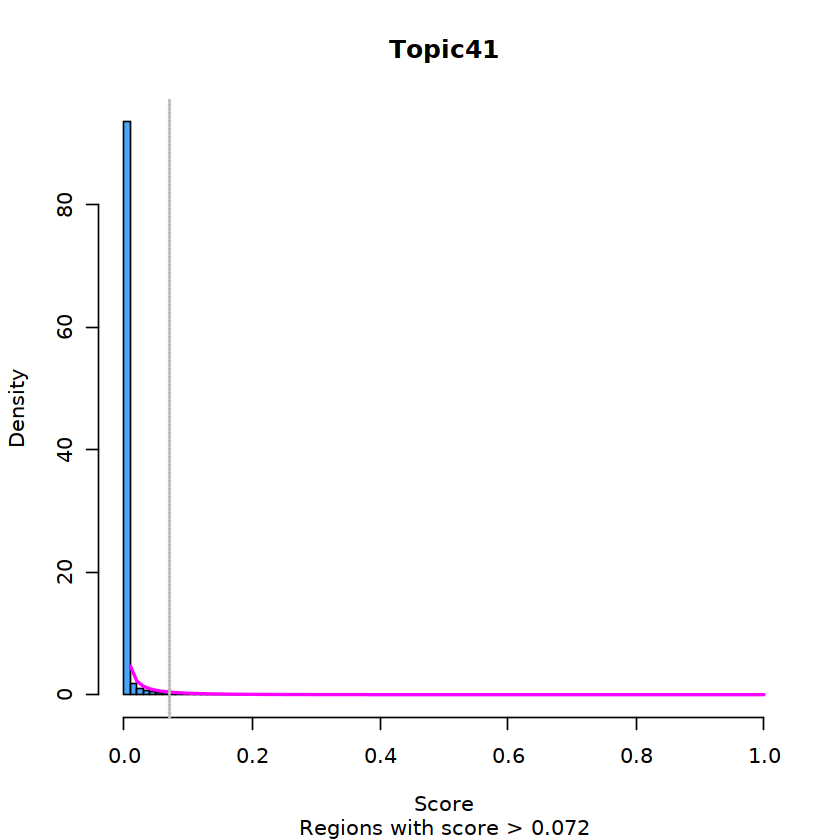

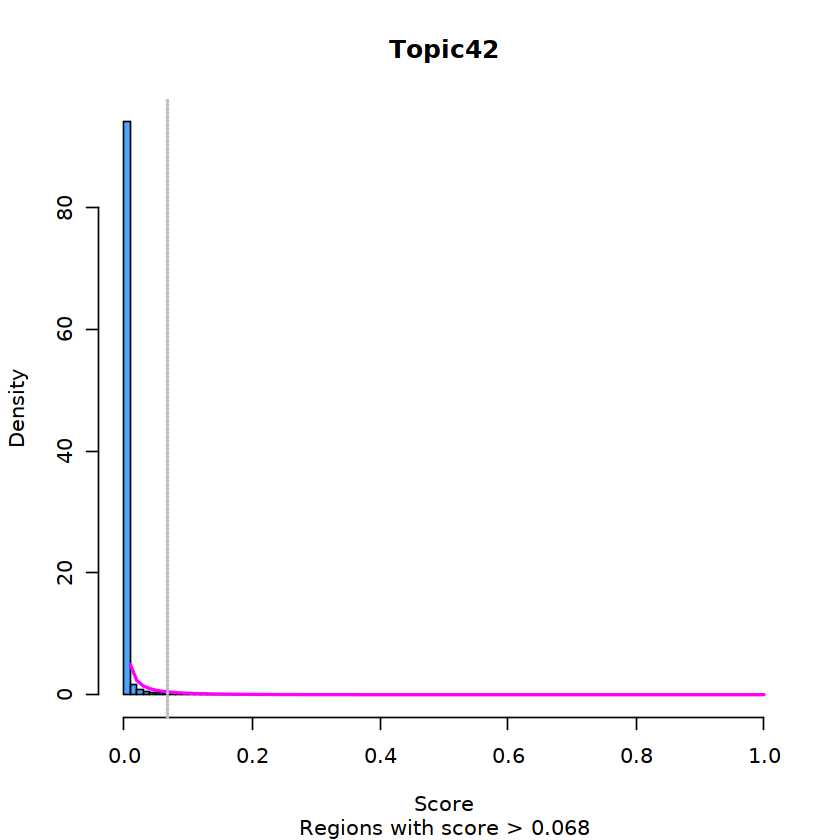

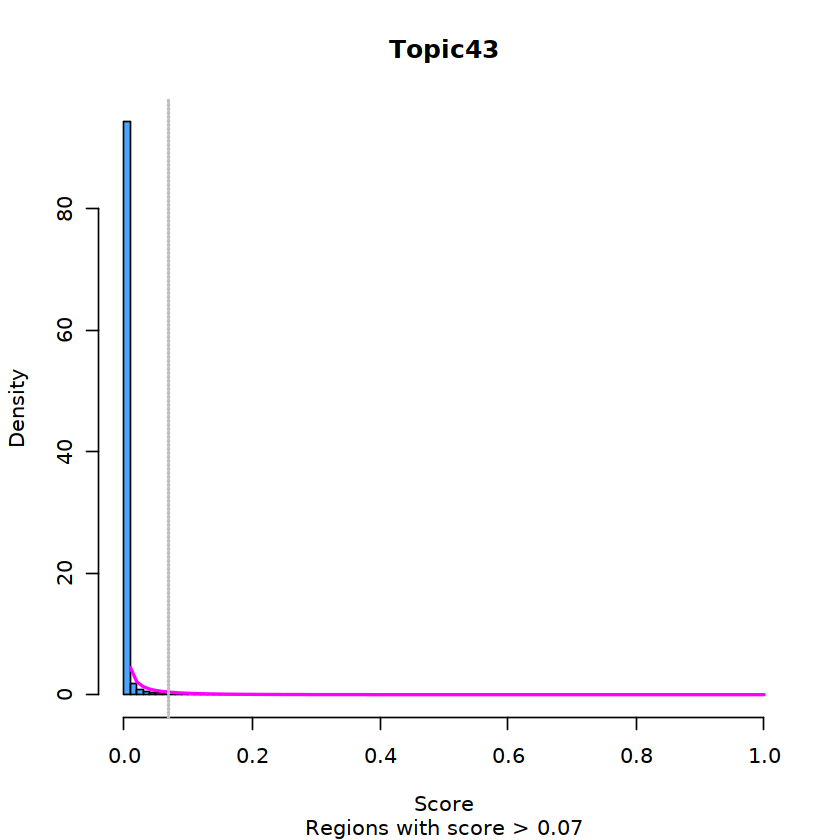

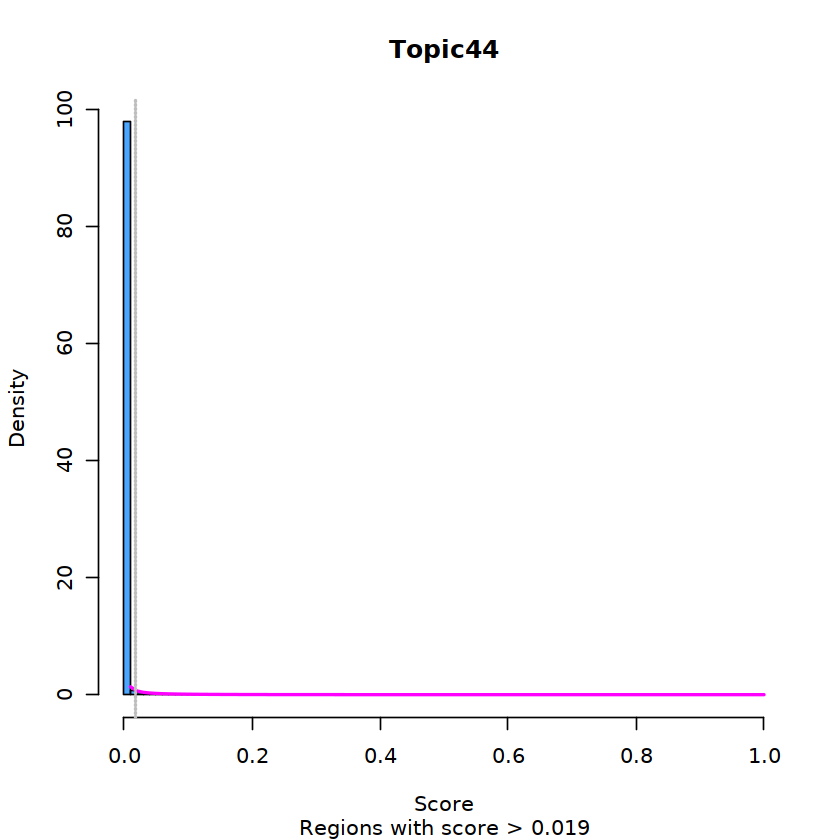

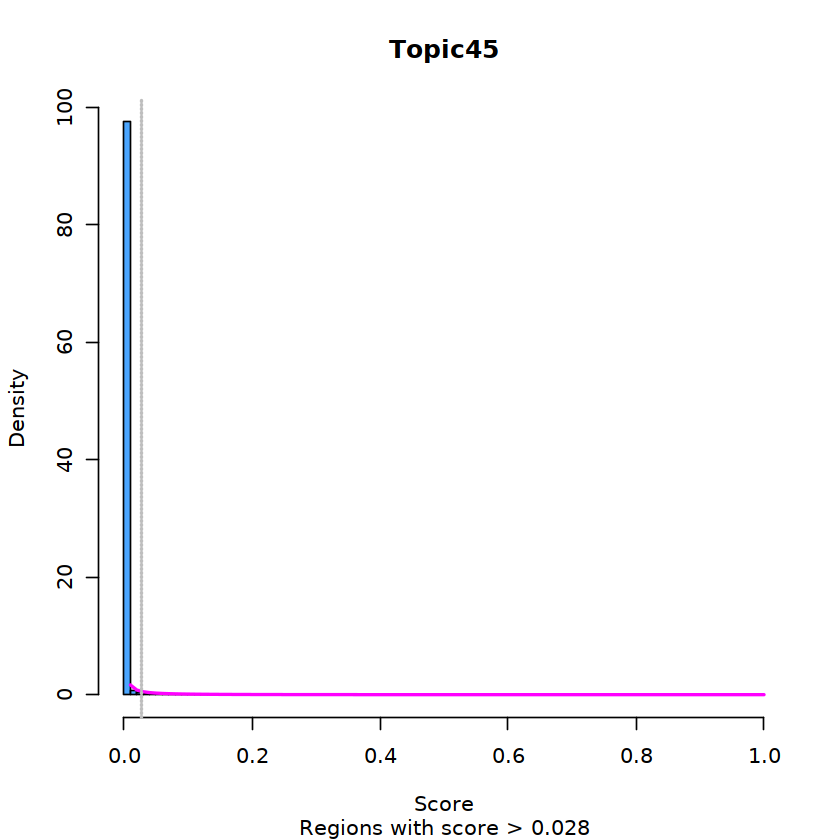

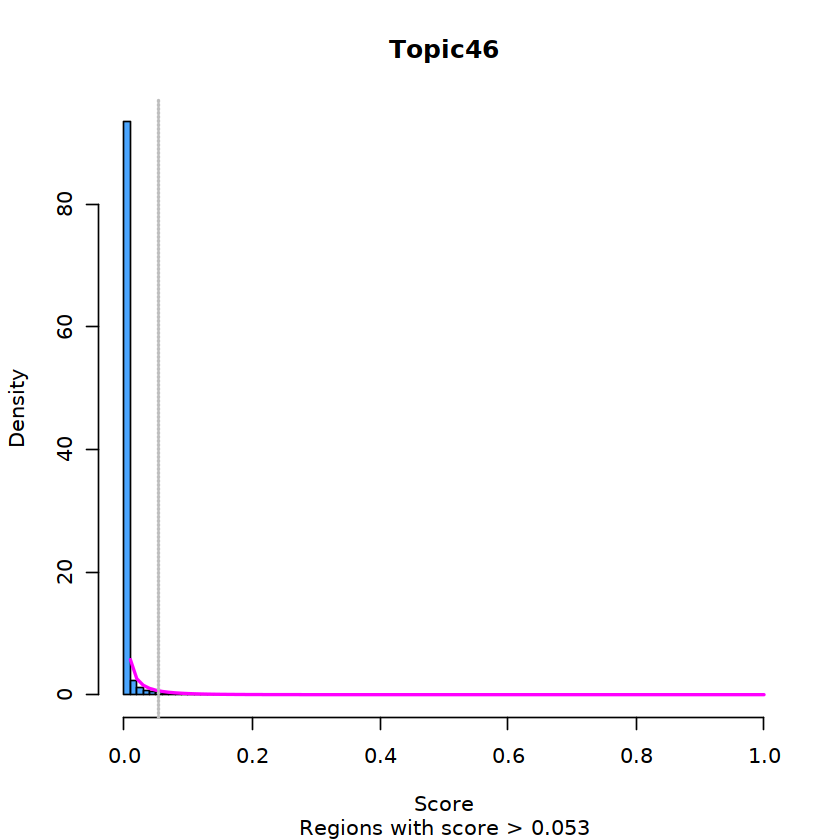

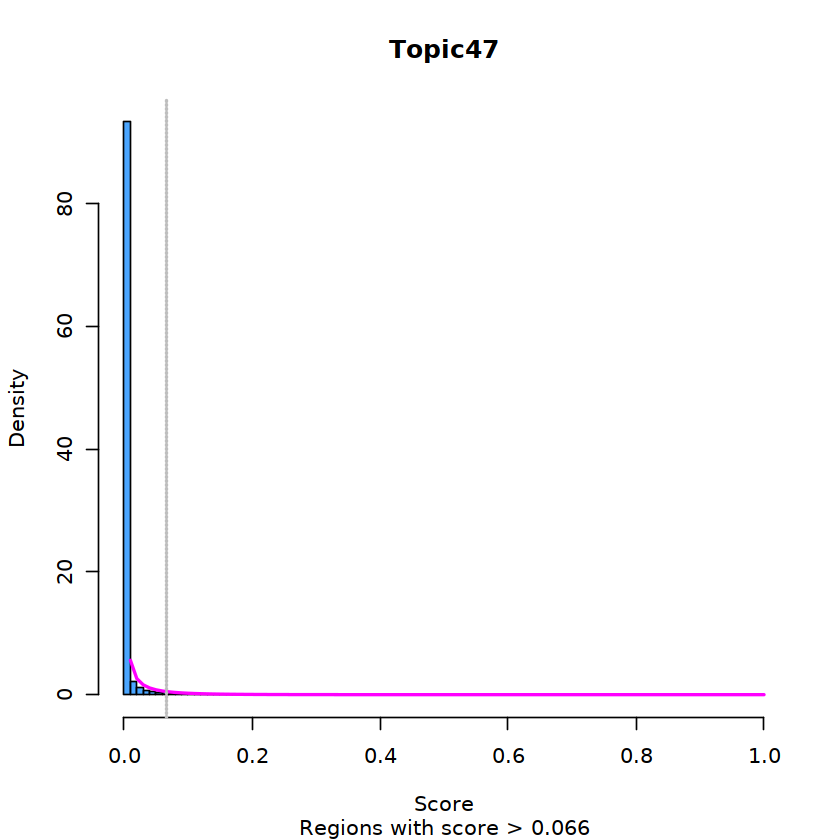

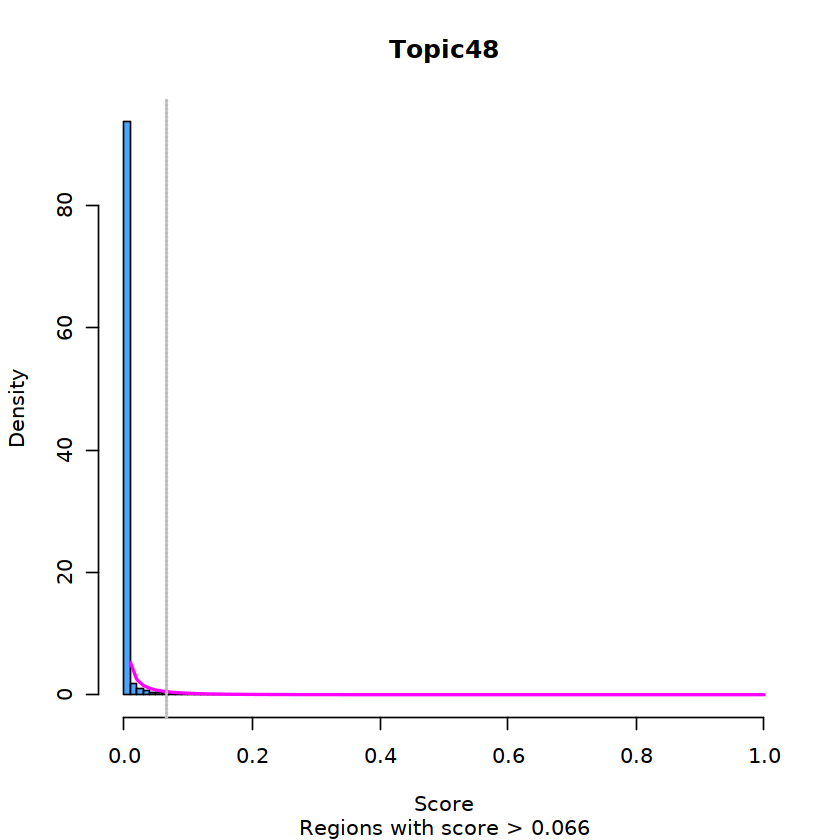

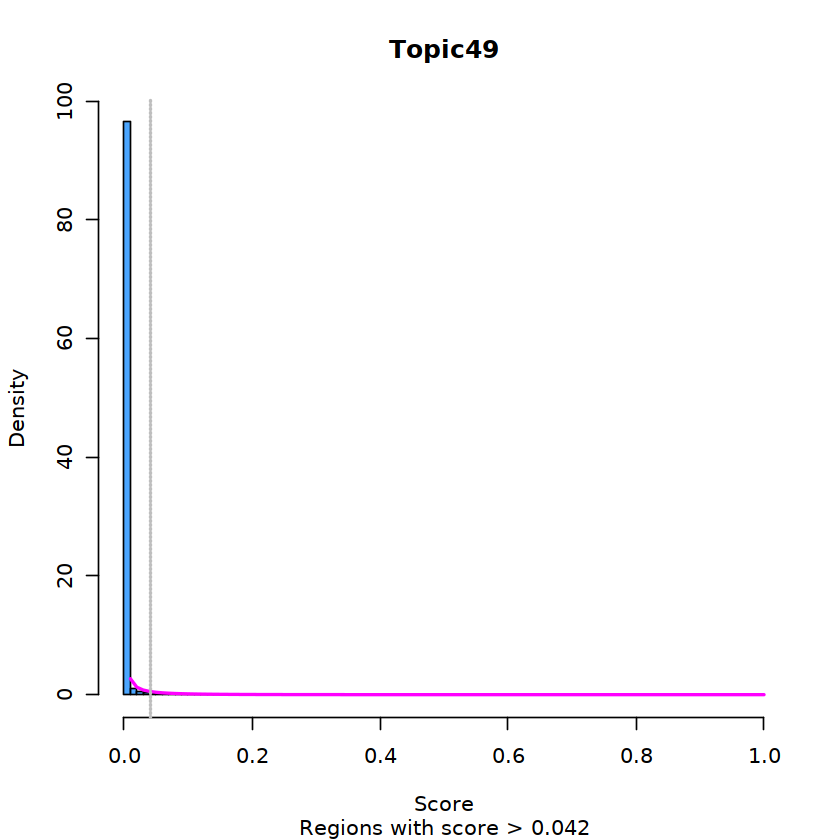

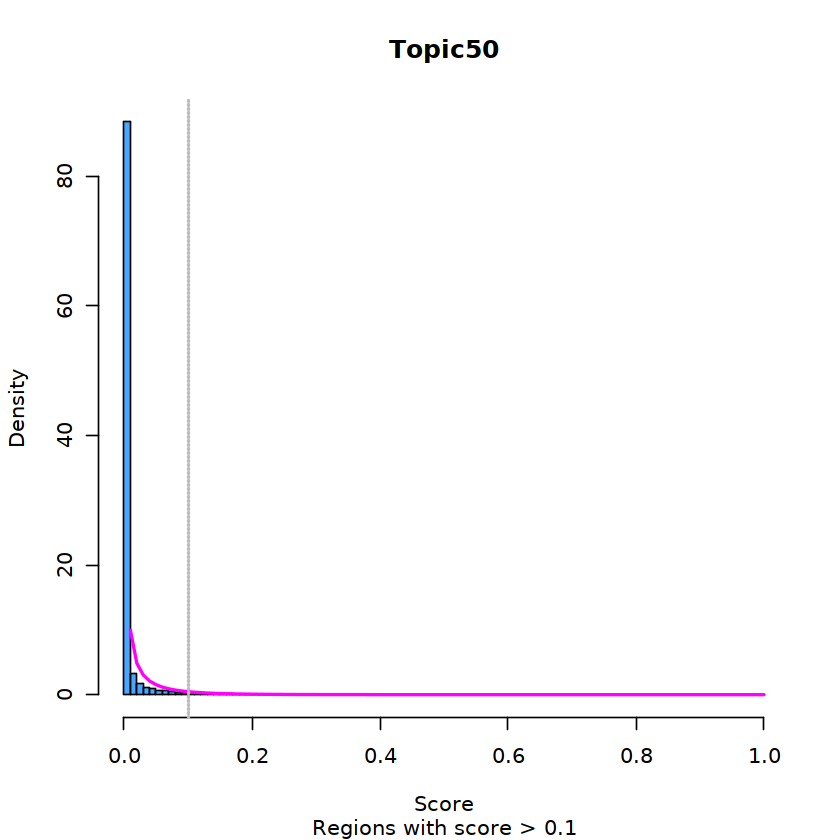

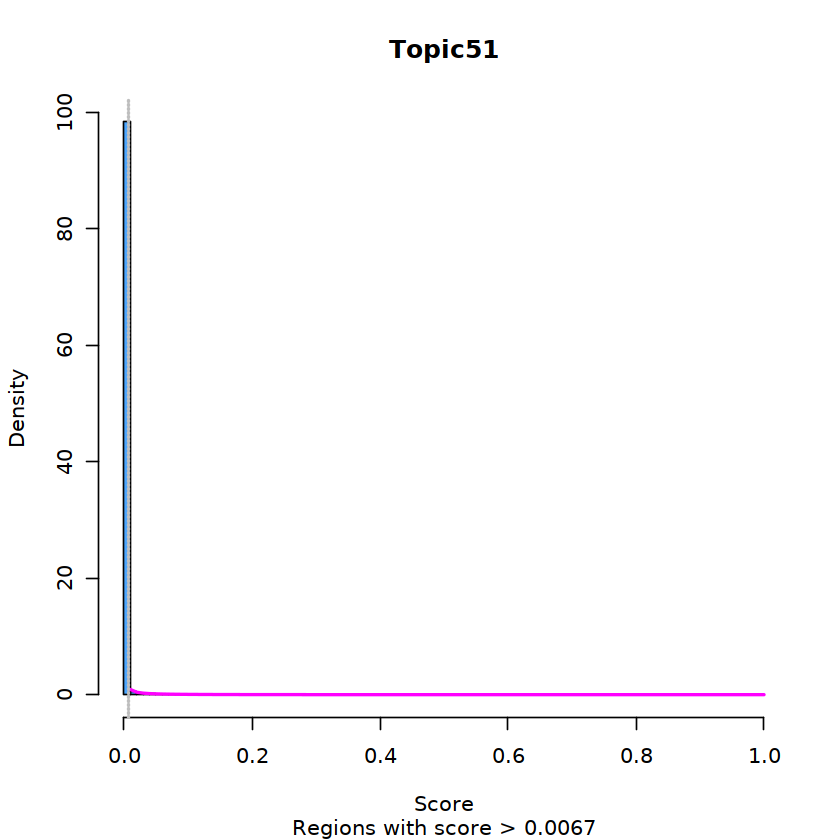

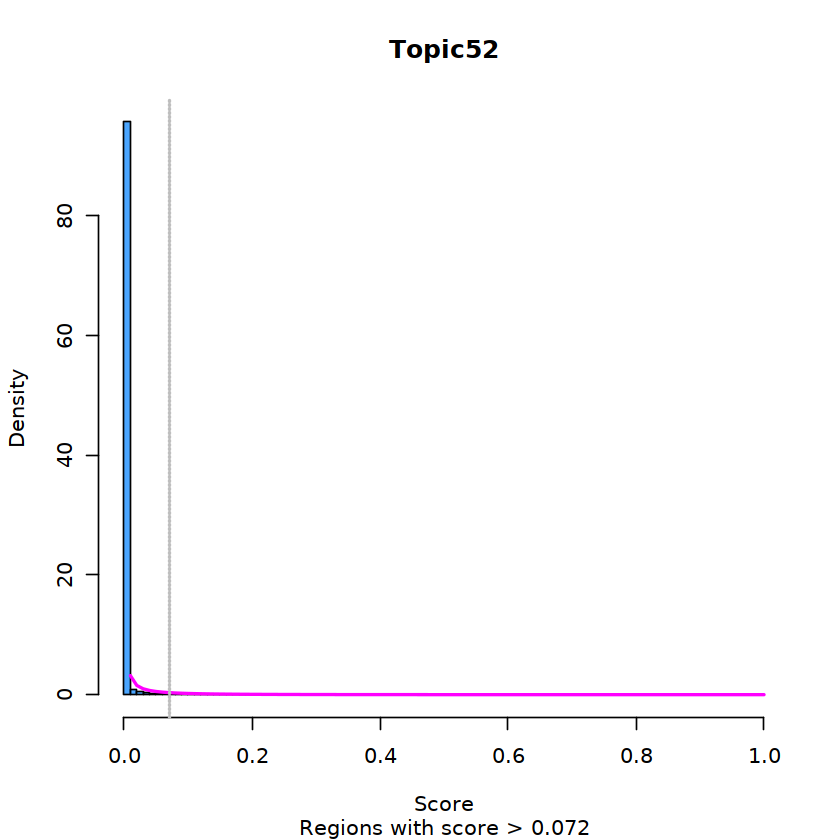

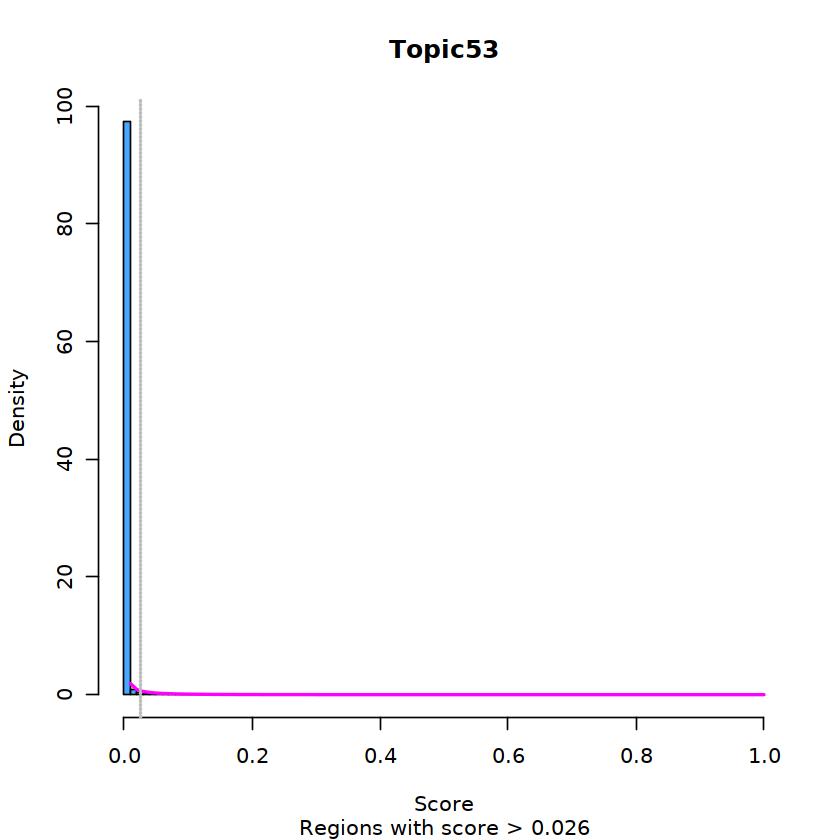

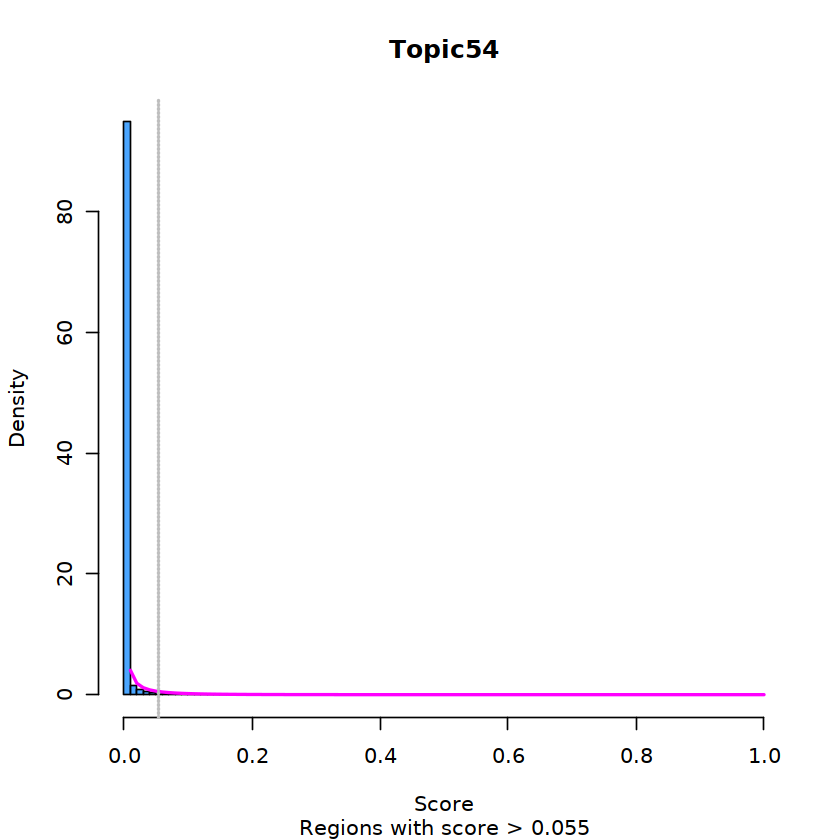

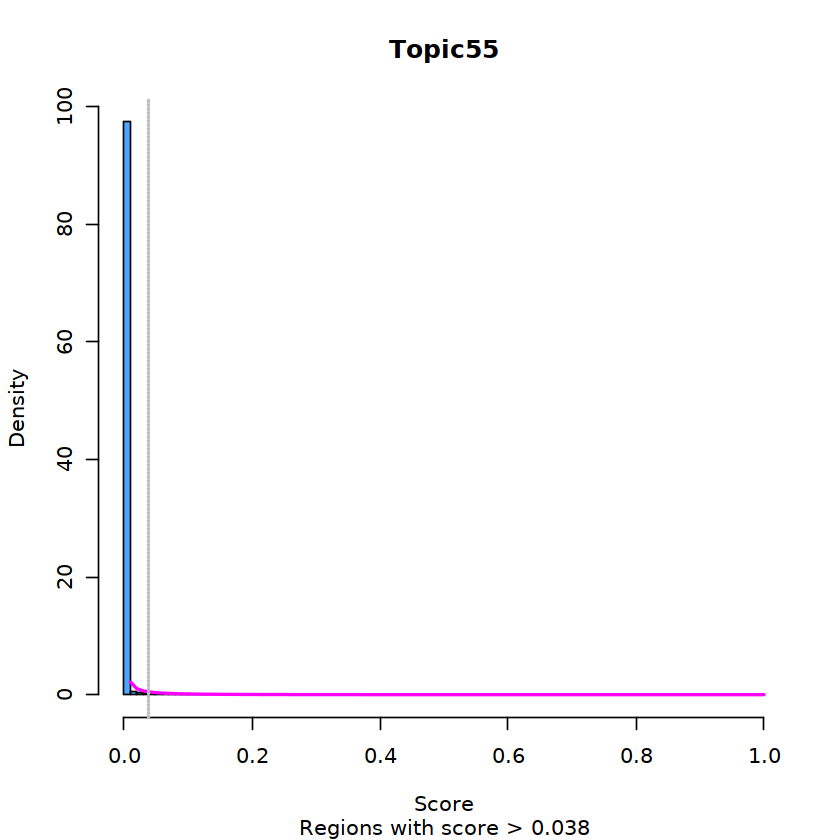

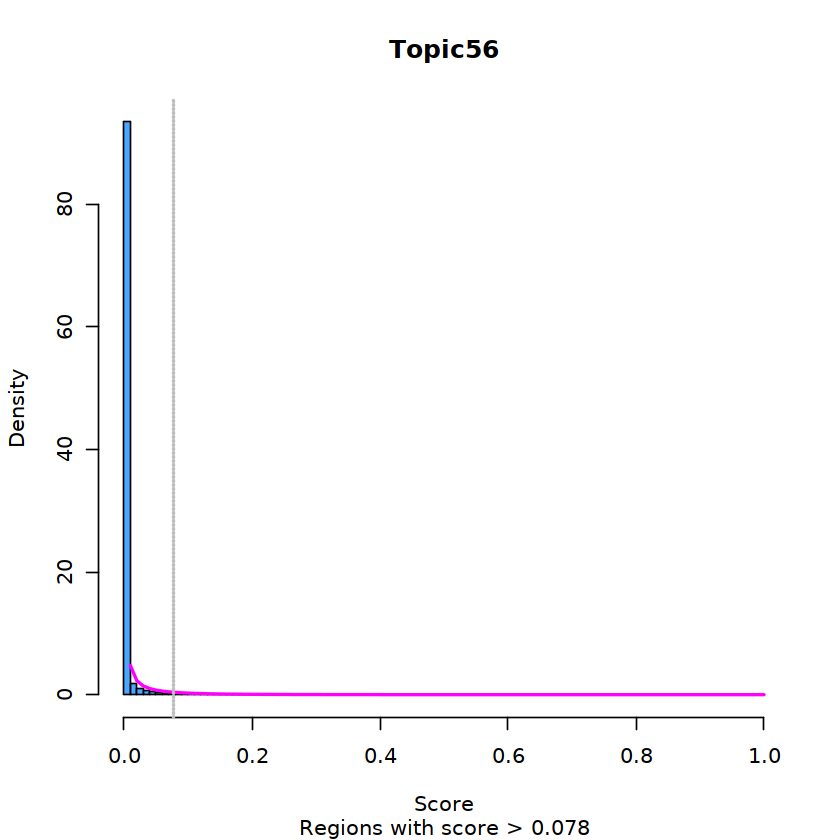

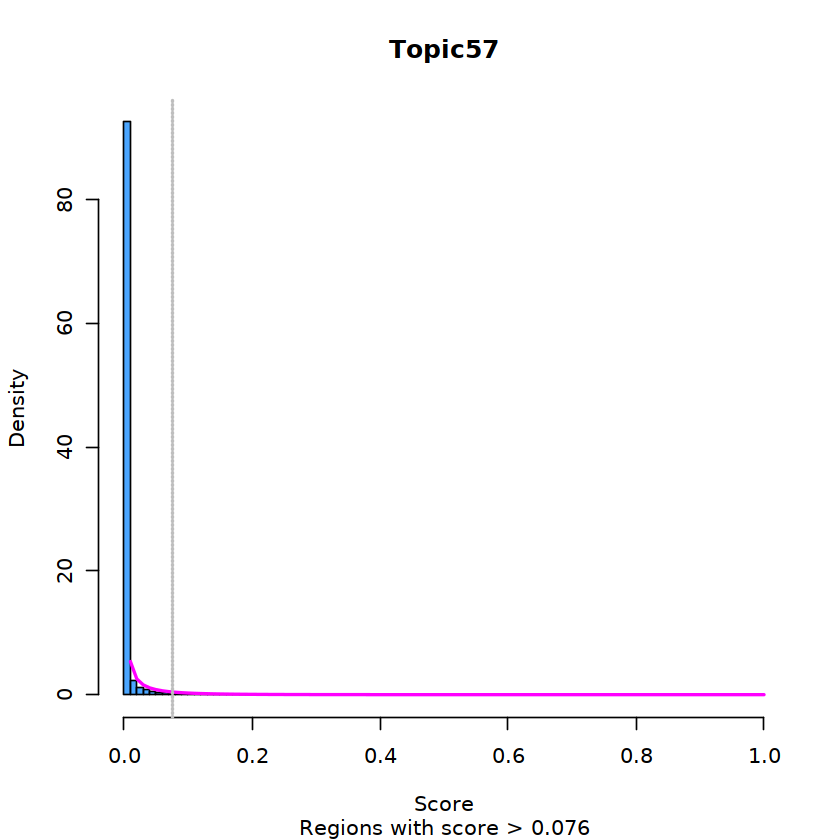

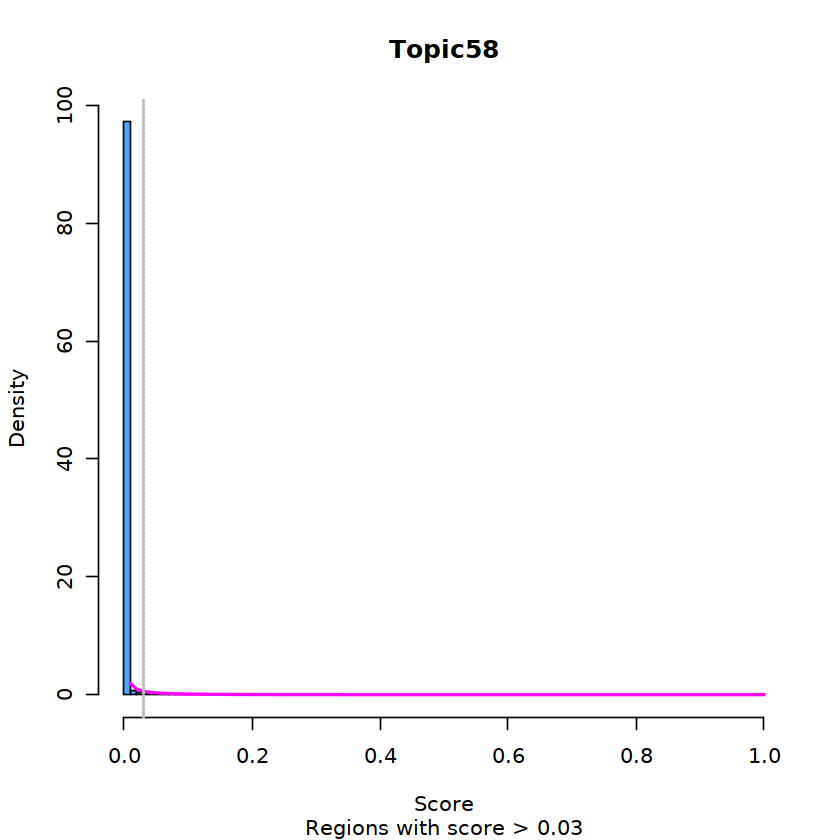

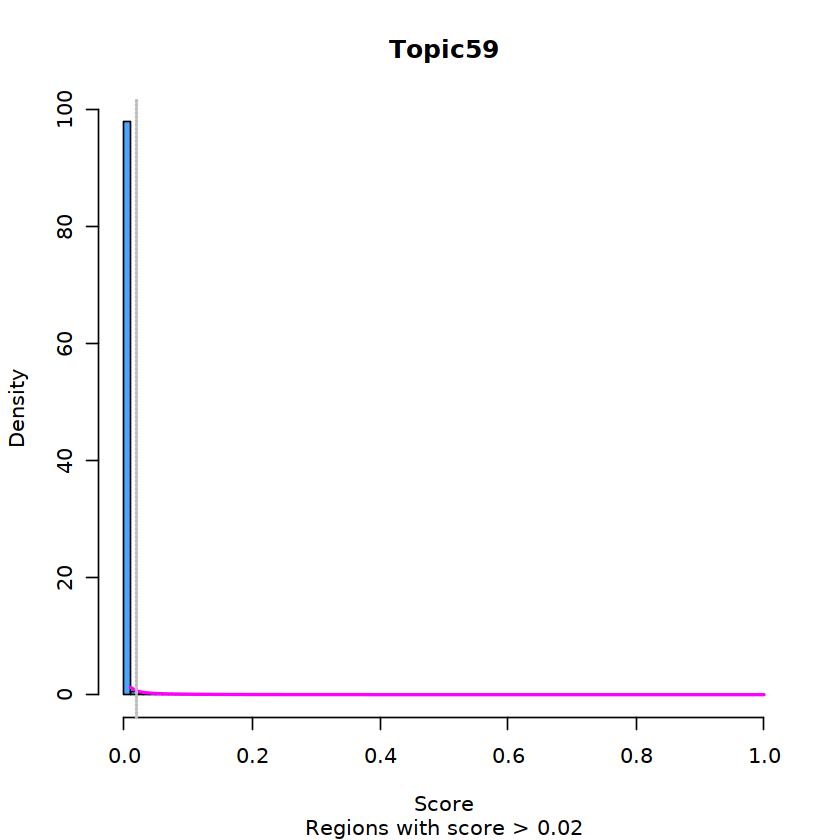

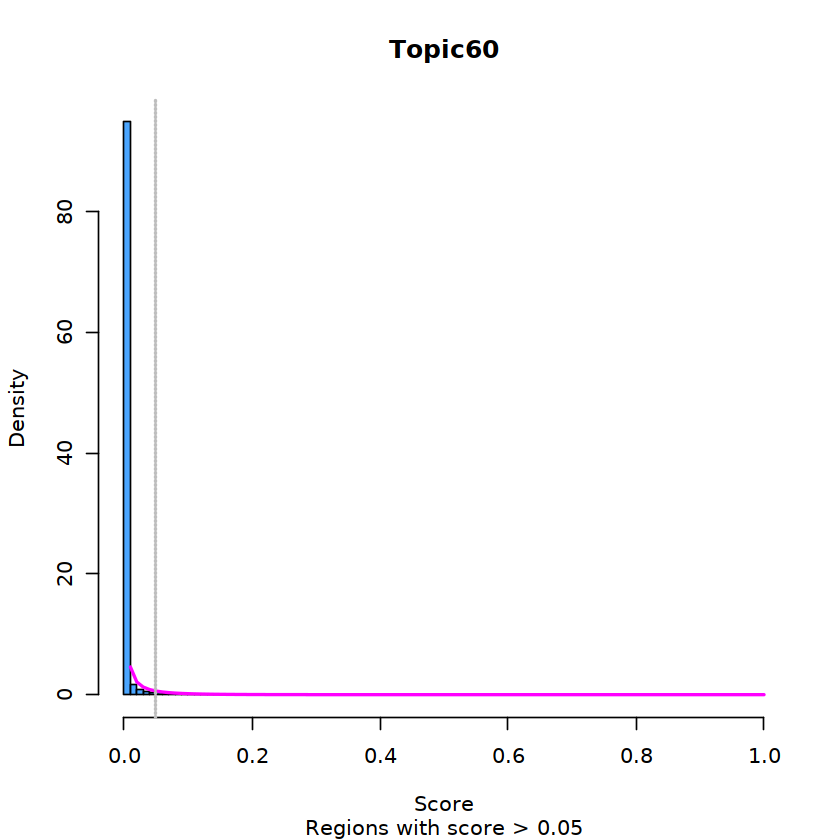

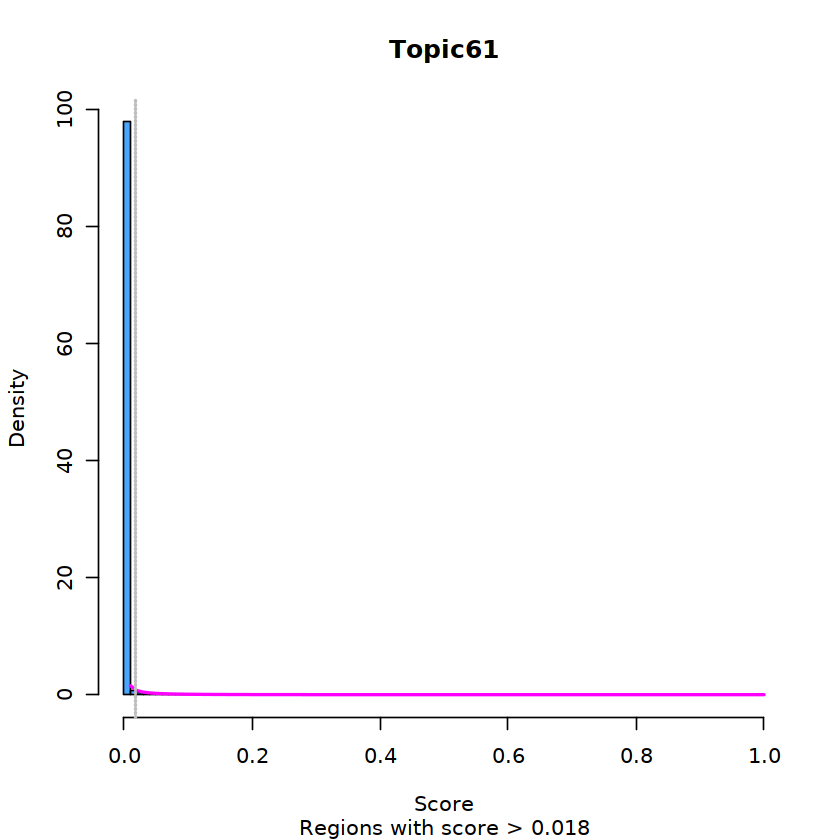

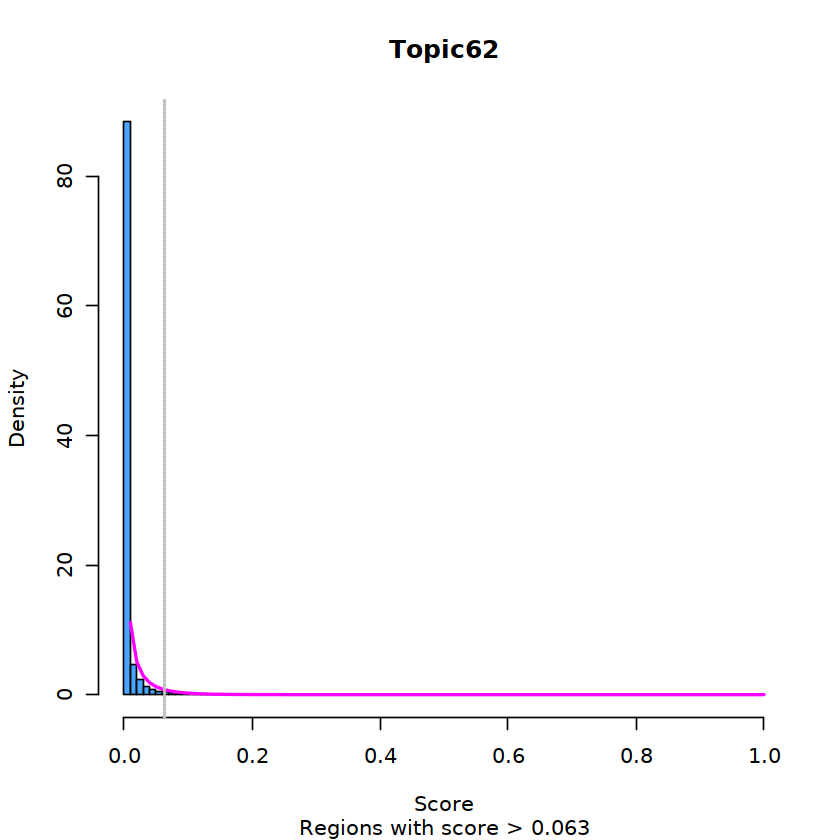

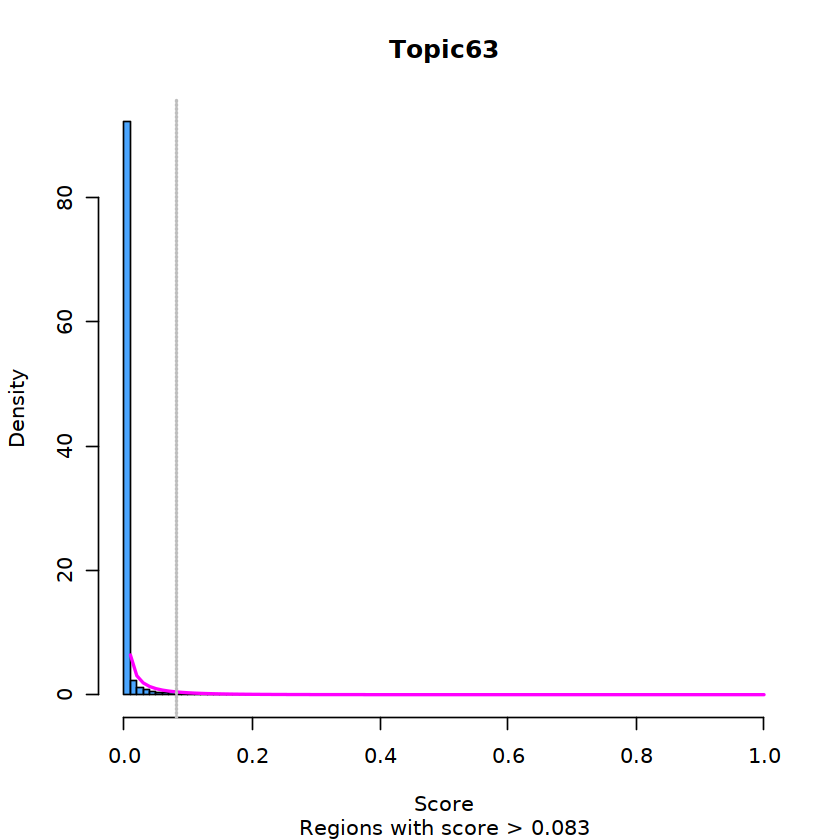

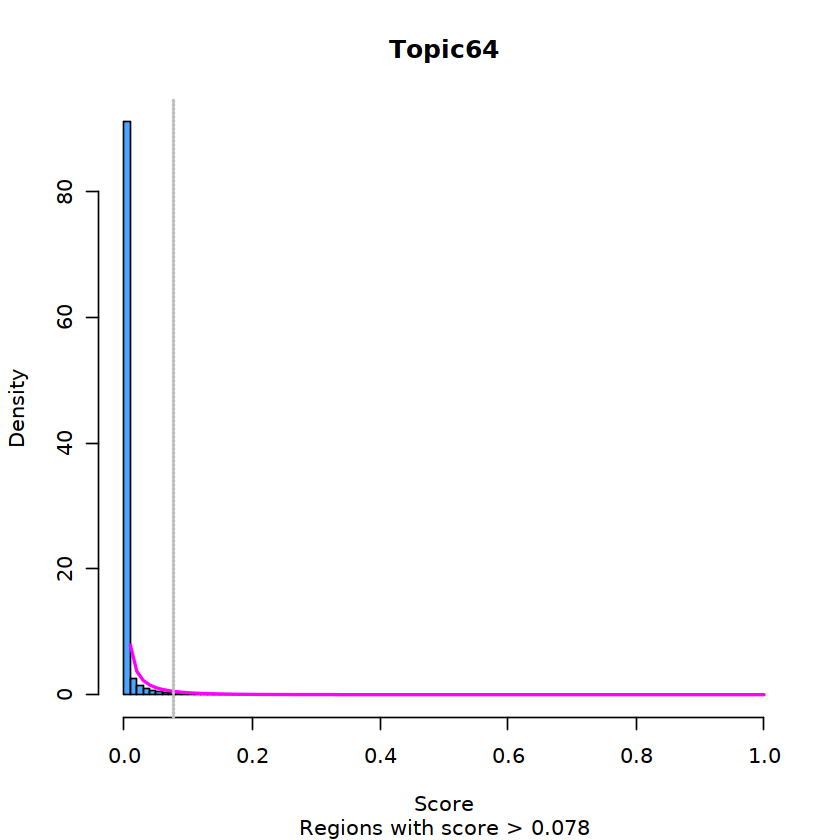

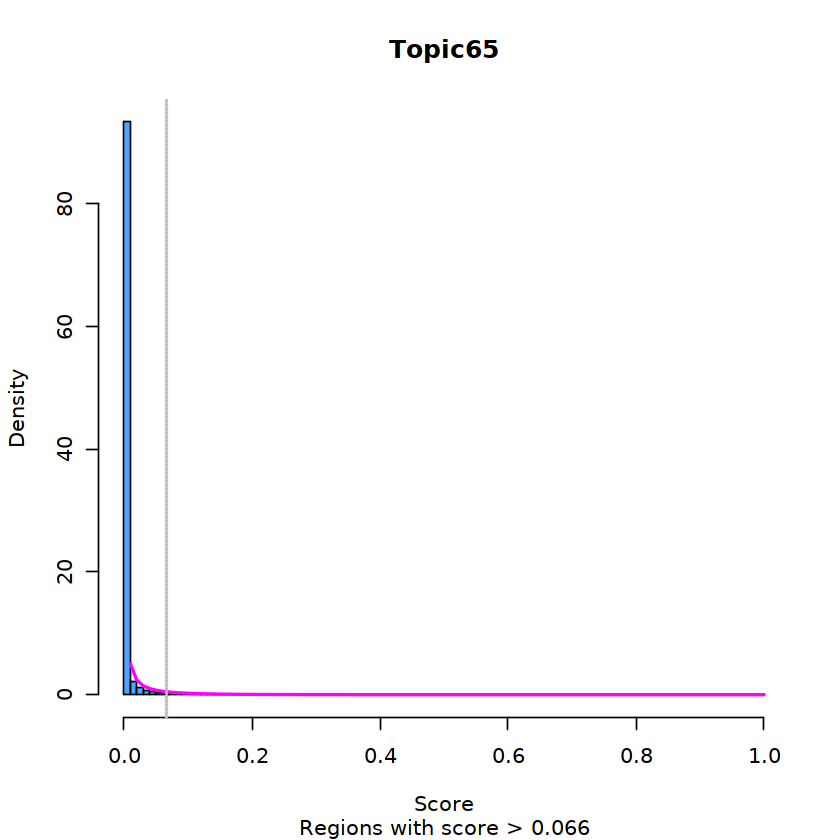

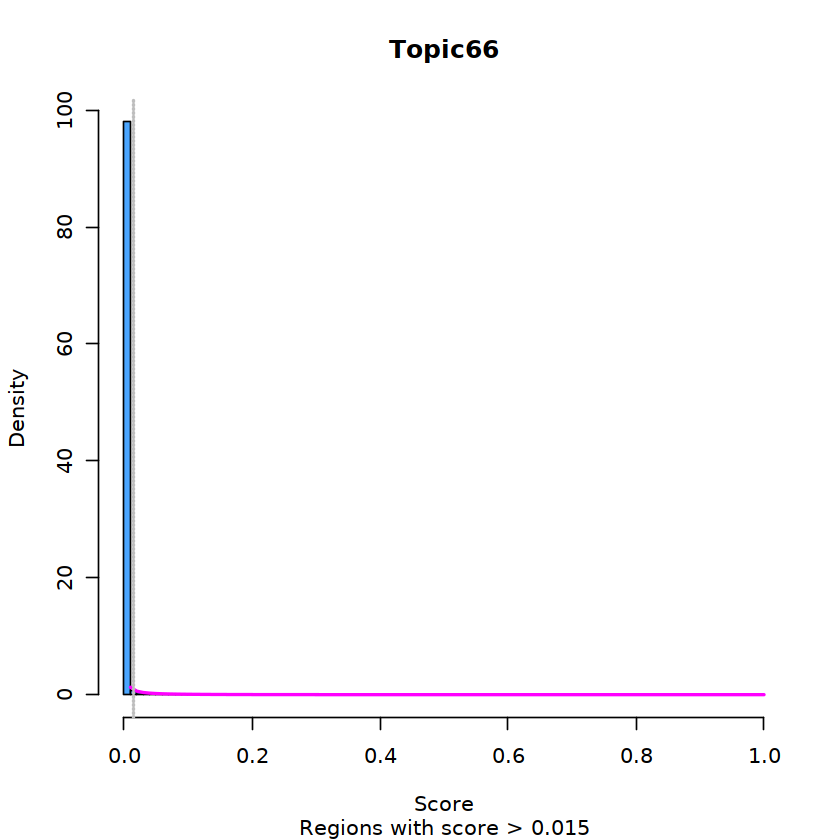

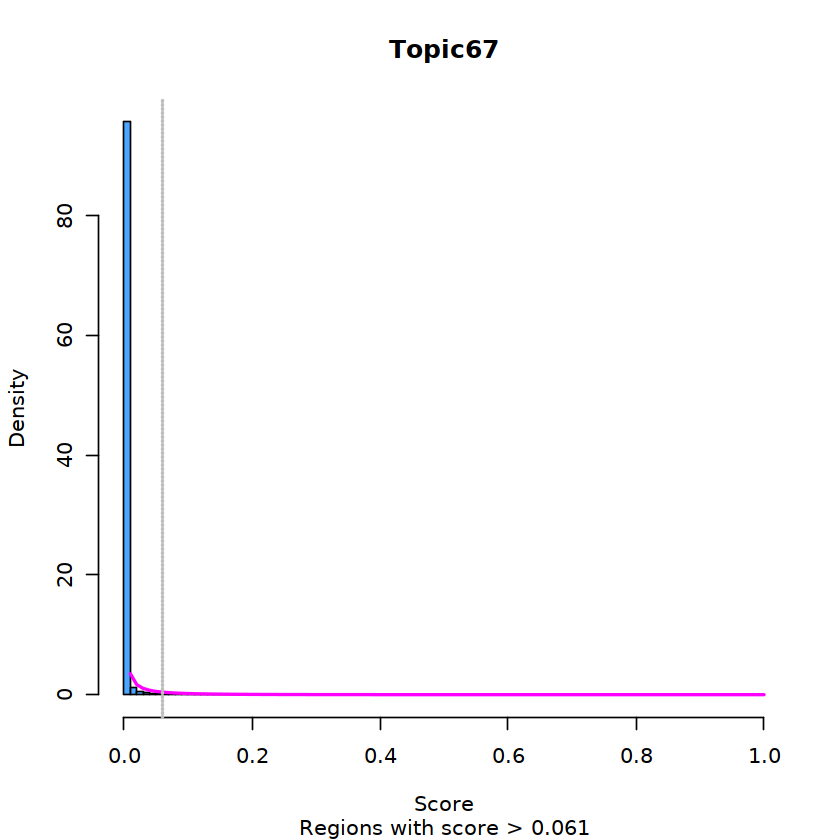

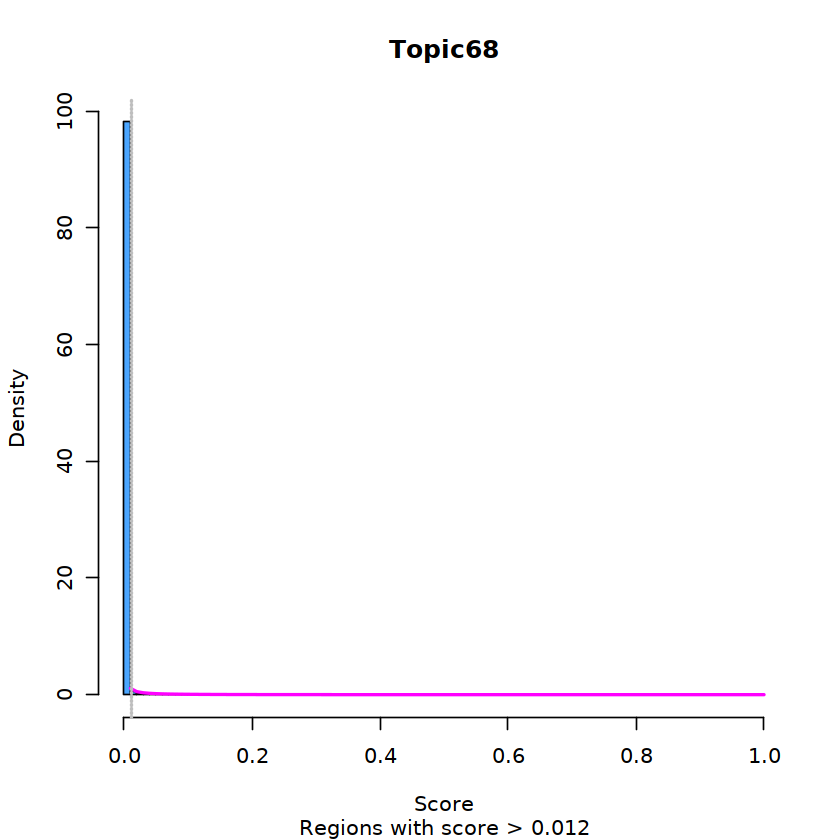

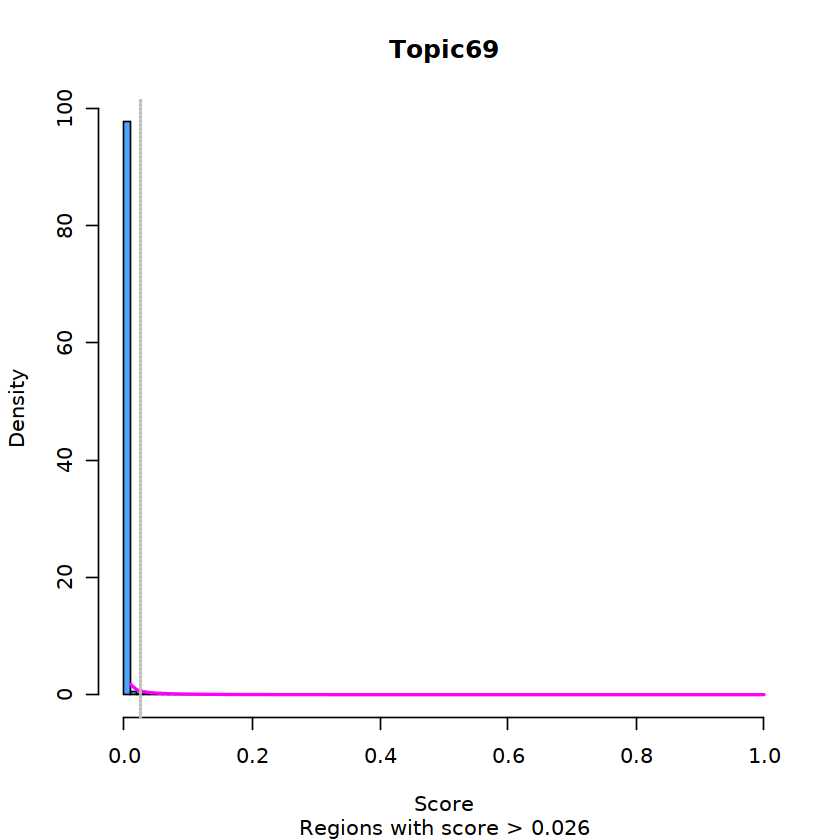

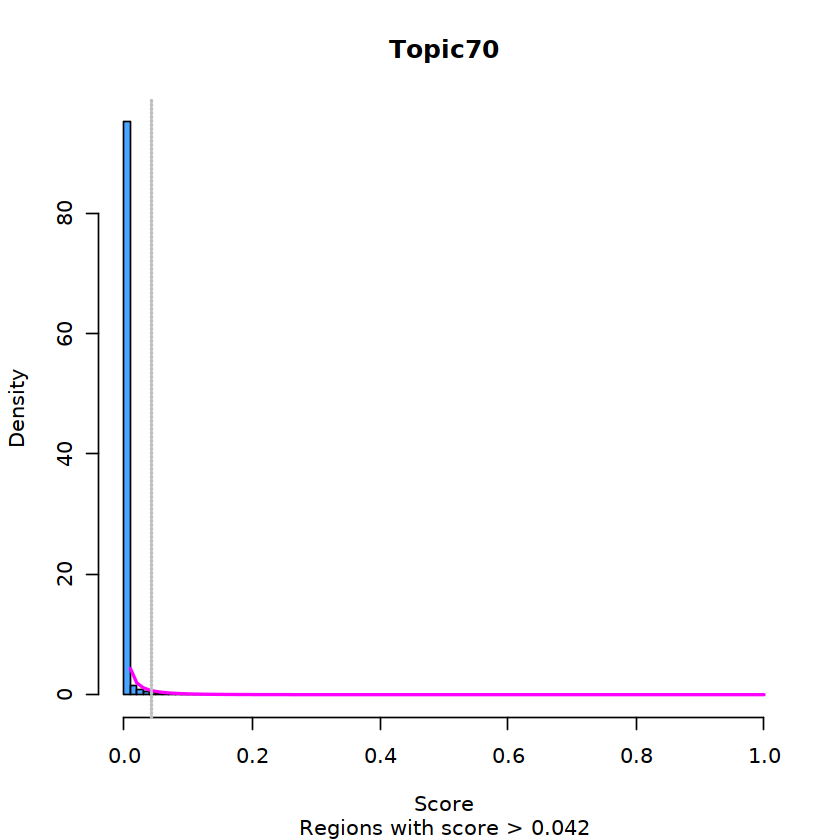

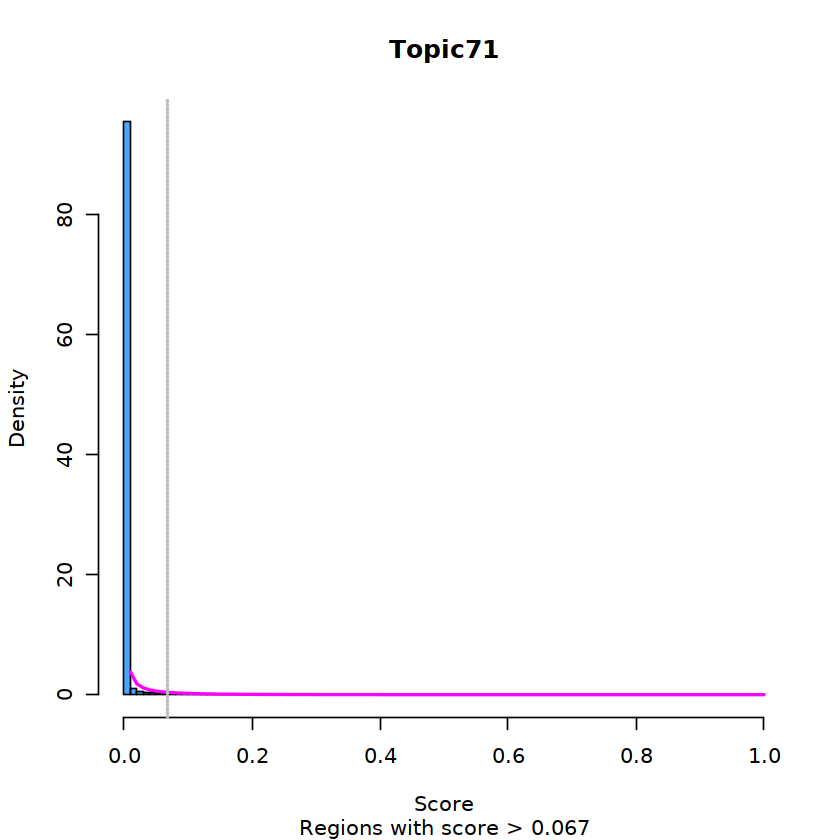

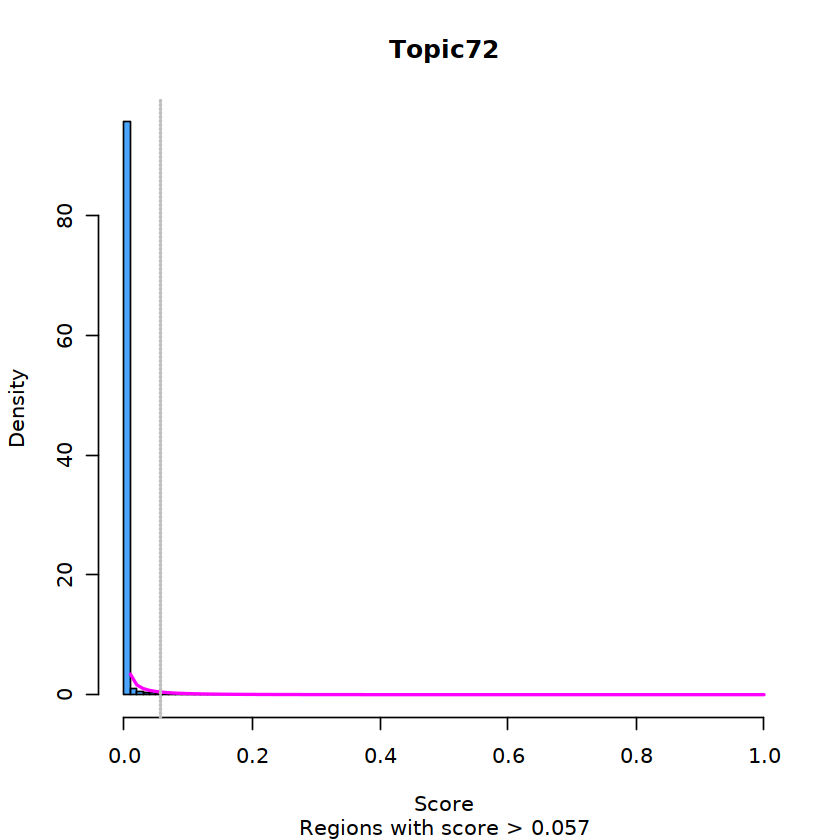

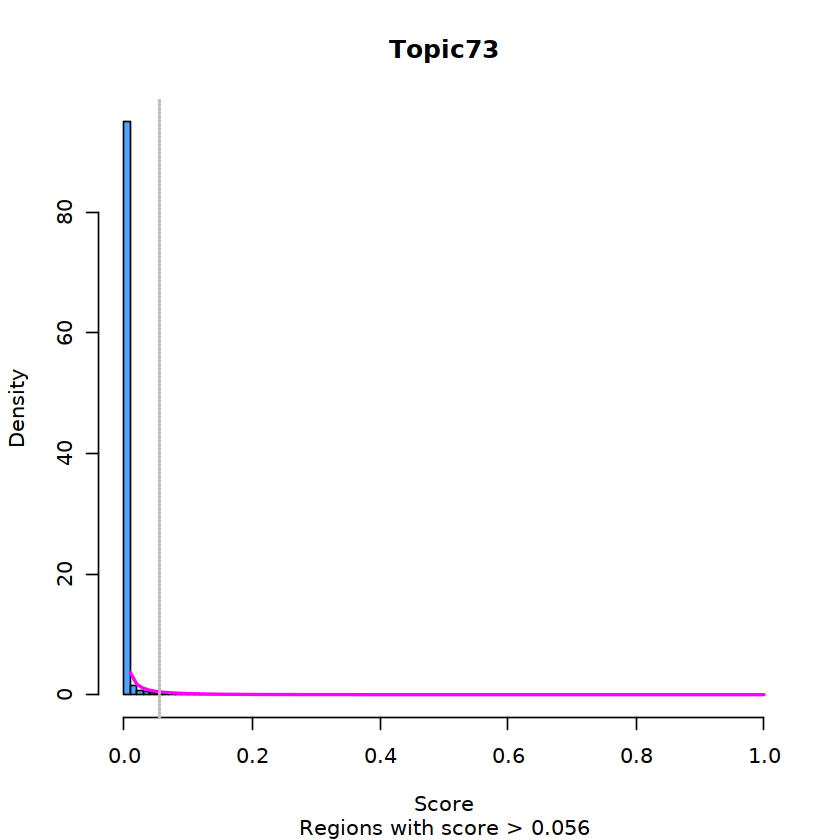

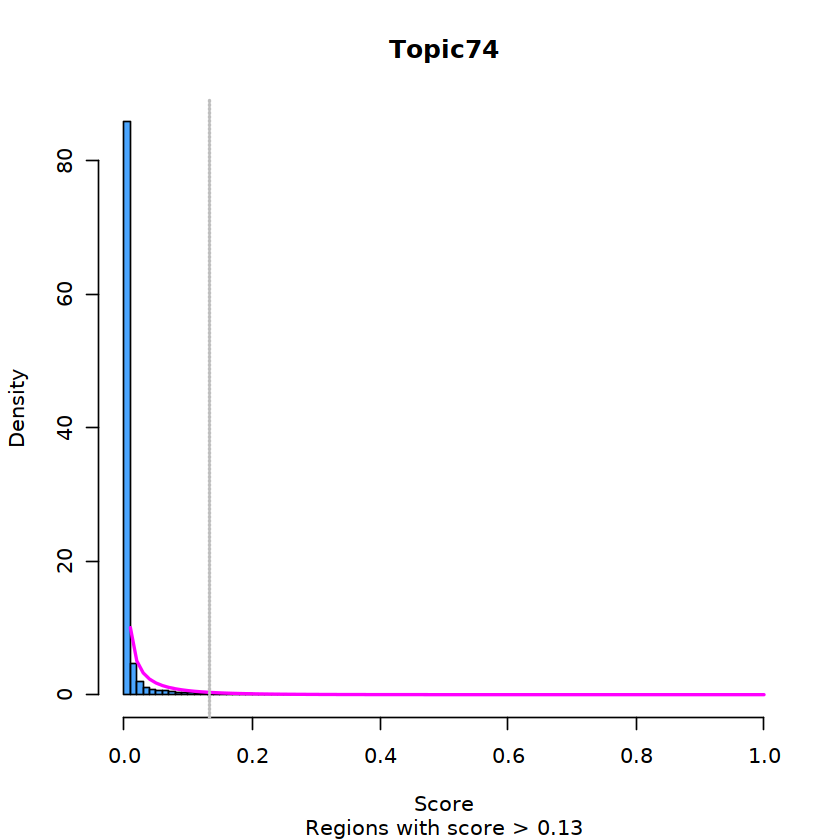

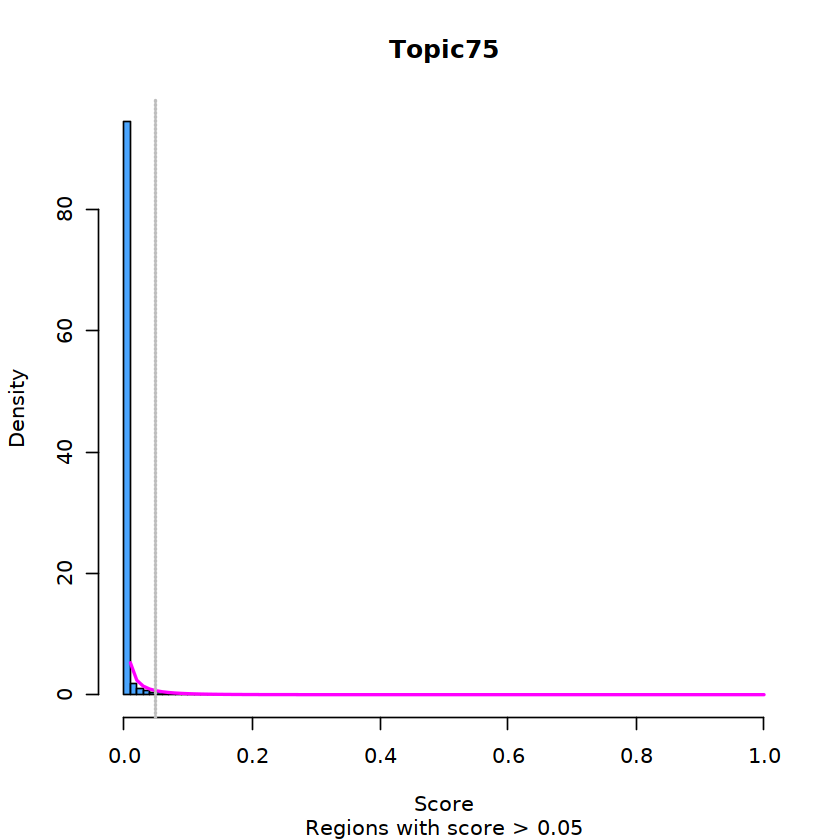

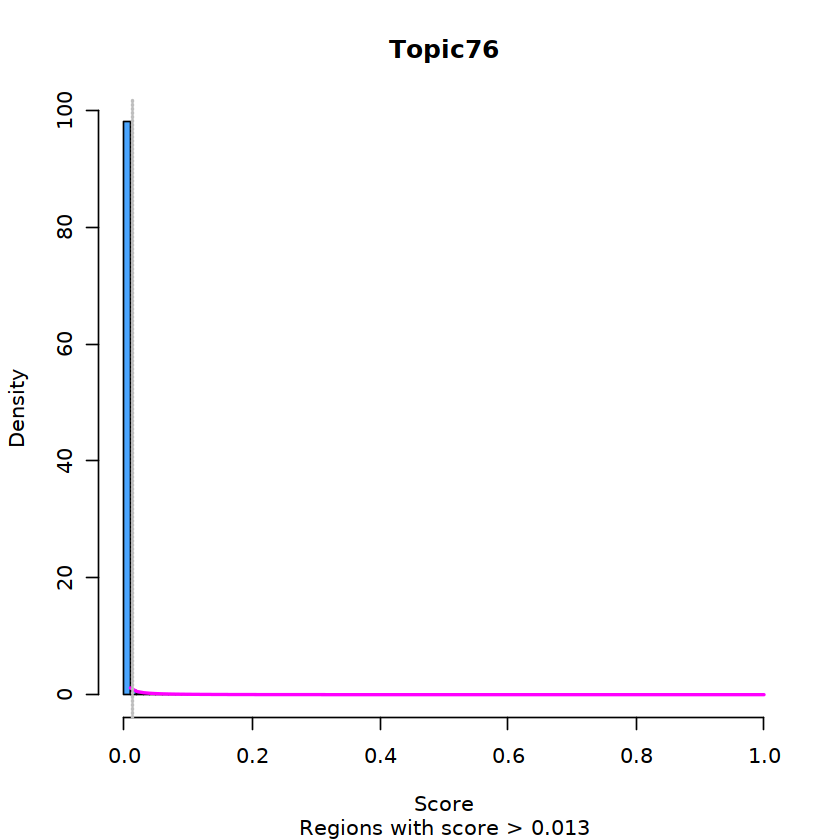

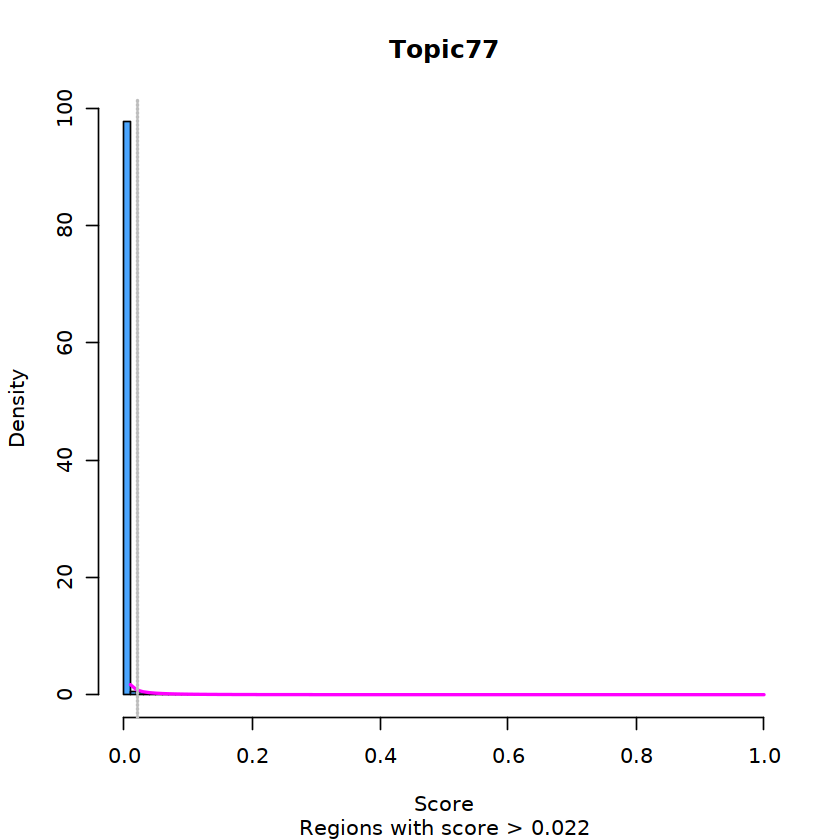

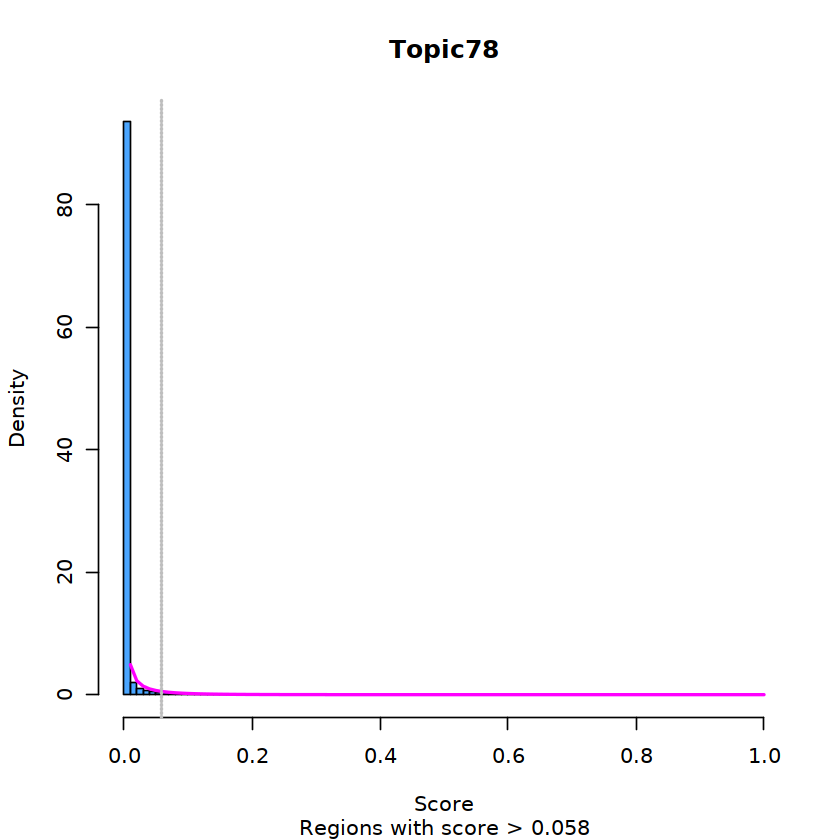

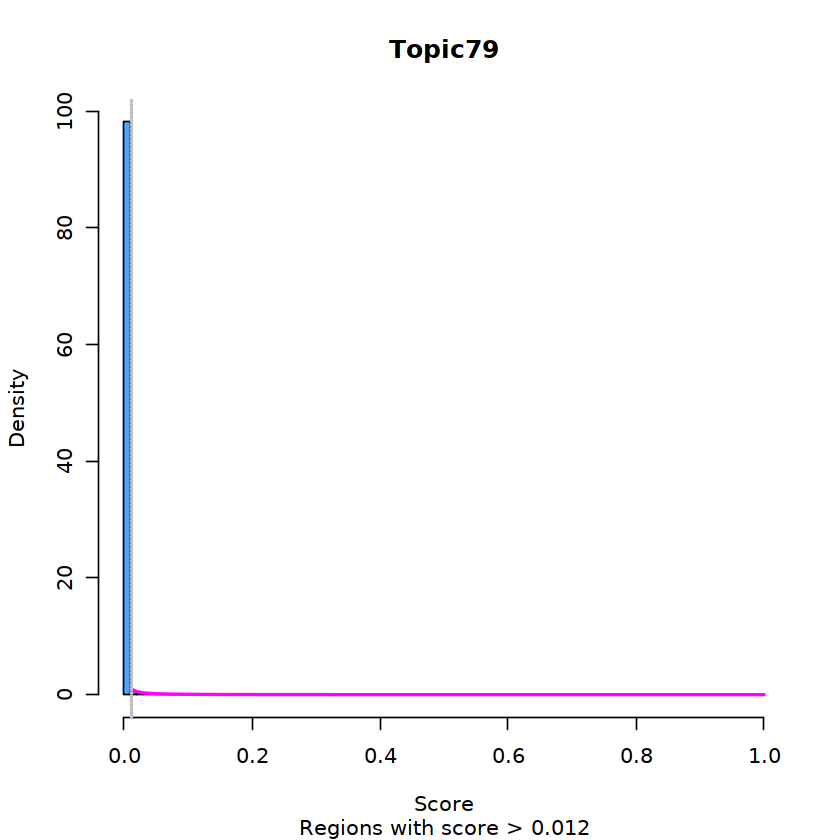

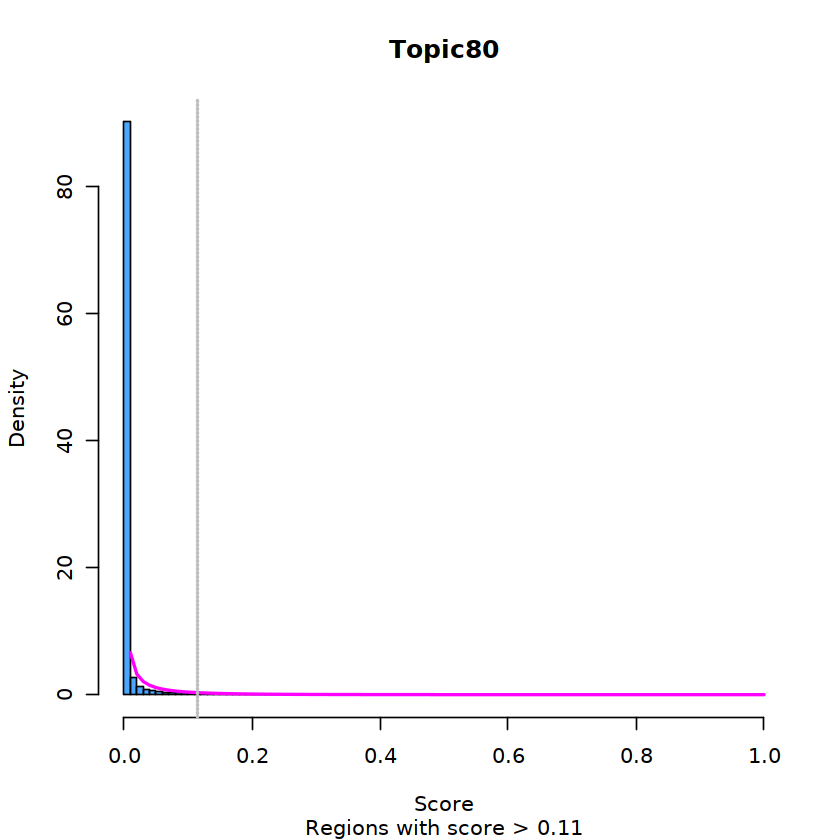

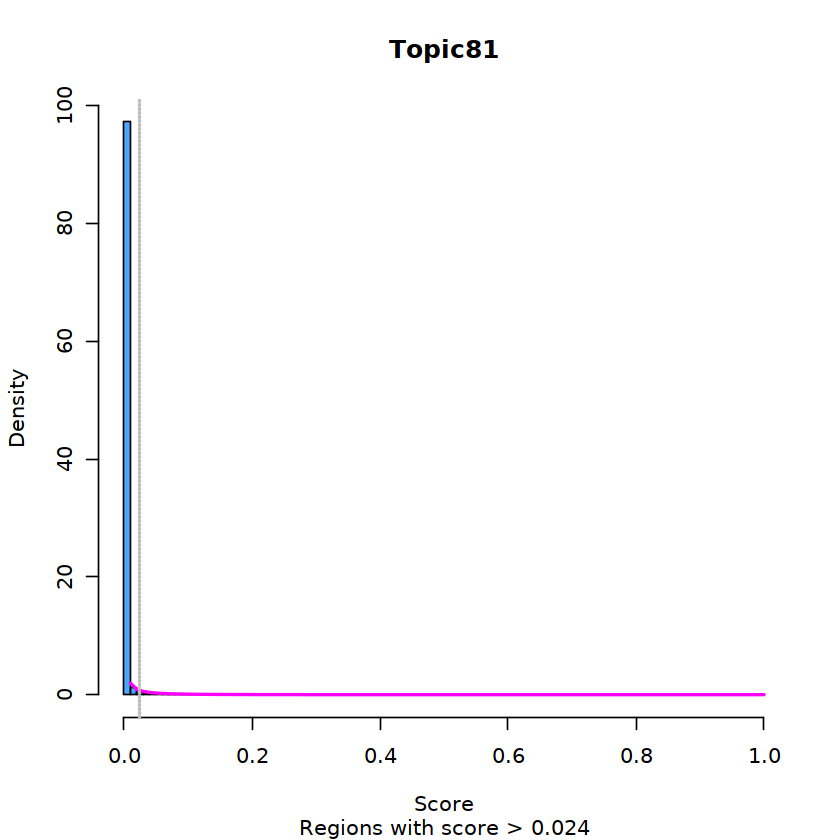

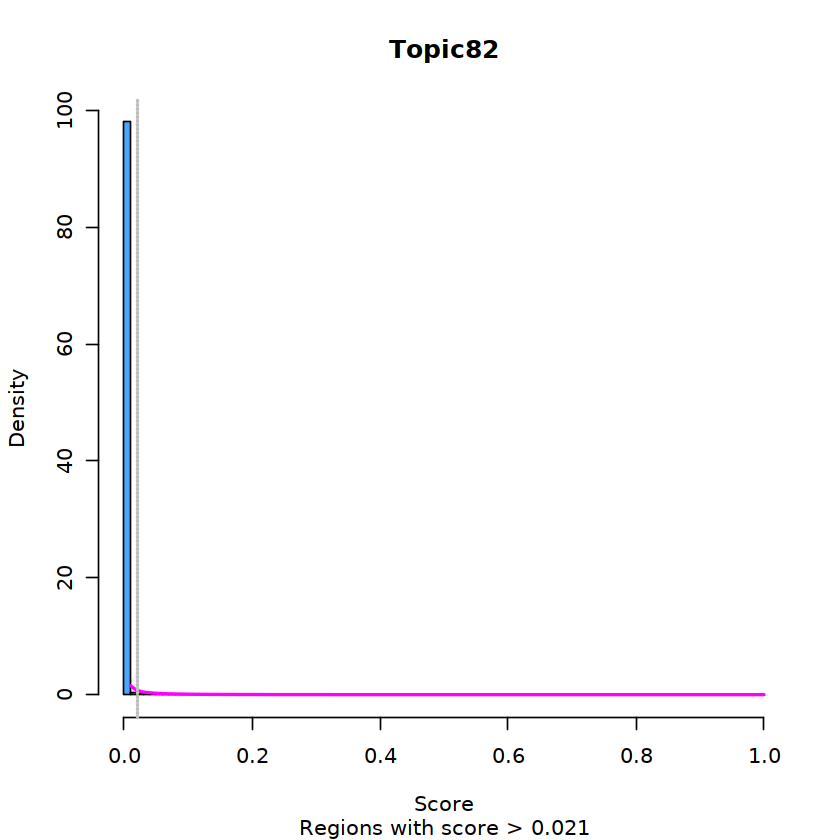

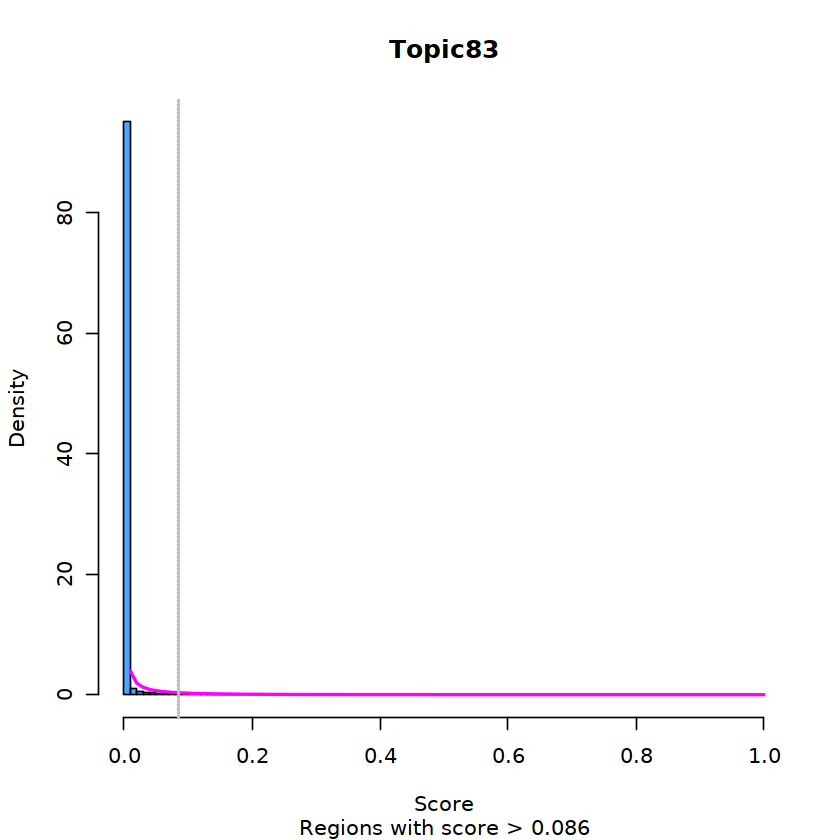

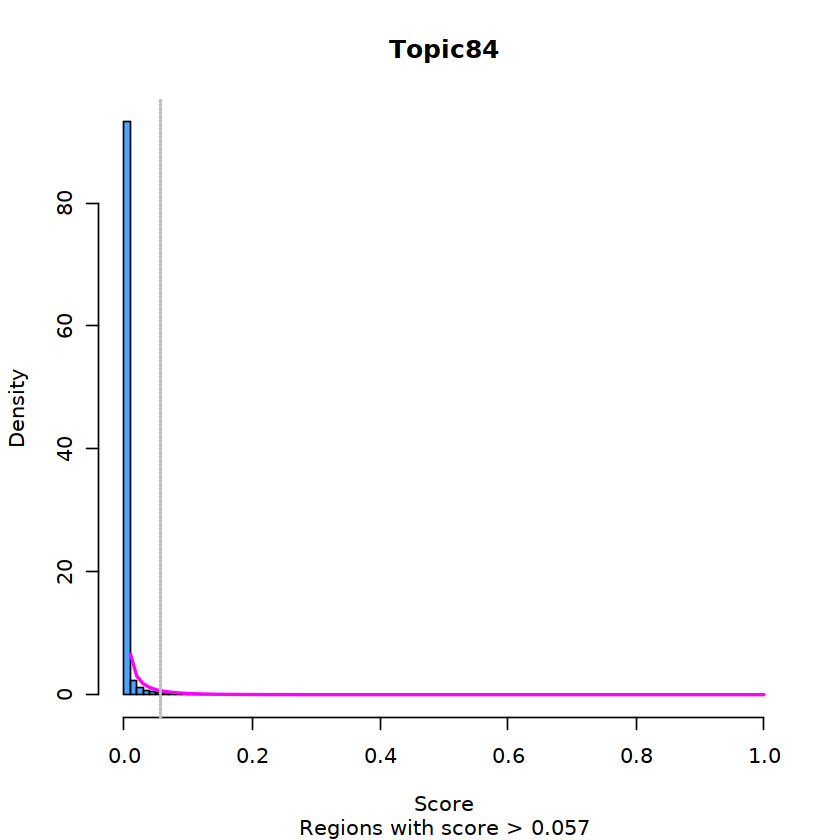

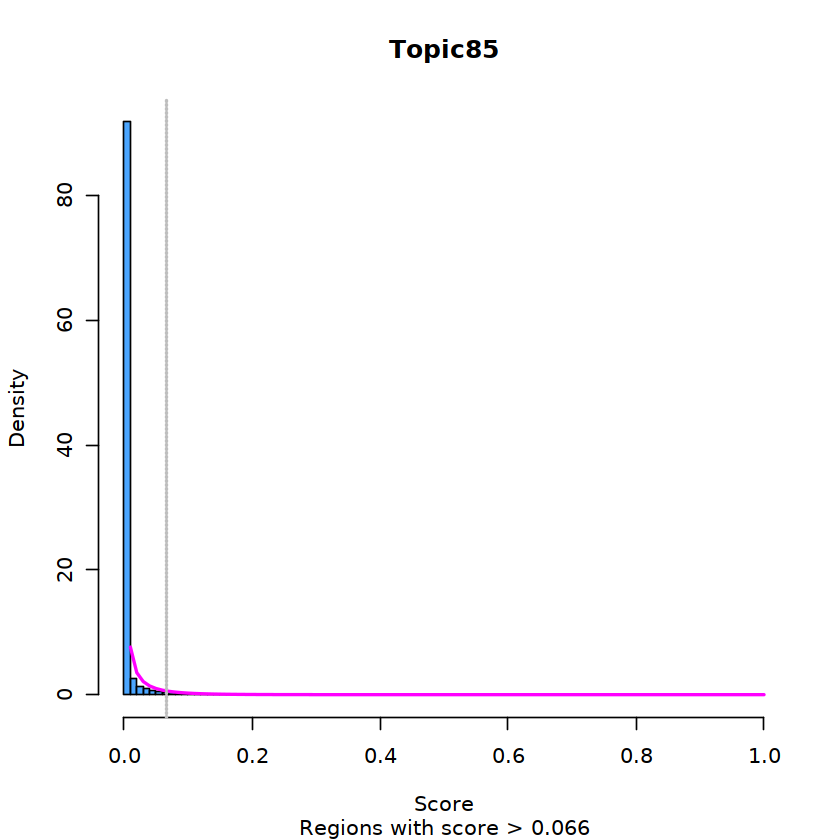

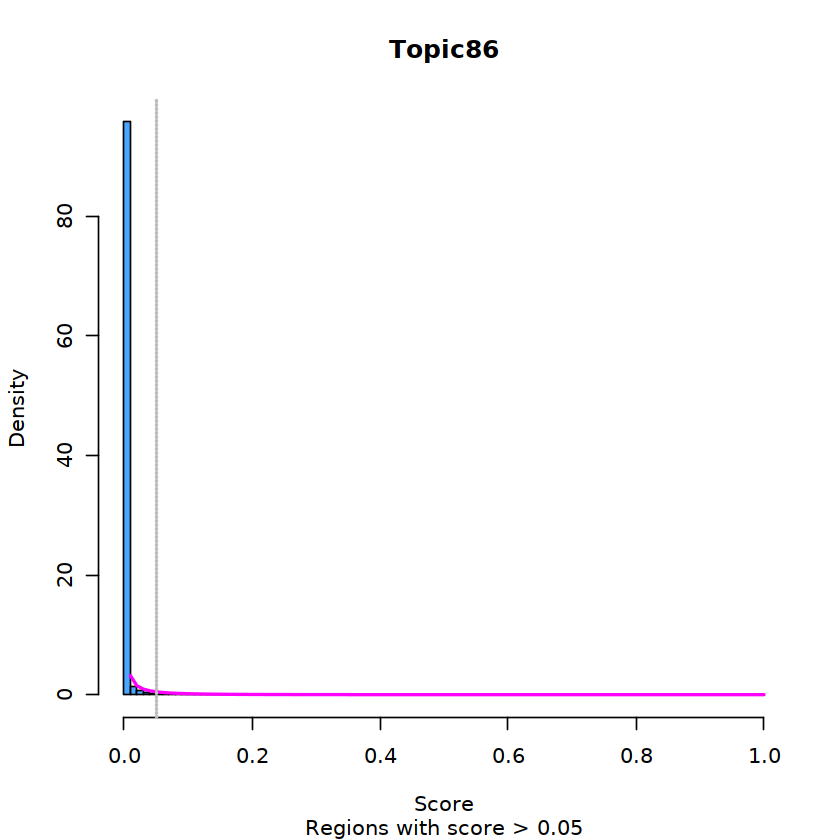

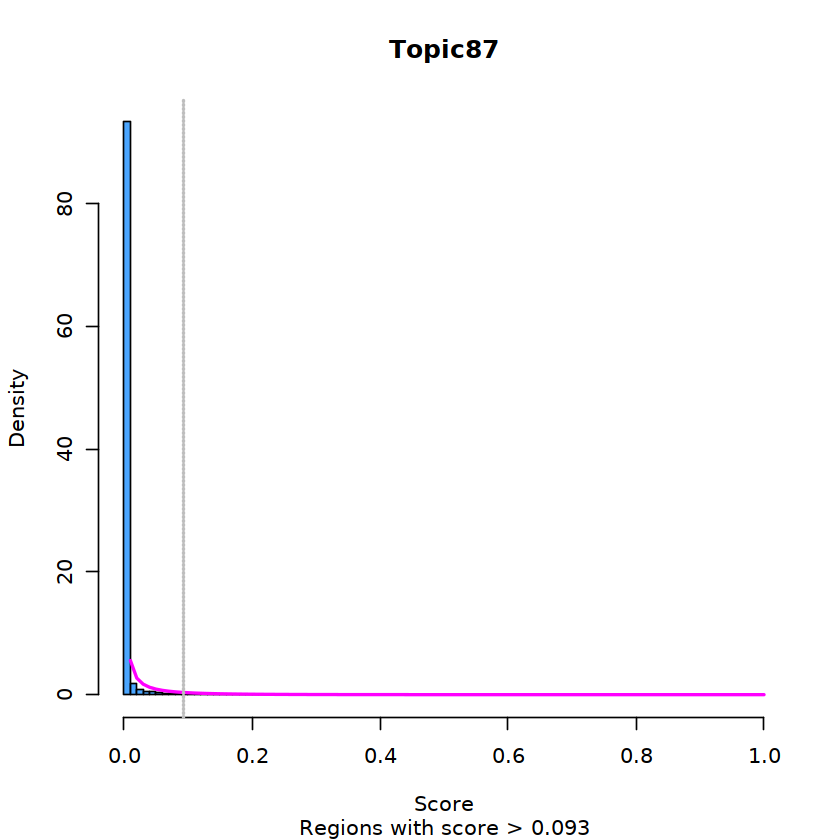

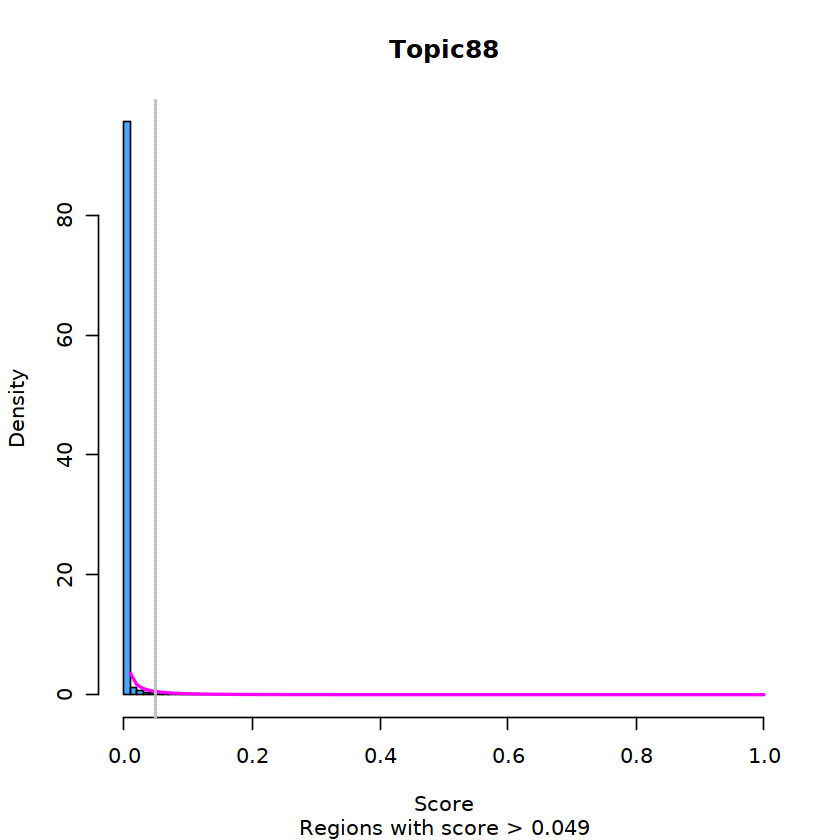

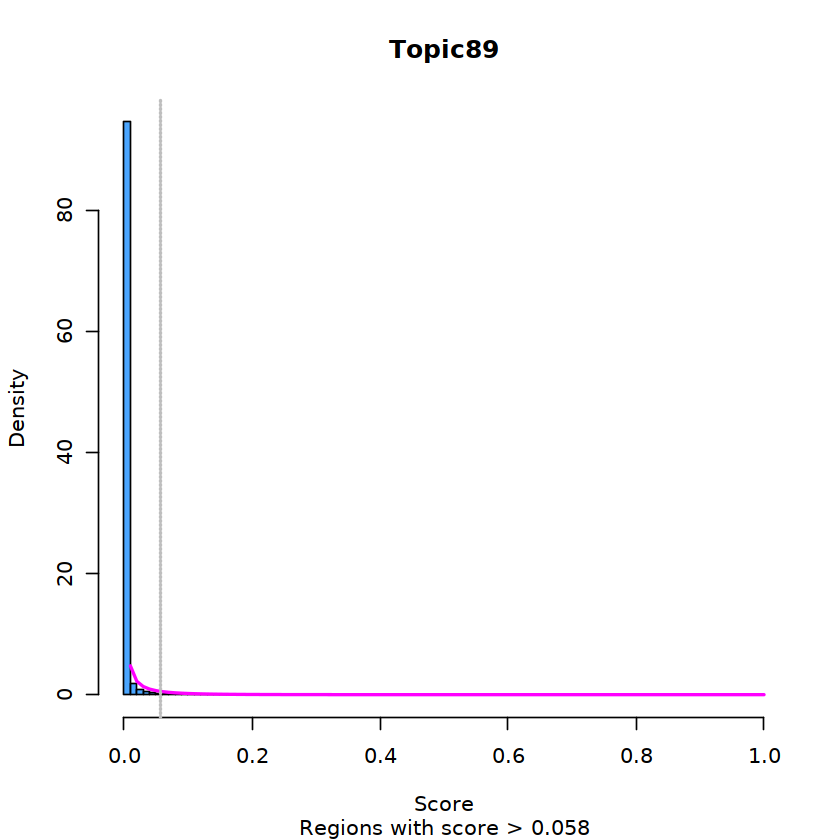

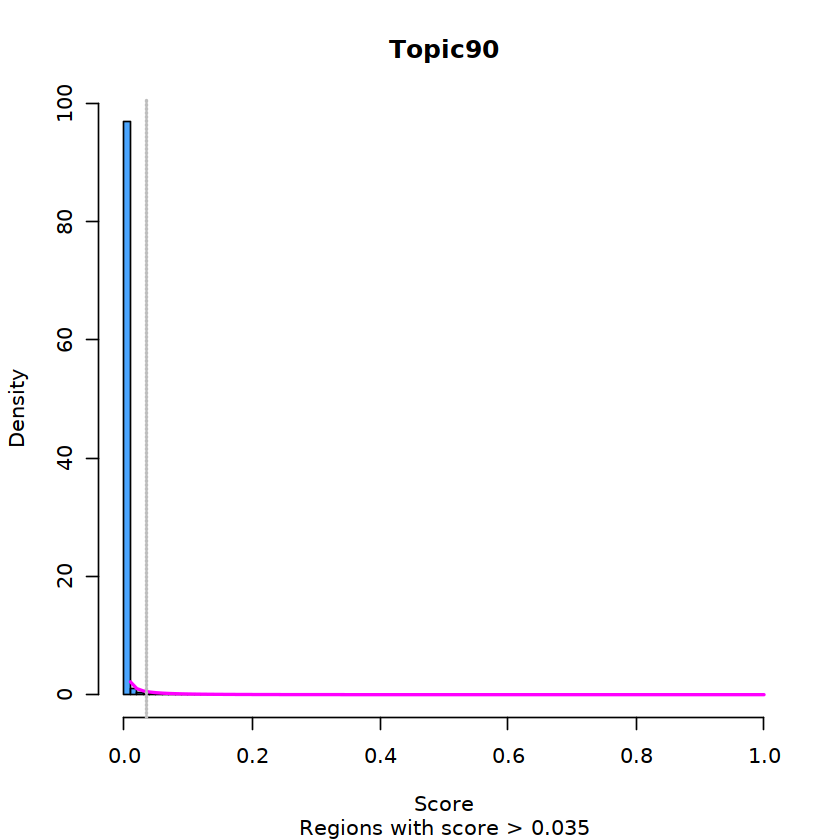

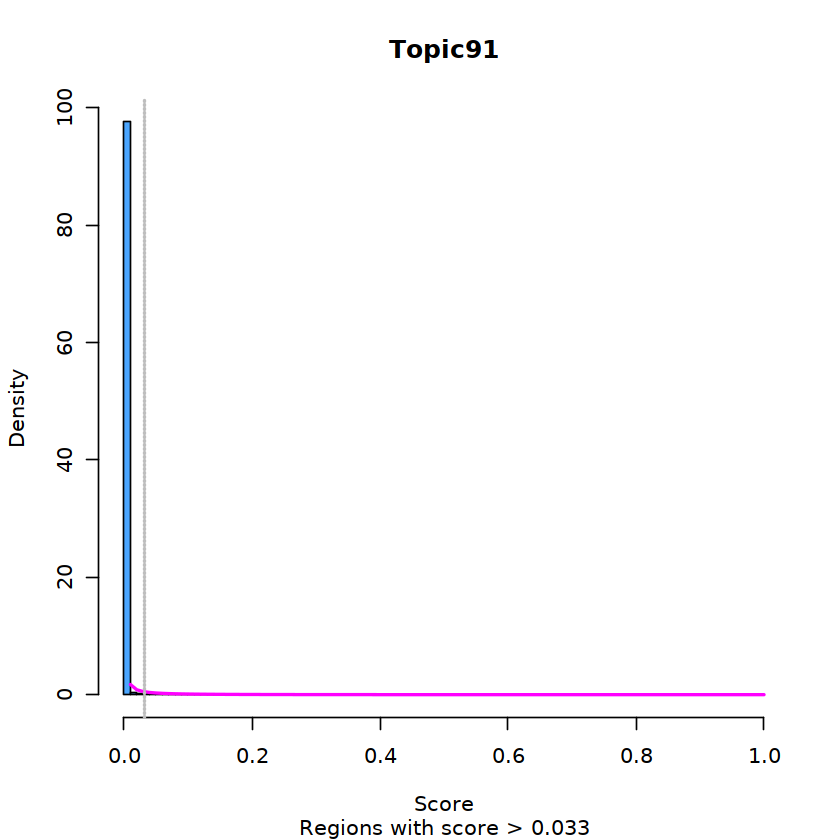

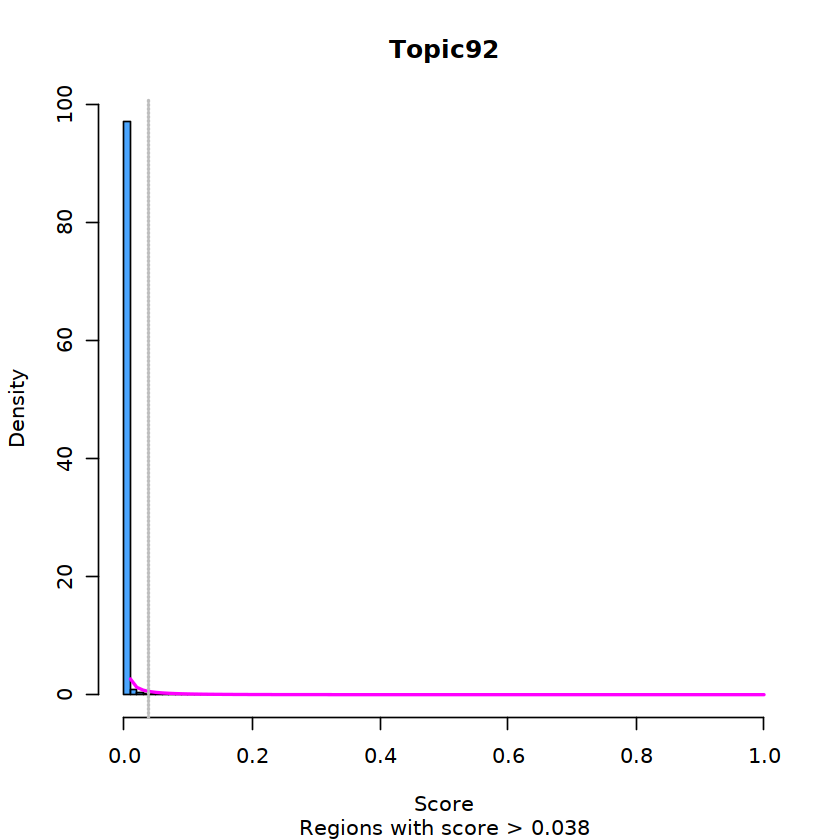

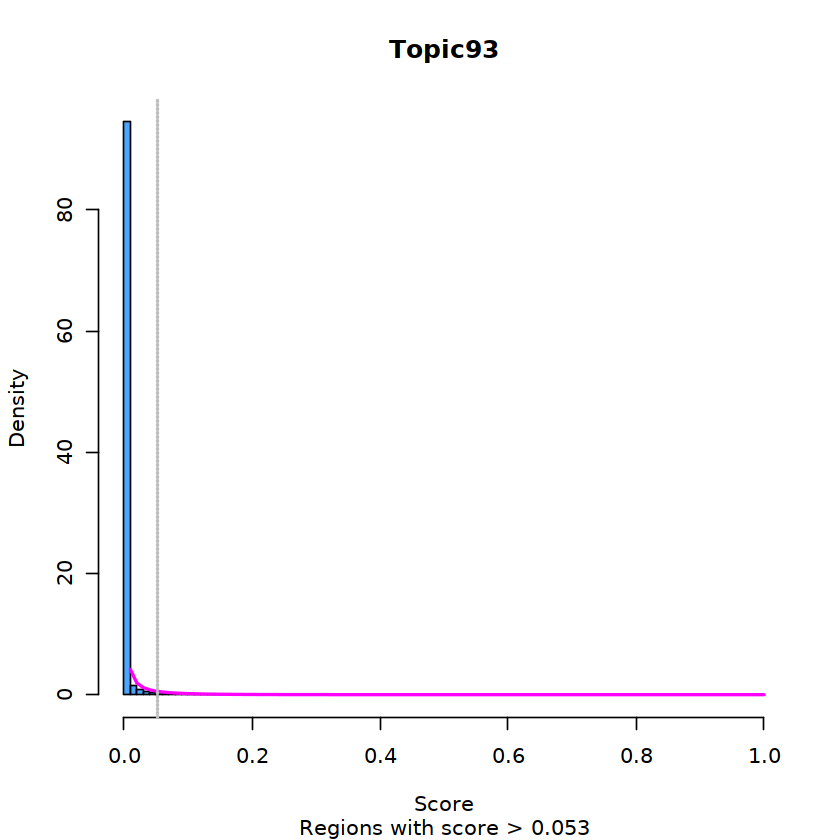

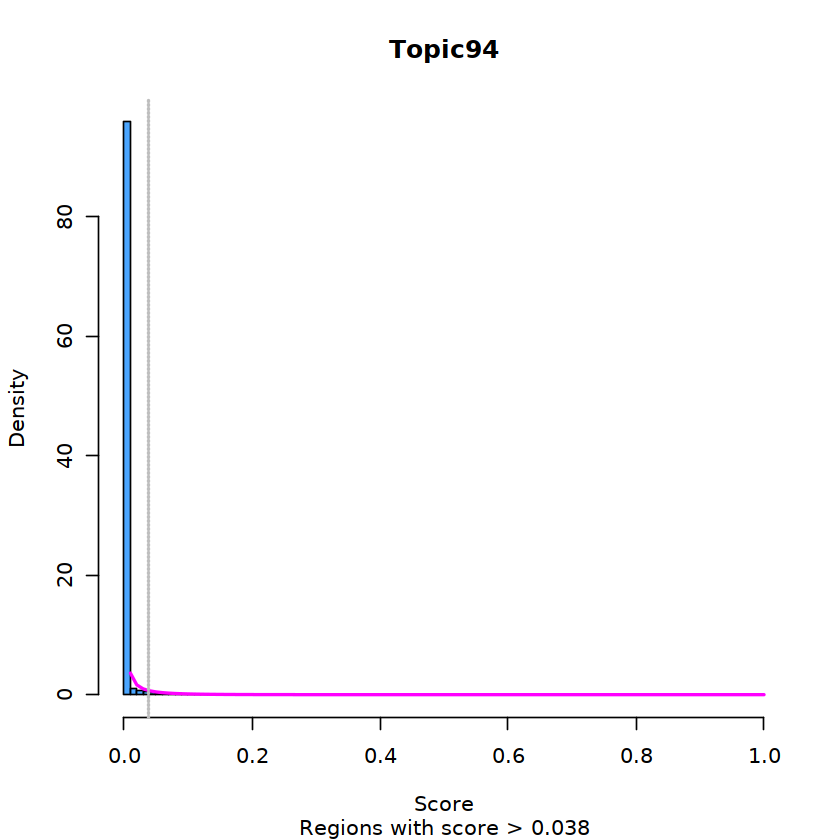

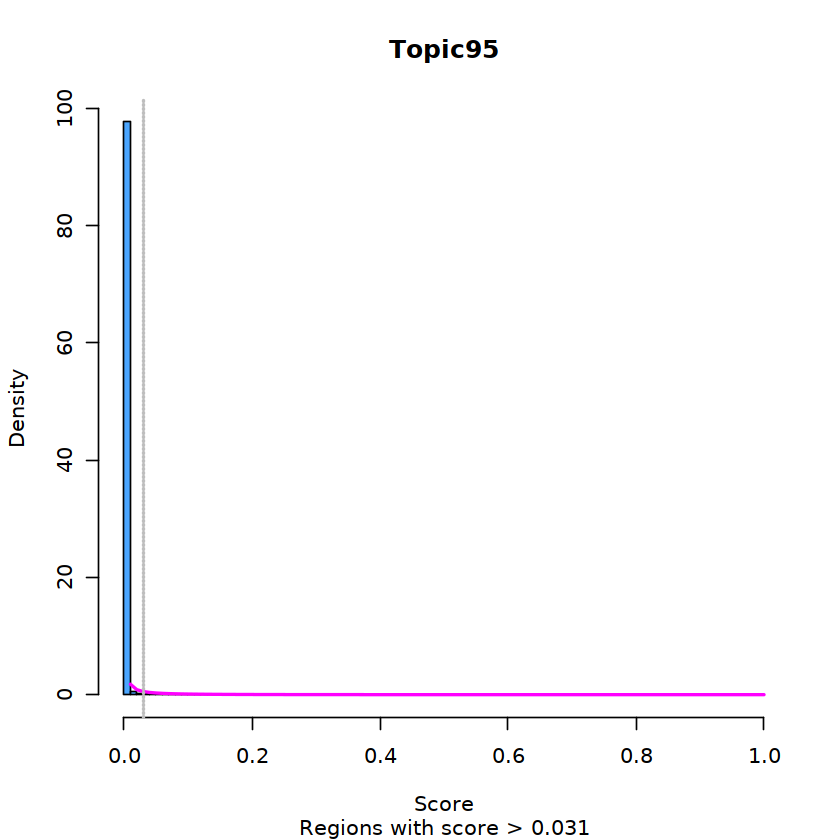

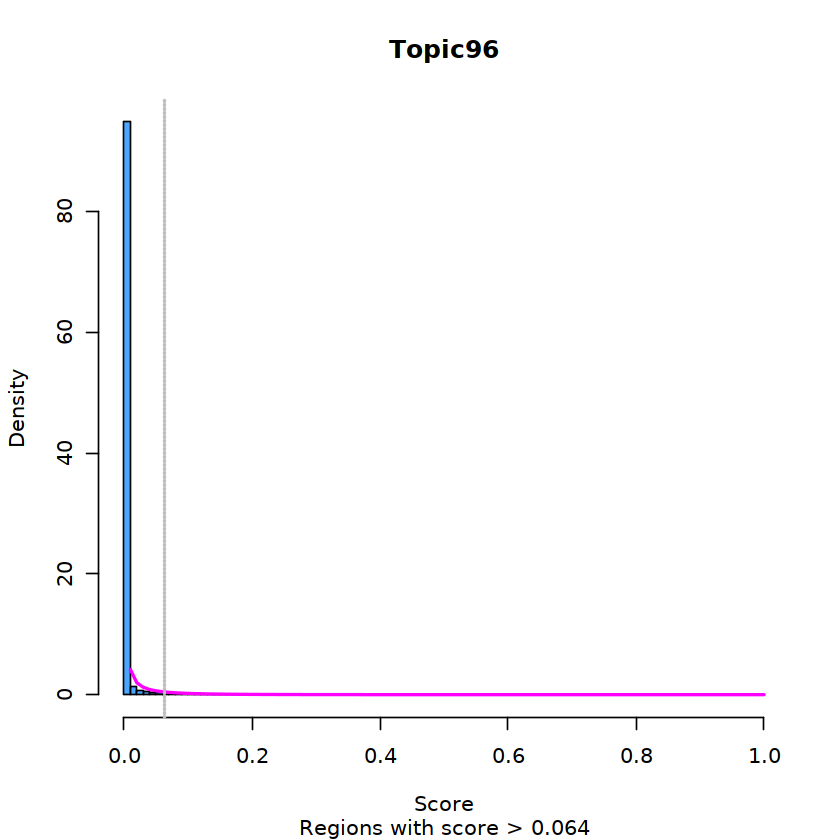

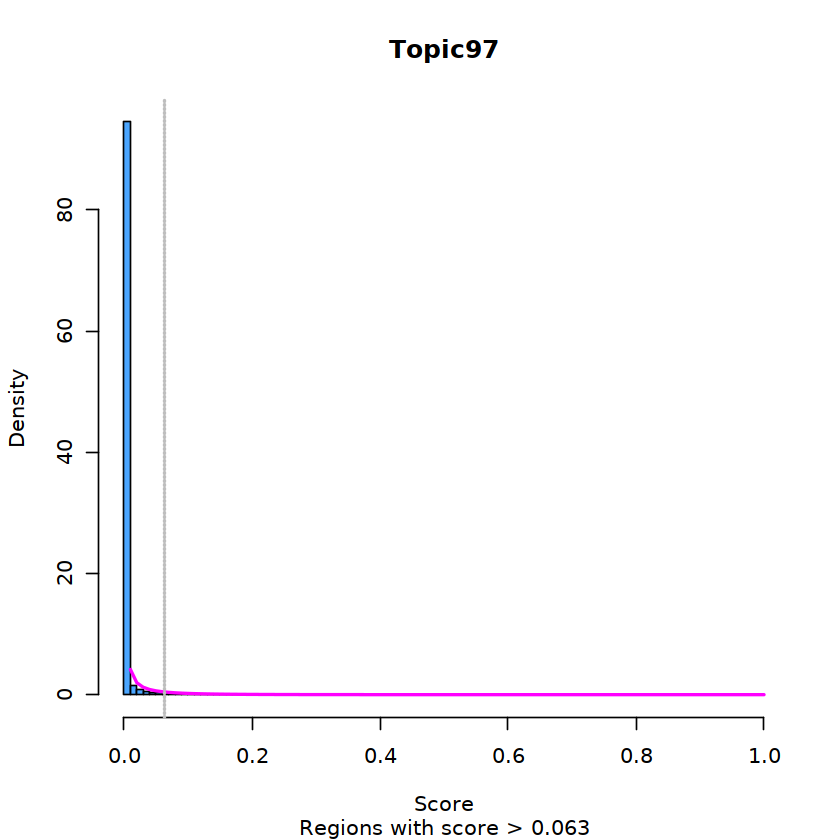

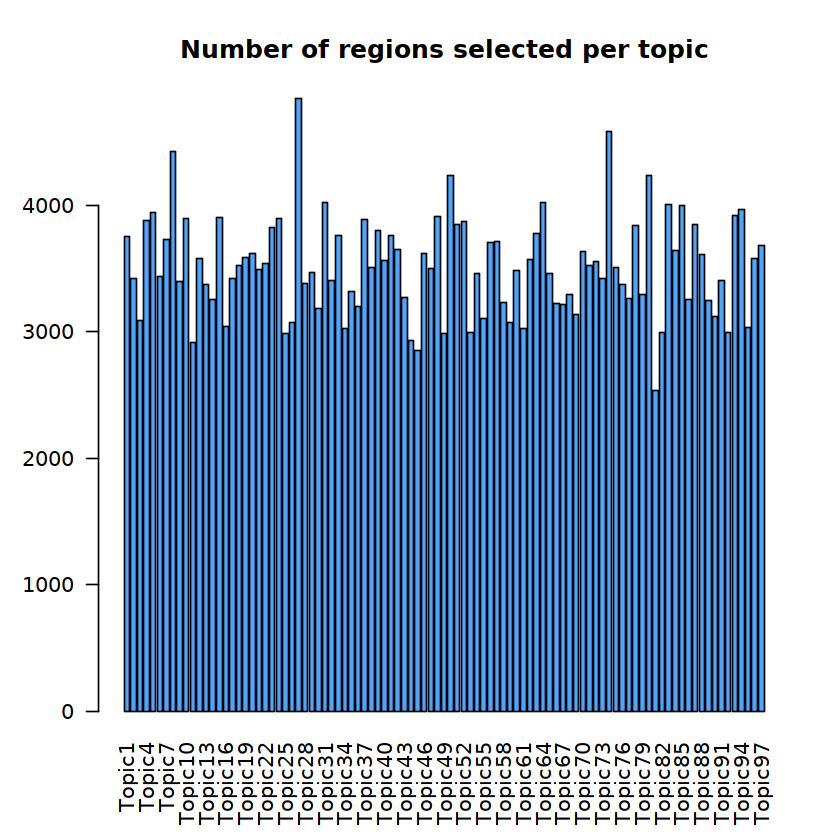

In [24]:
cisTopicObject <- binarizecisTopics(cisTopicObject, thrP=0.975, plot=TRUE)

In [25]:
date()
cisTopicObject <- GREAT(cisTopicObject, genome='hg38', fold_enrichment=2, geneHits=1, sign=0.05, request_interval=10)
date()

[1] "Thu Oct 13 14:51:39 2022"

Loading required package: rGREAT


------------------
Note: On Aug 19 2019 GREAT released version 4 where it supports `hg38`
genome and removes some ontologies such pathways. `submitGreatJob()`
still takes `hg19` as default. `hg38` can be specified by the `species
= 'hg38'` argument. To use the older versions such as 3.0.0, specify as
`submitGreatJob(..., version = '3.0.0')`.
------------------

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/6554

Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-5ccv4m.d/GOMolecularFunction.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rNf1BL.d/GOMolecularFunction.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rNf1BL.d/GOMolecularFunction.js'


failed to download, try after 30s



  |======================================================================| 100%


Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rNf1BL.d/GOCellularComponent.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rNf1BL.d/GOCellularComponent.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-DB6QtF.d/MGIPhenoSingleKO.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-DB6QtF.d/MGIPhenoSingleKO.js'


failed to download, try after 30s



  |======================================================================| 100%
Error : Forbidden



Error : Forbidden


failed with the request, try after 1 min (1st try)



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-Lt4ivj.d/GOBiologicalProcess.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-Lt4ivj.d/GOBiologicalProcess.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = fil

Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-8T1vdc.d/GOCellularComponent.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport



Error : Forbidden



Error : Forbidden


failed with the request, try after 1 min (1st try)



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-ThJy0O.d/MGIPhenotype.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-ThJy0O.d/MGIPhenotype.js'


failed to download, try after 30s



  |======================================================================| 100%


Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-ThJy0O.d/HumanPhenotypeOntology.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-ThJy0O.d/HumanPhenotypeOntology.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/GOMolecularFunction.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/GOMolecularFunction.js'


failed to download, try after 30s



  |======================================================================| 100%


Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/MGIPhenotype.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/MGIPhenotype.js'


failed to download, try after 30s



  |======================================================================| 100%


Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/MGIPhenotype.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/MGIPhenotype.js'


failed to download, try after 30s



  |======================================================================| 100%


Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/MGIPhenoSingleKO.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-RzMPSM.d/MGIPhenoSingleKO.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-n5gerz.d/MGIPhenotype.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-n5gerz.d/MGIPhenotype.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport



Error : Forbidden



Error : Forbidden


failed with the request, try after 1 min (1st try)



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-9SAtnk.d/GOCellularComponent.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-9SAtnk.d/GOCellularComponent.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-FX101W.d/MGIPhenoSingleKO.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-FX101W.d/MGIPhenoSingleKO.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-bBl9dZ.d/MGIPhenotype.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-bBl9dZ.d/MGIPhenotype.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-PzkYWc.d/GOCellularComponent.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-PzkYWc.d/GOCellularComponent.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = fil

Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-B98RUM.d/MGIPhenotype.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rtYVar.d/EnsemblGenes.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rtYVar.d/EnsemblGenes.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-9B6U3S.d/EnsemblGenes.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-9B6U3S.d/EnsemblGenes.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-fn4IEq.d/GOBiologicalProcess.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-fn4IEq.d/GOBiologicalProcess.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-3m1Fxj.d/EnsemblGenes.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-3m1Fxj.d/EnsemblGenes.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

Warning message in download.file(url, destfile = file, quiet = TRUE):
“cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rYibjW.d/EnsemblGenes.js': HTTP status was '403 Forbidden'”


Error in download.file(url, destfile = file, quiet = TRUE) : 
  cannot open URL 'http://great.stanford.edu/public-4.0.4/cgi-bin/readJsFromFile.php?path=/scratch/great/tmp/results/20221013-public-4.0.4-rYibjW.d/EnsemblGenes.js'


failed to download, try after 30s



  |======================================================================| 100%


The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated genes for the input
regions. You can set `download_by = 'tsv'` to download the complete
table, but note only the top 500 regions can be retreived. See the
following link:

https://great-help.atlassian.net/wiki/spaces/GREAT/pages/655401/Export#Export-GlobalExport

The default enrichment tables contain no associated 

[1] "Thu Oct 13 16:07:13 2022"

## Save RDS

In [26]:
setwd(RDS_Dir)
saveRDS(cisTopicObject, file='SKT012.01.04_CisTopic_Hg38PancreasCombined_97Topics_GOAnnotation.rds')

getwd()
list.files()

[1] "/lustre1/project/stg_00041/SanKit/SKT012_Chiou_snATAC_Pancreas/RDS"

[1] "SKT012.01.01_CisTopic_Hg38PancreasCombined.rds"                      
[2] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA_20052022.rds"     
[3] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA.rds"              
[4] "SKT012.01.03_CisTopic_Hg38PancreasCombined_97Topics_Embeddings.rds"  
[5] "SKT012.01.03_CisTopic_Hg38PancreasCombined_Embeddings.rds"           
[6] "SKT012.01.04_CisTopic_Hg38PancreasCombined_97Topics_GOAnnotation.rds"

## Load RDS

In [123]:
setwd(RDS_Dir)
getwd()
list.files()

#Load Data
cisTopicObject <- readRDS('SKT012.01.04_CisTopic_Hg38PancreasCombined_97Topics_GOAnnotation.rds')

[1] "/lustre1/project/stg_00041/SanKit/SKT012_Chiou_snATAC_Pancreas/RDS"

[1] "mm10Tomm9.over.chain"                                                           
 [2] "SKT012.01.01_CisTopic_Hg38PancreasCombined.rds"                                 
 [3] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA_20052022.rds"                
 [4] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA.rds"                         
 [5] "SKT012.01.03_CisTopic_Hg38PancreasCombined_97Topics_Embeddings.rds"             
 [6] "SKT012.01.03_CisTopic_Hg38PancreasCombined_Embeddings.rds"                      
 [7] "SKT012.01.04_CisTopic_Hg38PancreasCombined_97Topics_GOAnnotation.rds"           
 [8] "SKT012.01.05_CisTopic_Hg38PancreasCombined_97Topics_cisTargetCoordinatesCtx.rds"
 [9] "SKT012.01.06_CisTopic_Hg38PancreasCombined_97Topics_MotifEnrichment.rds"        
[10] "SKT012.01.07_CisTopic_Hg38PancreasCombined_97Topics_ArchR.rds"

## Plot GO Biology annotation for every Topic

In [37]:
setdiff(1:10, c(1,2,3,5, 10))

[1] 4 6 7 8 9

In [64]:
pdf(file = paste0(FIG_Dir,'CisTopic-Hg38PancreasCombined-Harmony-OntologyPlot_20221028.pdf'),  
    width = 10, # The width of the plot in inches
    height = 10 # The height of the plot in inches
  # units = "cm",
   # res = 300) 
)

# display only the top annotation: Define the number
TopList <- 5

for (i in setdiff(1:97, c(13, 32,44,45, 53,89, 90))) {
    ontologyDotPlot(cisTopicObject, top=TopList, topics=c(i), var.y='name', order.by='Binom_Adjp_BH', col.low = "#fde725", col.mid = "#21918c",col.high = "#440154")
}


dev.off()

png 
  2

## Extract GO Biological Process annotation for each Topic

In [102]:
cisTopicObject@binarized.rGREAT[[14]]

$`GO Molecular Function`
           ID                                   name Binom_Genome_Fraction
6  GO:0051082               unfolded protein binding           0.004851790
10 GO:0003743 translation initiation factor activity           0.002985569
20 GO:0030515                         snoRNA binding           0.001575844
28 GO:0031593                  polyubiquitin binding           0.002705994
   Binom_Expected Binom_Observed_Region_Hits Binom_Fold_Enrichment
6       15.792580                         38              2.406194
10       9.718027                         26              2.675440
20       5.129374                         16              3.119289
28       8.808012                         21              2.384193
   Binom_Region_Set_Coverage Binom_Raw_PValue Binom_Adjp_BH Hyper_Total_Genes
6                0.011674350     1.420124e-06  0.0009992939               106
10               0.007987711     1.054416e-05  0.0044517444                51
20               0.004915515     9.061837e-05  0.0191295379                30
28               0.006451613     3.265719e-04  0.0462560068                45
   Hyper_Expected Hyper_Observed_Gene_Hits Hyper_Fold_Enrichment
6       20.181610                       34              1.684702
10       9.710018                       20              2.059729
20       5.711775                       14              2.451077
28       8.567663                       18              2.100923
   Hyper_Gene_Set_Coverage Hyper_Term_Gene_Coverage Hyper_Raw_PValue
6              0.009510490                0.3207547     0.0009236994
10             0.005594406                0.3921569     0.0006433276
20             0.003916084                0.4666667     0.0005315338
28             0.005034965                0.4000000     0.0008991300
   Hyper_Adjp_BH
6     0.04856070
10    0.03880184
20    0.03506462
28    0.04805224

$`GO Biological Process`
            ID
5   GO:0035966
6   GO:0006364
10  GO:0016072
21  GO:0006413
22  GO:0000956
25  GO:0006986
37  GO:0006354
38  GO:0016073
43  GO:0043618
46  GO:0006612
47  GO:0035967
53  GO:0044033
54  GO:0045943
59  GO:0043620
60  GO:0006368
63  GO:0045047
70  GO:0006613
71  GO:0006283
72  GO:0051865
80  GO:0070972
81  GO:0030968
85  GO:0043619
88  GO:0043558
93  GO:0042795
98  GO:0000288
116 GO:0042398
127 GO:1902850
130 GO:0001522
135 GO:0043555
157 GO:1901030
159 GO:0006458
182 GO:0006750
189 GO:1904874
203 GO:0019184
258 GO:0061077
                                                                                                            name
5                                                                    response to topologically incorrect protein
6                                                                                                rRNA processing
10                                                                                        rRNA metabolic process
21                                                                                      translational initiation
22                                                                    nuclear-transcribed mRNA catabolic process
25                                                                                  response to unfolded protein
37                                                                       DNA-templated transcription, elongation
38                                                                                       snRNA metabolic process
43                             regulation of transcription from RNA polymerase II promoter in response to stress
46                                                                                 protein targeting to membrane
47                                                          cellular response to topologically incorrect protein
53                                                                              multi-organism metabolic process
54                                           positive regulation of transcription fro

In [109]:
TopList <- 5 # Define the number of annotation terms per topic
Datalist = list() # make a list
TopicNumber = 97


# Function
for (i in setdiff(1:TopicNumber, c(13, 32,44,45, 53,89, 90))) {       
Data <-     # extract the desired data
cisTopicObject@binarized.rGREAT[[i]]$`GO Biological Process` %>%
    arrange(Binom_Adjp_BH) %>%
    select(name) %>% head %>% pull
Datalist[[i]]     <- Data # add data to your list
}

DataDf <-
    Datalist %>% as.data.frame.character %>% 
        apply(2,as.character) %>% 
        as.data.frame %>%
        `colnames<-`('GO Biological Process') %>%
        `rownames<-`(paste0('Topic', 1:TopicNumber))

DataDf %>% head


GO Biological Process                                                                                                                                                                                                                                                                                                                                         
Topic1 c("regulation of intrinsic apoptotic signaling pathway", "negative regulation of apoptotic signaling pathway", "cellular response to insulin stimulus", "negative regulation of intrinsic apoptotic signaling pathway", "response to insulin", "pyridine-containing compound biosynthetic process")                                                           
Topic2 c("regulation of transcription from RNA polymerase II promoter in response to stress", "snRNA metabolic process", "snRNA transcription from RNA polymerase II promoter", "regulation of DNA-templated transcription in response to stress", "regulation of transcription from RNA polymerase II promoter in response to hypoxia", "'de novo' protein folding")
Topic3 c("mitochondrial transport", "regulation of intrinsic apoptotic signaling pathway", "negative regulation of intrinsic apoptotic signaling pathway", "mitochondrial membrane organization", "multi-organism metabolic process", "regulation of mitochondrial membrane permeability")                                                                           
Topic4 c("response to insulin", "cellular response to insulin stimulus", "response to topologically incorrect protein", "multi-organism metabolic process", "regulation of cholesterol metabolic process", "regulation of cellular response to heat")                                                                                                                
Topic5 c("regulation of cardiac conduction", "endocrine pancreas development", "regulation of protein kinase C signaling", "regulation of p38MAPK cascade", "inositol phosphate-mediated signaling", "cerebral cortex regionalization")                                                                                                                              
Topic6 c("cellular response to oxygen levels", "cellular response to hypoxia", "cellular response to decreased oxygen levels", "response to oxygen levels", "response to decreased oxygen levels", "response to hypoxia")

In [110]:
write.csv(DataDf,paste0(DATA_Dir,'CisTopic-Hg38PancreasCombined-Harmony-GOBioProcess_1colPerTopic_20221029.csv'), row.names = FALSE)

## Multiple GO Biological processes annotation with mutliple rows for specific topics

In [218]:
# Arrange data by Binomial adjusted P-value


TopList <- 5 # Define the number of annotation terms per topic
Datalist = list() # make a list
TopicNumber = 84


# Function
for (i in setdiff(1:TopicNumber, c(13, 32,44,45, 53,89, 90))) {       
Data <-     # extract the desired data
cisTopicObject@binarized.rGREAT[[i]][[2]] %>%
    arrange(Binom_Adjp_BH) %>%
    select(name) %>%
    add_column(Topic=paste0('Topic',i)) %>%
    head(TopList)
Datalist[[i]]     <- Data # add data to your list    
}

big_data = dplyr::bind_rows(Datalist) # combine the data in your list 
big_data %>% head

name                             Topic 
1 vesicle fusion                   Topic1
2 organelle membrane fusion        Topic1
3 organelle fusion                 Topic1
4 membrane fusion                  Topic1
5 calcium ion regulated exocytosis Topic1
6 regulation of insulin secretion  Topic2

# Type of Regions

## Load RDS

In [9]:
setwd(RDS_Dir)
getwd()
list.files()

#Load Data
cisTopicObject <- readRDS('SKT012.01.04_CisTopic_Hg38PancreasCombined_97Topics_GOAnnotation.rds')

[1] "/lustre1/project/stg_00041/SanKit/SKT012_Chiou_snATAC_Pancreas/RDS"

[1] "CountMatrixHg38Pancreas.mtx"                                                    
 [2] "mm10Tomm9.over.chain"                                                           
 [3] "SKT012.01.01_CisTopic_Hg38PancreasCombined.rds"                                 
 [4] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA_20052022.rds"                
 [5] "SKT012.01.02_CisTopic_Hg38PancreasCombined_WarpLDA.rds"                         
 [6] "SKT012.01.03_CisTopic_Hg38PancreasCombined_97Topics_Embeddings.rds"             
 [7] "SKT012.01.03_CisTopic_Hg38PancreasCombined_Embeddings.rds"                      
 [8] "SKT012.01.04_CisTopic_Hg38PancreasCombined_97Topics_GOAnnotation.rds"           
 [9] "SKT012.01.05_CisTopic_Hg38PancreasCombined_97Topics_cisTargetCoordinatesCtx.rds"
[10] "SKT012.01.06_CisTopic_Hg38PancreasCombined_97Topics_MotifEnrichment.rds"        
[11] "SKT012.01.07_CisTopic_Hg38PancreasCombined_97Topics_ArchR.rds"

In [22]:
# Extract region annotation
Data <-  cisTopicObject@region.data %>% select(seqnames, start, end, annotation, SYMBOL, GENENAME) %>% rownames_to_column(var = "id") %>% select(-id, id) 
Data$region <- paste(1:nrow(Data))
Data %>% head
write.table(Data,paste0(DATA_Dir,'CisTopic-Hg38Pancreas-RegionAnnotation_20230228.bed'), quote = FALSE, row.names = FALSE, col.names = FALSE, sep = "\t")

Data <-  cisTopicObject@region.data %>% select(seqnames, start, end)
Data$region <- paste(1:nrow(Data))
Data %>% head
write.table(Data,paste0(DATA_Dir,'CisTopic-Hg38Pancreas-Region_20230228.bed'), quote = FALSE, row.names = FALSE, col.names = FALSE, sep = "\t")



seqnames start  end    annotation       SYMBOL   
1 chr1     804700 805200 Exon             FAM87B   
2 chr1     817126 817626 Promoter (<=1kb) FAM87B   
3 chr1     826566 827066 Promoter (<=1kb) LINC01128
4 chr1     827306 827806 Promoter (<=1kb) LINC00115
5 chr1     830685 831185 Promoter (<=1kb) LINC01128
6 chr1     831558 832058 Promoter (<=1kb) LINC01128
  GENENAME                                    id                 region
1 family with sequence similarity 87 member B chr1:804700-805200 1     
2 family with sequence similarity 87 member B chr1:817126-817626 2     
3 long intergenic non-protein coding RNA 1128 chr1:826566-827066 3     
4 long intergenic non-protein coding RNA 115  chr1:827306-827806 4     
5 long intergenic non-protein coding RNA 1128 chr1:830685-831185 5     
6 long intergenic non-protein coding RNA 1128 chr1:831558-832058 6

seqnames start  end    region
chr1:804700-805200 chr1     804700 805200 1     
chr1:817126-817626 chr1     817126 817626 2     
chr1:826566-827066 chr1     826566 827066 3     
chr1:827306-827806 chr1     827306 827806 4     
chr1:830685-831185 chr1     830685 831185 5     
chr1:831558-832058 chr1     831558 832058 6

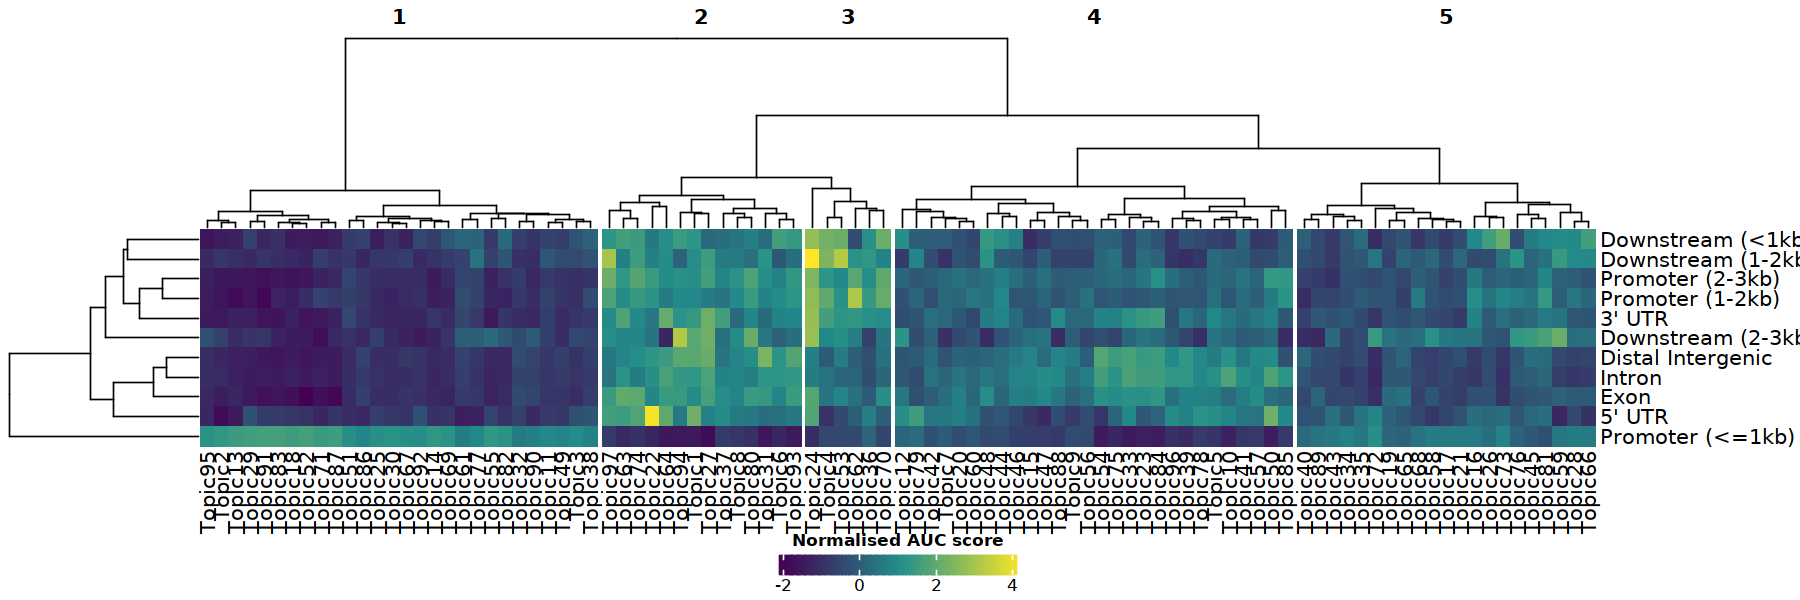

In [18]:
fig(15,5)


signaturesHeatmap(cisTopicObject,
                  selected.signatures = 'annotation',
                  nCores = 10,
                  col.low = "#440154",
                  col.mid = "#21918c",
                  col.high = "#fde725",
                  scale = TRUE,
                  transposeHeatmap = FALSE,
                  column_split = 5,  
                  column_dend_height = unit(4, "cm"), 
                  row_dend_width = unit(4, "cm")

)

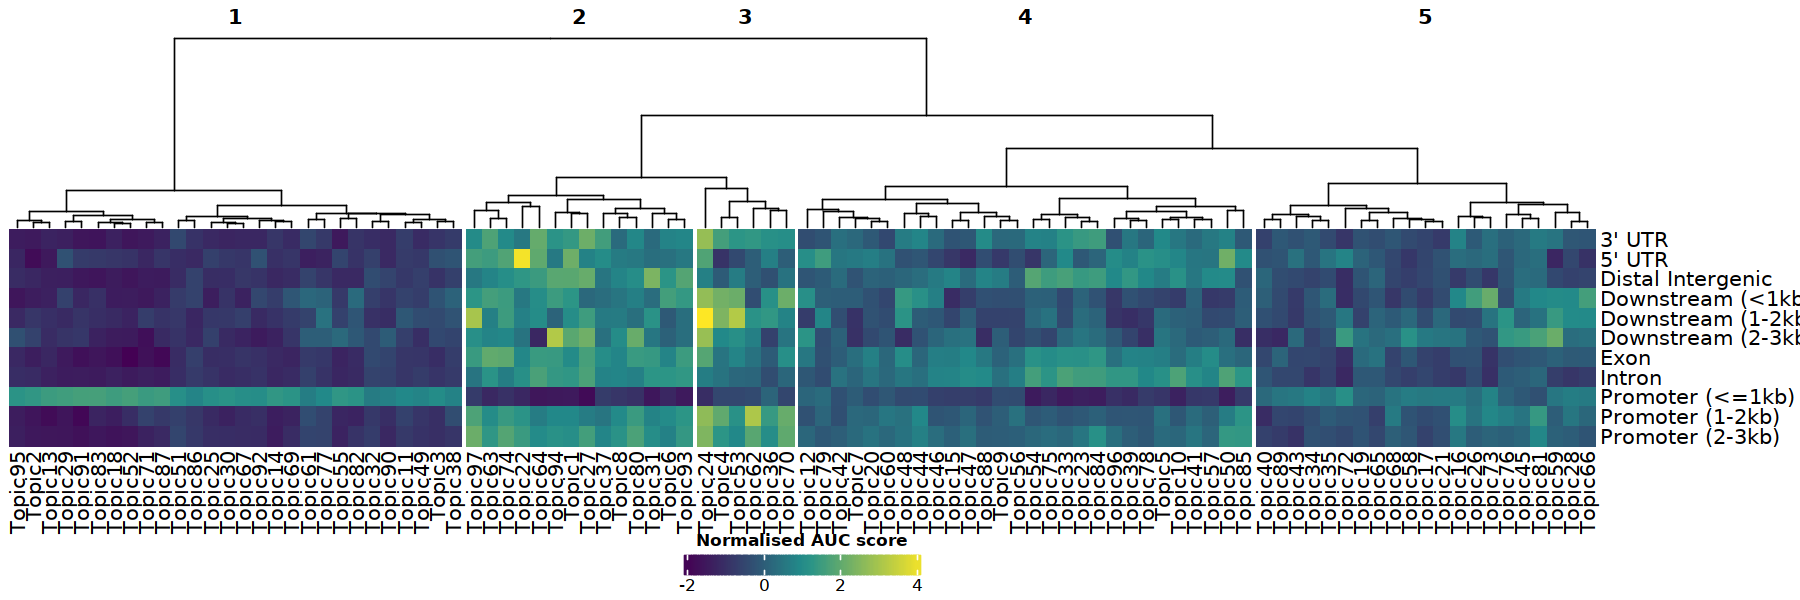

In [15]:
fig(15,5)
signaturesHeatmap(cisTopicObject,
                  selected.signatures = 'annotation',
                  nCores = 10,
                  col.low = "#440154",
                  col.mid = "#21918c",
                  col.high = "#fde725",
                  column_split = 5,  
                  column_dend_height = unit(4, "cm"), 
                  cluster_rows = FALSE,
                  #cluster_columns = FALSE,
                  #row_dend_width = unit(4, "cm")

)

In [16]:
pdf(file = paste0(FIG_Dir,'CisTopic-Hg38CombinedPancreas-Harmony-SignaturesHeatMap_Compact_RowSplit_20221103.pdf'),  
    width = 15, # The width of the plot in inches
    height = 5 # The height of the plot in inches
  # units = "cm",
   # res = 300) 
)

signaturesHeatmap(cisTopicObject,
                  selected.signatures = 'annotation',
                  nCores = 10,
                  col.low = "#440154",
                  col.mid = "#21918c",
                  col.high = "#fde725",
                  column_split = 5,  
                  column_dend_height = unit(4, "cm"), 
                  cluster_rows = FALSE
                  #row_dend_width = unit(4, "cm")

)

dev.off()

png 
  2